EDA


In [89]:
import warnings
warnings.filterwarnings("ignore")

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)

In [91]:
app_data = pd.read_csv("application_train.csv")
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#Data inspection on Application dataset
#Get info and shape on the dataset

In [92]:

app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#data quailty check 
#check for percentage null values in application dataset

In [93]:
pd.set_option('display.max_rows' ,200 )
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#Droping columns missing values greater than 30%

In [94]:
percentage = 30
threshold = int(((100 - percentage) / 100) * app_data.shape[0] + 1)
app_df = app_data.dropna(axis= 1, thresh=threshold)
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

In [95]:
app_df.shape

(307511, 72)

In [96]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#imputing missing data
#check missing values in application dataset before imputing

In [97]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#Ocuupation_type column has 30% missing values ,since its a categoricl column ,imputing missing values with unknown and other value 

In [98]:
app_data.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [99]:
app_data.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [100]:
app_data.OCCUPATION_TYPE.fillna("Others" , inplace = True)

In [101]:
app_data.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [102]:
app_data.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: proportion, dtype: float64

#conclusion: since it numerical columns and there is not much difference between Mean and Median .Hence we can impute with mean and median

In [103]:
null_cols = list(app_df.isna().any())
len(null_cols)

72

In [104]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [105]:
app_data.DAYS_BIRTH = app_data.DAYS_BIRTH.apply(lambda x: abs(x))
app_data.DAYS_EMPLOYED = app_data.DAYS_EMPLOYED.apply(lambda x: abs(x))

#we have no null colums
#binning of continue variables
#standardizing days coloums in years for easy binning

In [106]:
app_data["YEARS_BIRTH"] = app_data.DAYS_BIRTH.apply(lambda x: int(x//356))
app_data["YEARS_EMPLOYED"] = app_data.DAYS_EMPLOYED.apply(lambda x: int(x//356))

In [107]:
app_data.AMT_INCOME_TOTAL.value_counts(normalize= True)*100


AMT_INCOME_TOTAL
135000.0    11.625600
112500.0    10.087119
157500.0     8.635789
180000.0     8.038412
90000.0      7.311283
              ...    
117324.0     0.000325
64584.0      0.000325
142897.5     0.000325
109170.0     0.000325
113062.5     0.000325
Name: proportion, Length: 2548, dtype: float64

In [108]:
app_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

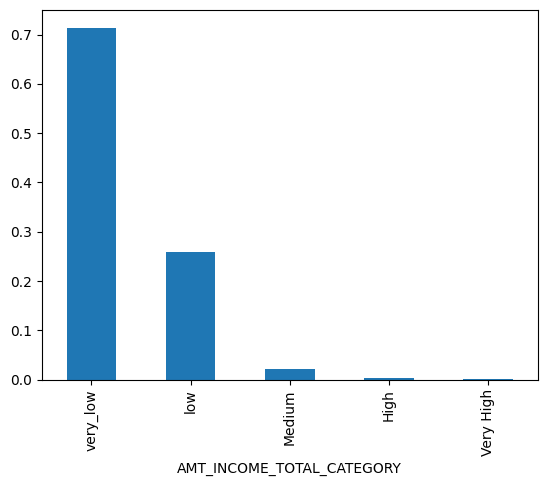

In [109]:
app_data["AMT_INCOME_TOTAL_CATEGORY"] = pd.cut(app_data.AMT_INCOME_TOTAL, [0, 200000,400000,600000,800000,10000000], labels= ["very_low", "low","Medium", "High", "Very High"], include_lowest=True)
app_data["AMT_INCOME_TOTAL_CATEGORY"].value_counts(normalize=True).plot.bar()

plt.show()

Conclusion: The credit amount for the loan are from low to very high

In [110]:
app_data["AGE_Category"] = pd.cut(app_data.YEARS_BIRTH, [0,25,45,65,85], labels=["Below 25", "25-45", "45-65", "65-85"] )

In [111]:
app_data.AGE_Category.value_counts(normalize=True)*100

AGE_Category
25-45       50.094143
45-65       41.772489
Below 25     4.426834
65-85        3.706534
Name: proportion, dtype: float64

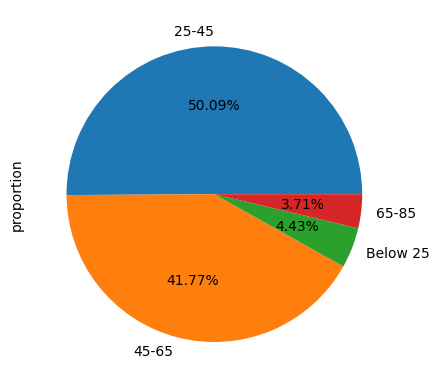

In [112]:
app_data.AGE_Category.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.show()

DIVIDING APPLICATION DATA WITH TARGET 0 AND 1 

In [113]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637            -3648.0   
1                    0.003541       16765           1188            -1186.0   
2                    0.010032       19046            225            -4260.0   
3                    0.008019       19005           3039            -9833.0   
4                    0.028663       19932           3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [114]:
tar_0 = app_data[app_data.CODE_GENDER == 'M']
tar_1 = app_data[app_data.CODE_GENDER == 'F']

In [115]:
app_data.CODE_GENDER.value_counts(normalize=True)

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64

Conclusion 2 out of 3 are female

Univariate Analysis

In [116]:
cat_cols = list(app_data.columns[app_data.dtypes == np.object_])
num_cols = list(app_data.columns[app_data.dtypes == np.int64]) + list(app_data.columns[app_data.dtypes == np.float64])

In [117]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [118]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


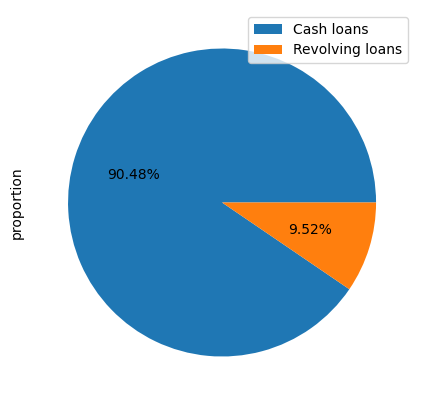

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


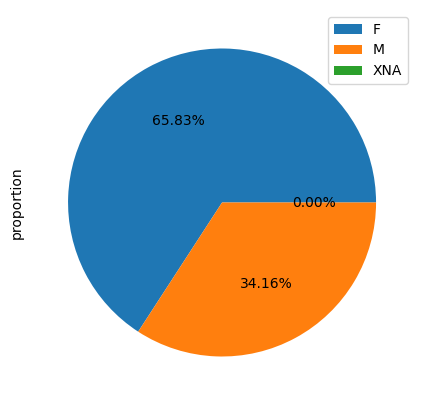

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


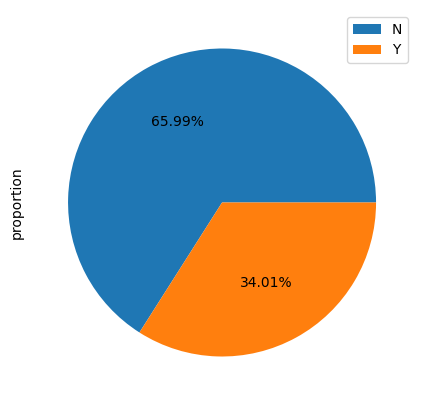

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


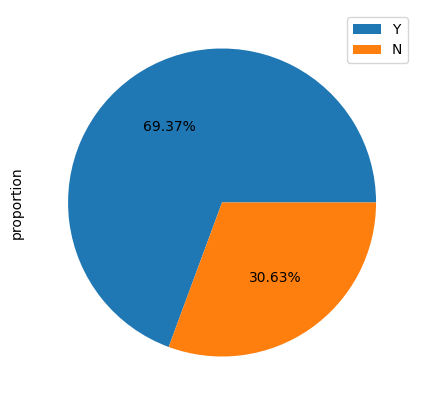

NAME_TYPE_SUITE
Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: proportion, dtype: float64


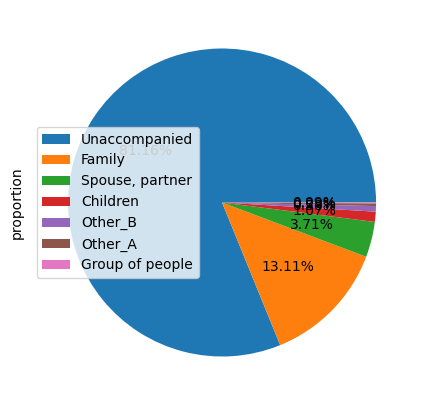

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


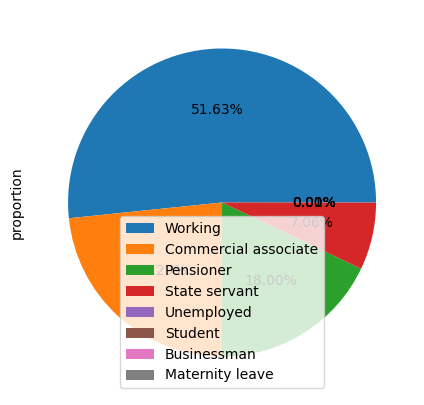

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


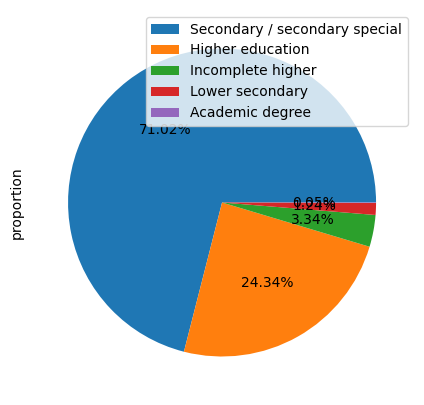

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


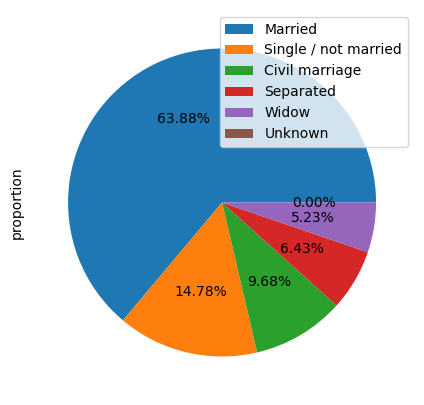

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


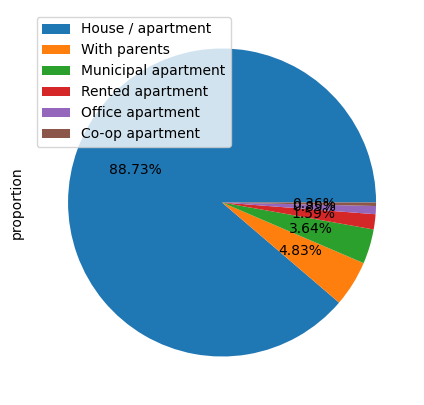

OCCUPATION_TYPE
Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


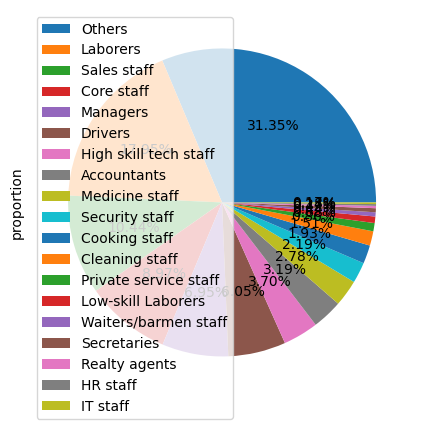

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


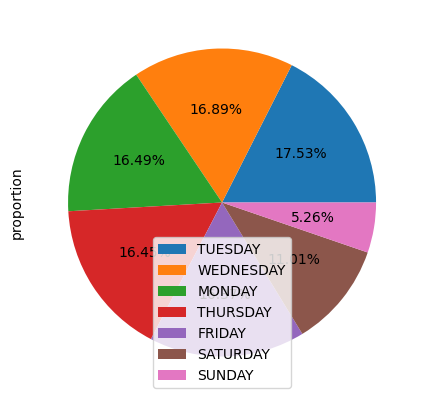

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

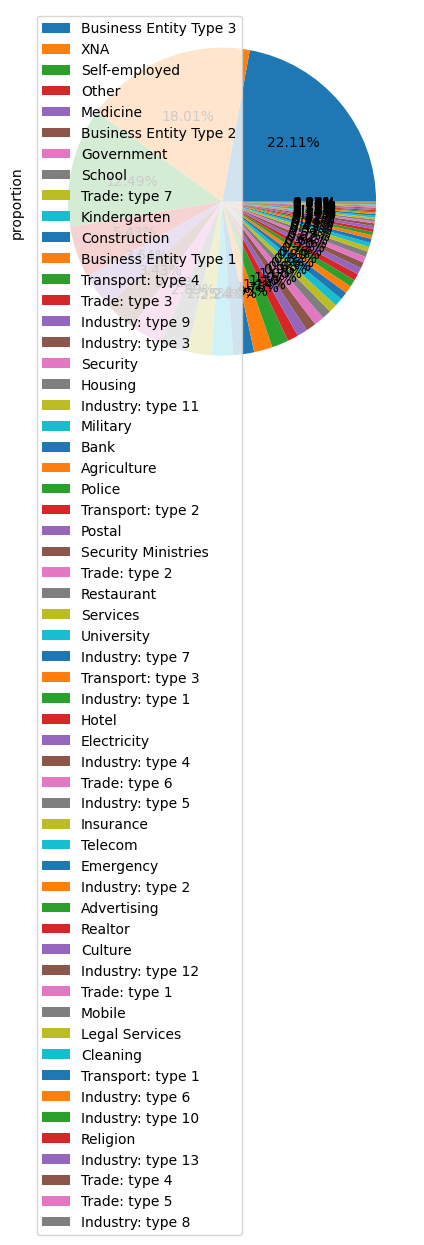

FONDKAPREMONT_MODE
reg oper account         0.759443
reg oper spec account    0.124259
not specified            0.058499
org spec account         0.057799
Name: proportion, dtype: float64


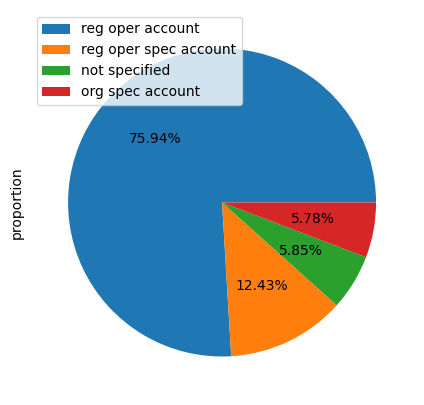

HOUSETYPE_MODE
block of flats      0.982306
specific housing    0.009784
terraced house      0.007911
Name: proportion, dtype: float64


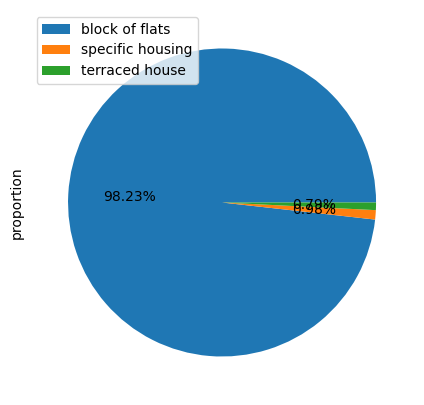

WALLSMATERIAL_MODE
Panel           0.436859
Stone, brick    0.428756
Block           0.061209
Wooden          0.035470
Mixed           0.015188
Monolithic      0.011768
Others          0.010749
Name: proportion, dtype: float64


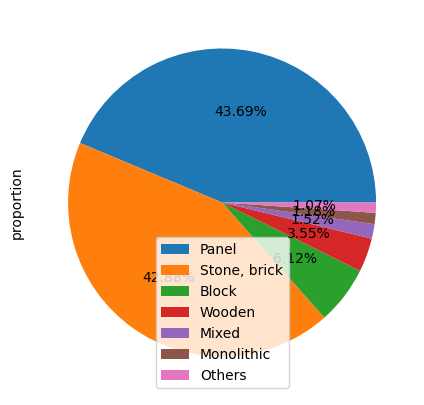

EMERGENCYSTATE_MODE
No     0.985608
Yes    0.014392
Name: proportion, dtype: float64


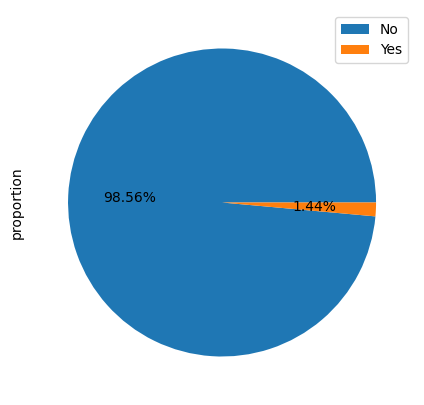

In [119]:
for col in cat_cols:
    print(app_data[col].value_counts(normalize = True))
    plt.figure(figsize=[5,5])     
    app_data[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct='%1.2f%%')
    plt.legend()
    plt.show() 

Conclusions to be given 

In [120]:
num_cols_withflag=[]
num_cols_withoutflag=[]
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)

In [121]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [122]:
num_cols_withoutflag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMM

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


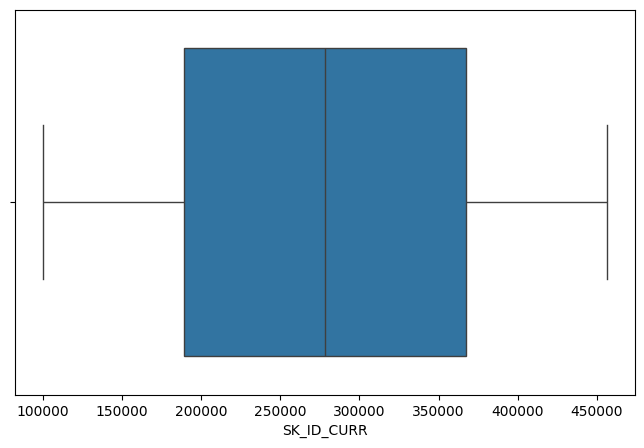

------------------------------------------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


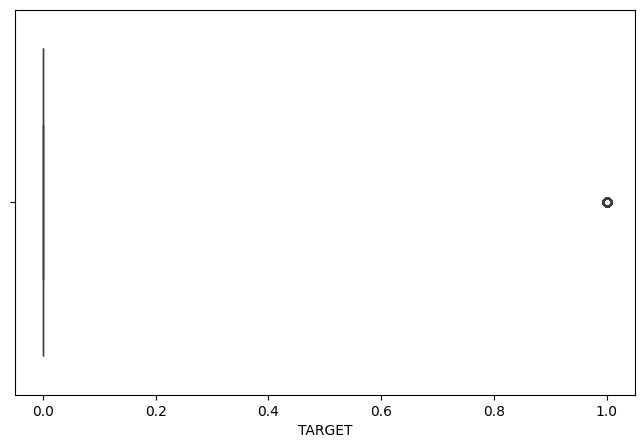

------------------------------------------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


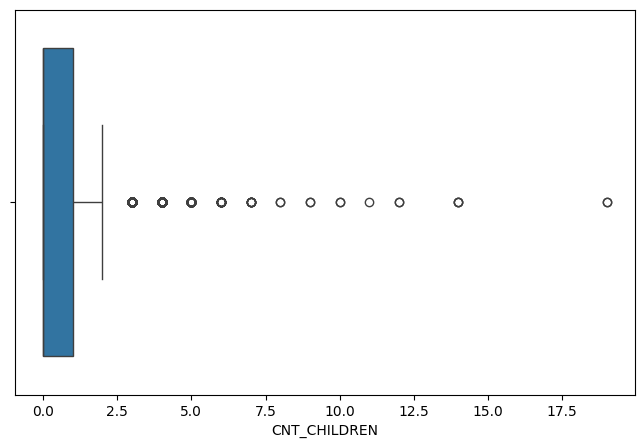

------------------------------------------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


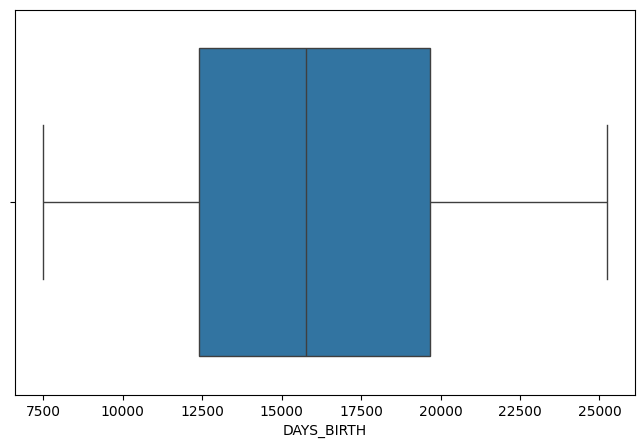

------------------------------------------------
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


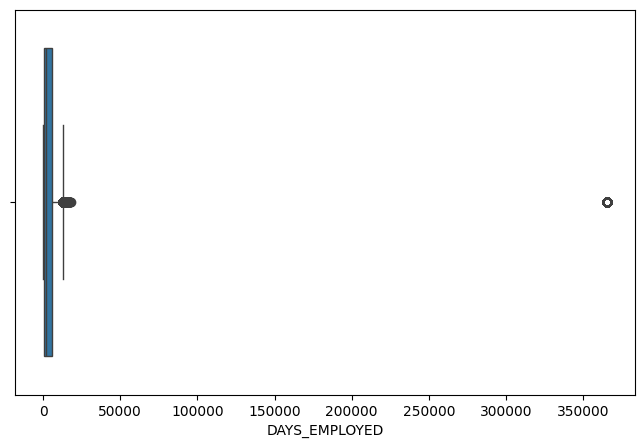

------------------------------------------------
count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


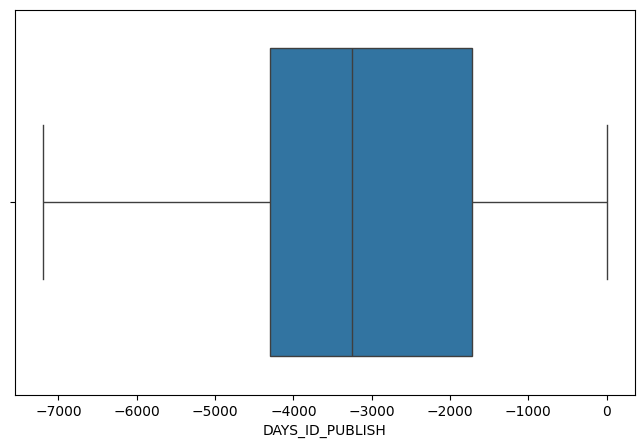

------------------------------------------------
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


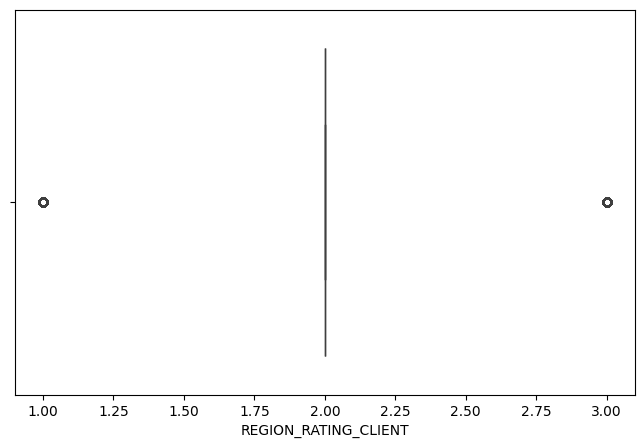

------------------------------------------------
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


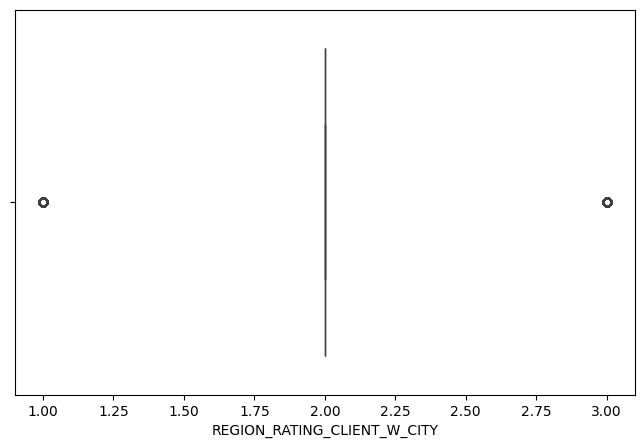

------------------------------------------------
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


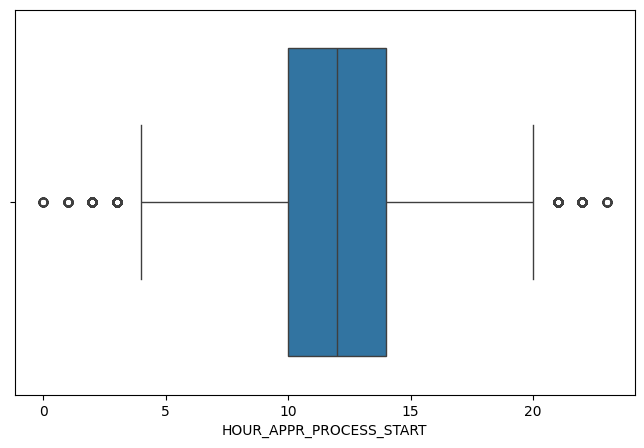

------------------------------------------------
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


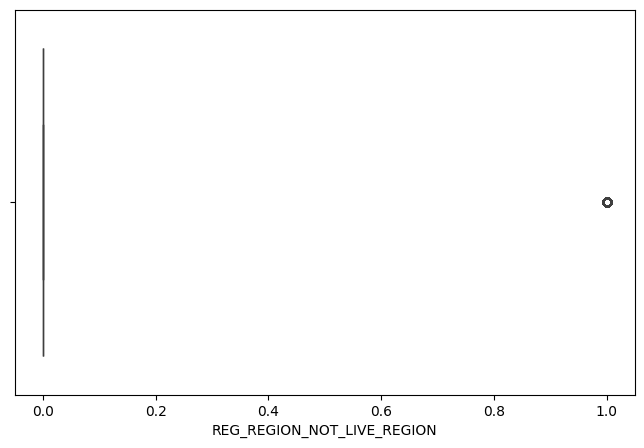

------------------------------------------------
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


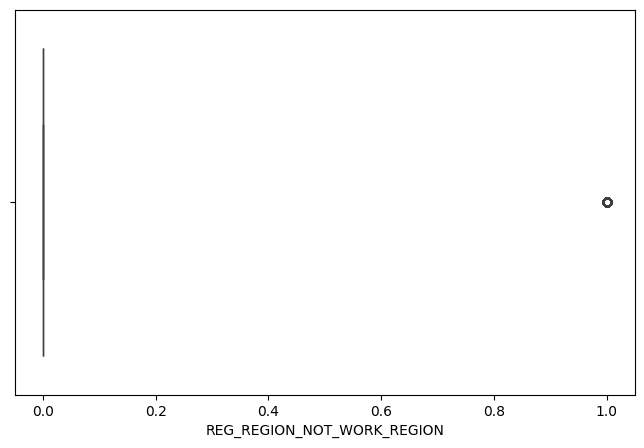

------------------------------------------------
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


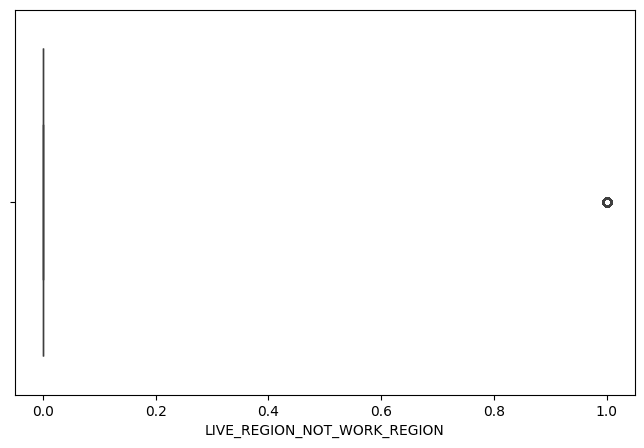

------------------------------------------------
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


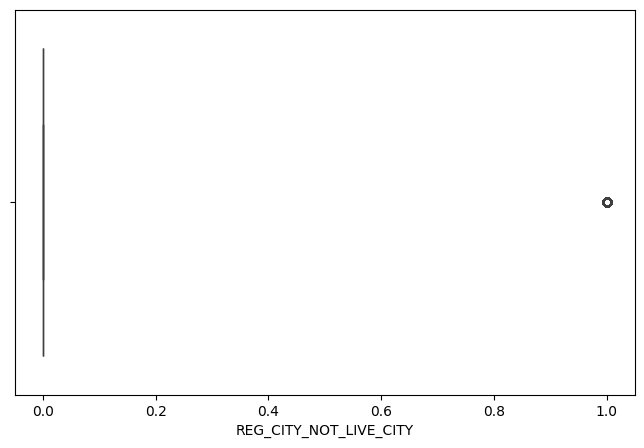

------------------------------------------------
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


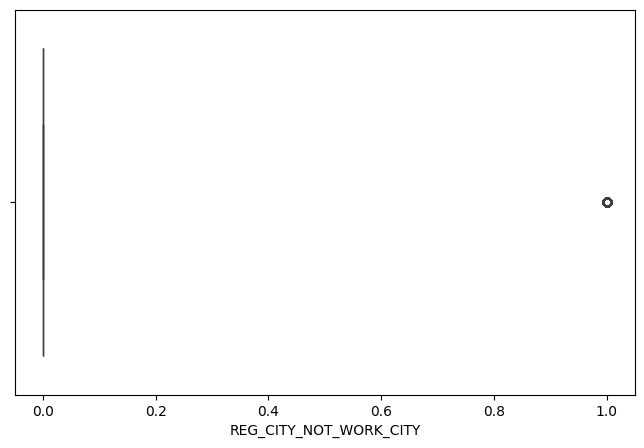

------------------------------------------------
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


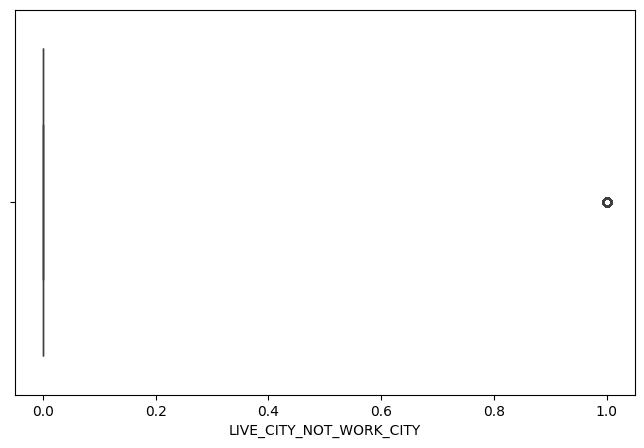

------------------------------------------------
count    307511.000000
mean         44.548992
std          12.263409
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: YEARS_BIRTH, dtype: float64


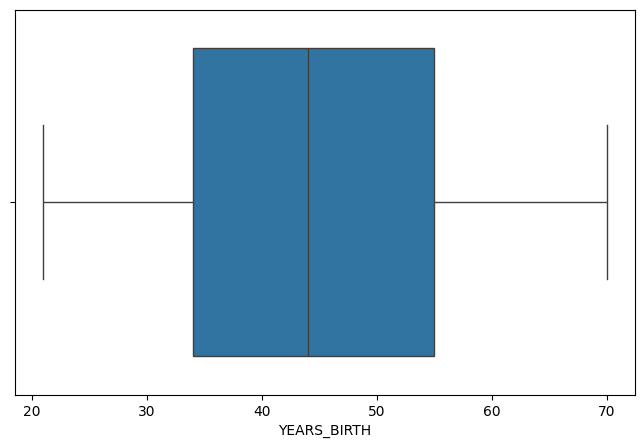

------------------------------------------------
count    307511.000000
mean        189.656025
std         391.517218
min           0.000000
25%           2.000000
50%           6.000000
75%          16.000000
max        1025.000000
Name: YEARS_EMPLOYED, dtype: float64


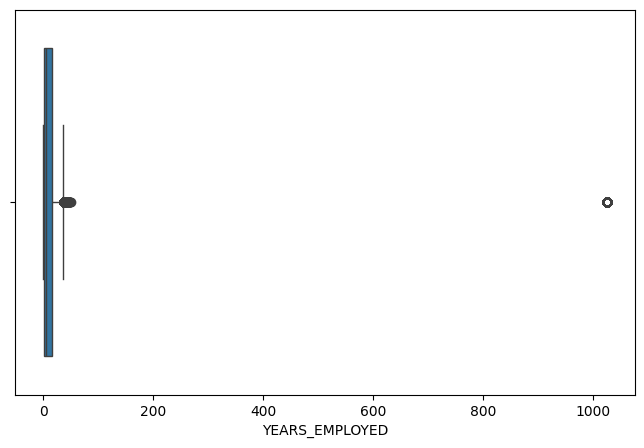

------------------------------------------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


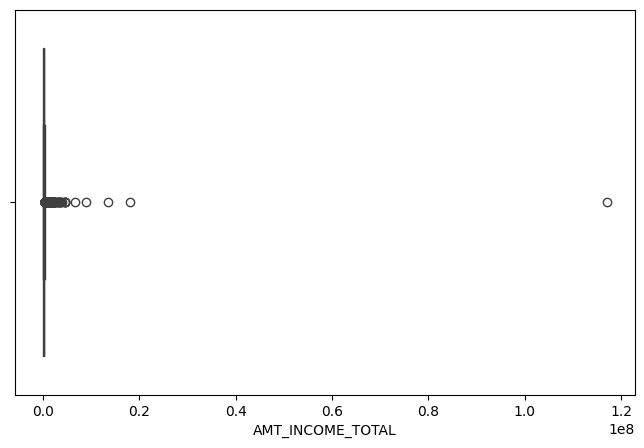

------------------------------------------------
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


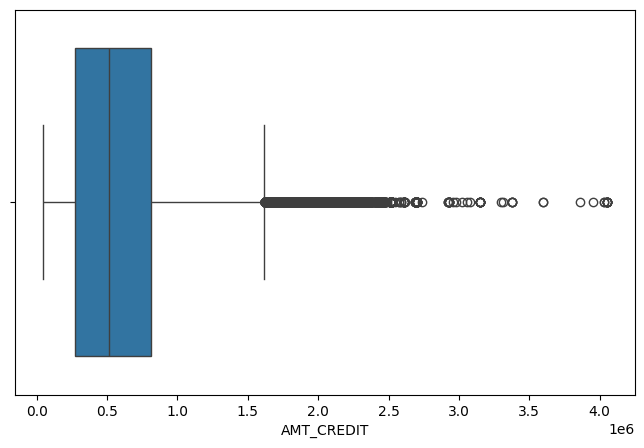

------------------------------------------------
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


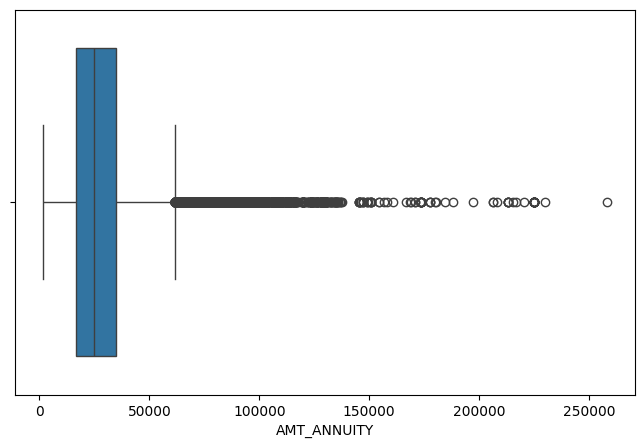

------------------------------------------------
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


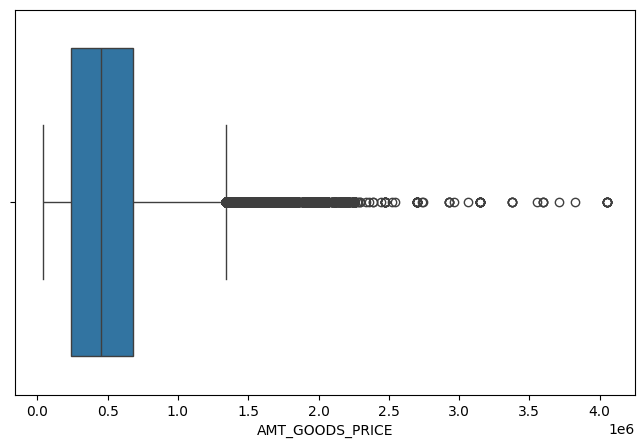

------------------------------------------------
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


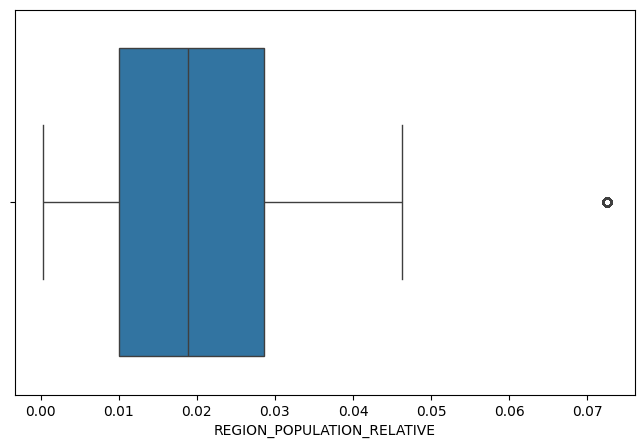

------------------------------------------------
count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


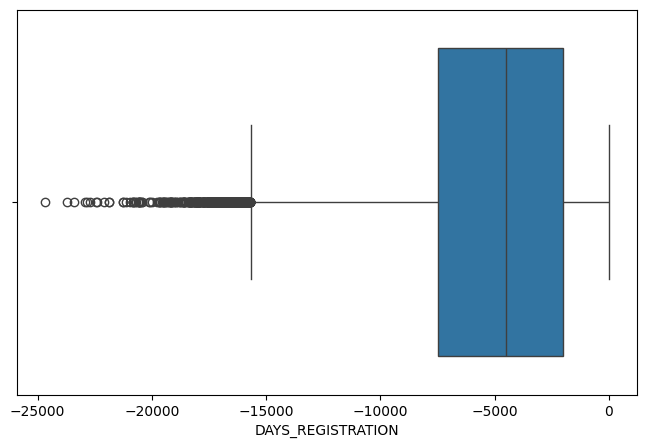

------------------------------------------------
count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64


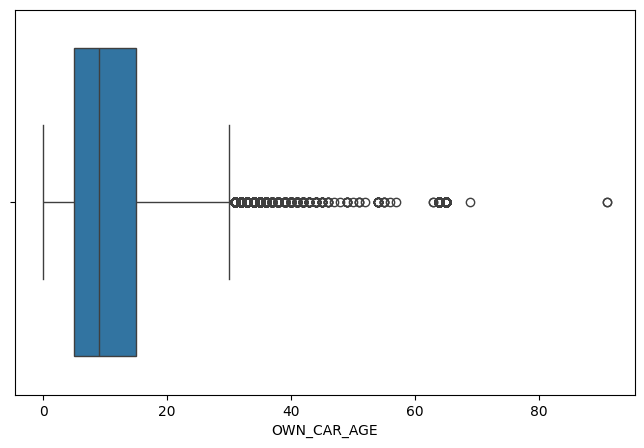

------------------------------------------------
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


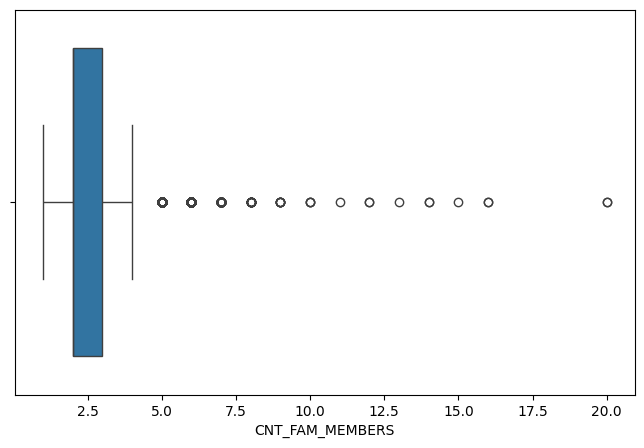

------------------------------------------------
count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64


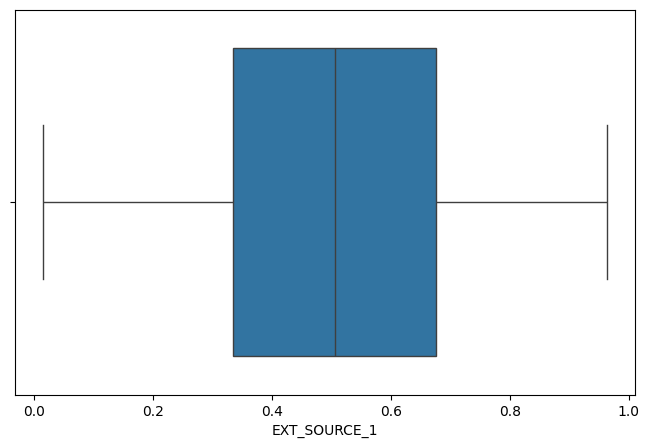

------------------------------------------------
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


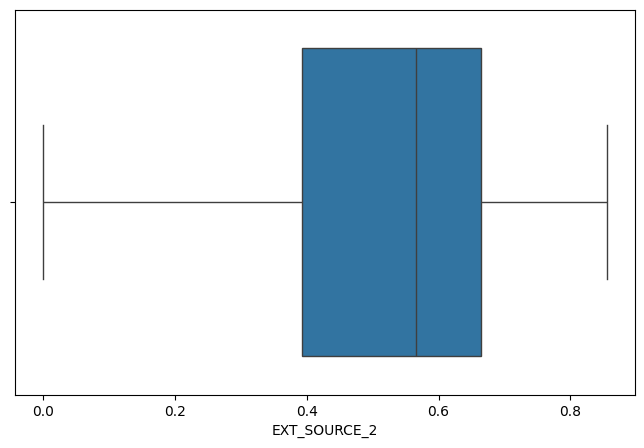

------------------------------------------------
count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


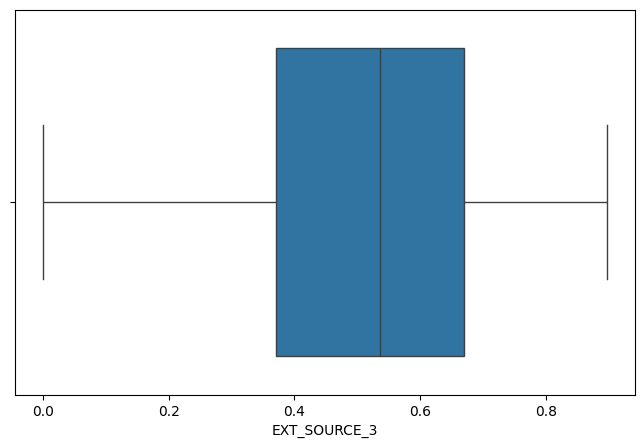

------------------------------------------------
count    151450.00000
mean          0.11744
std           0.10824
min           0.00000
25%           0.05770
50%           0.08760
75%           0.14850
max           1.00000
Name: APARTMENTS_AVG, dtype: float64


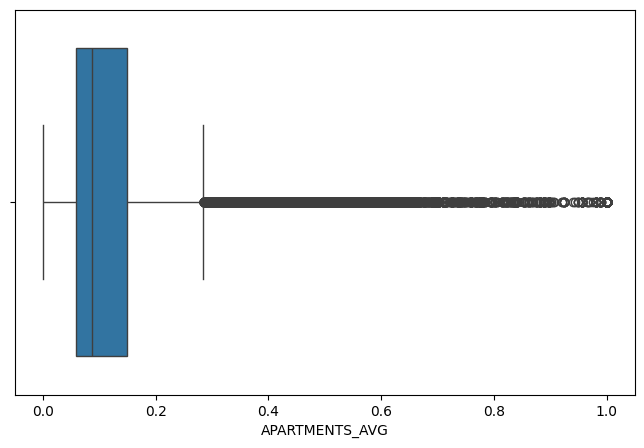

------------------------------------------------
count    127568.000000
mean          0.088442
std           0.082438
min           0.000000
25%           0.044200
50%           0.076300
75%           0.112200
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64


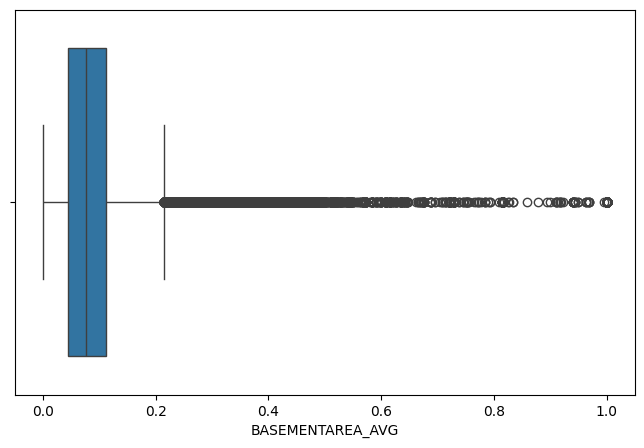

------------------------------------------------
count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64


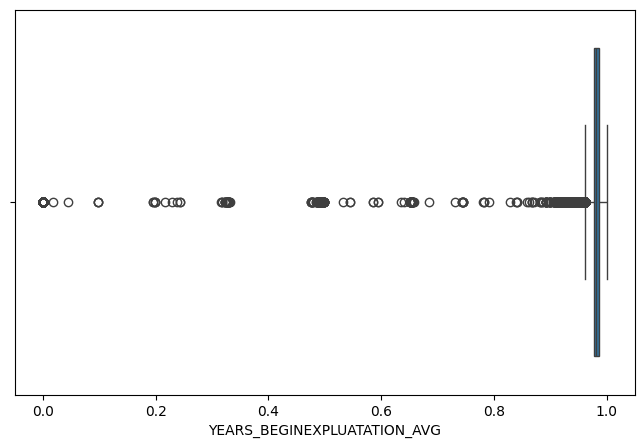

------------------------------------------------
count    103023.000000
mean          0.752471
std           0.113280
min           0.000000
25%           0.687200
50%           0.755200
75%           0.823200
max           1.000000
Name: YEARS_BUILD_AVG, dtype: float64


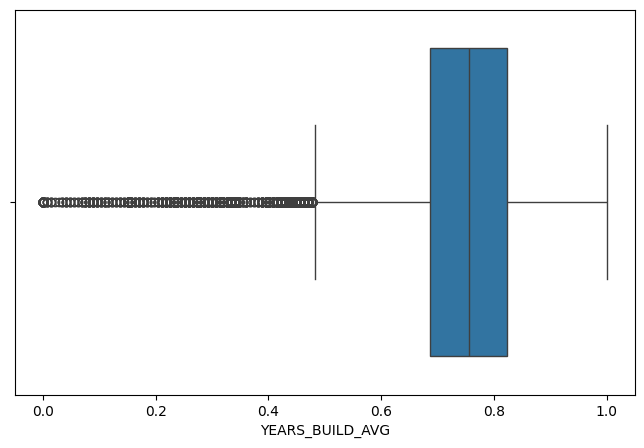

------------------------------------------------
count    92646.000000
mean         0.044621
std          0.076036
min          0.000000
25%          0.007800
50%          0.021100
75%          0.051500
max          1.000000
Name: COMMONAREA_AVG, dtype: float64


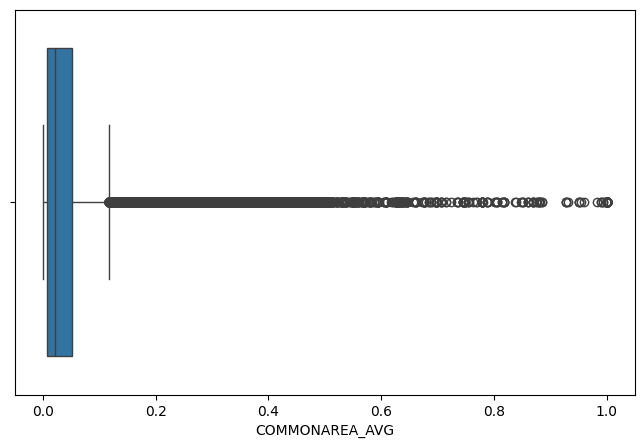

------------------------------------------------
count    143620.000000
mean          0.078942
std           0.134576
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_AVG, dtype: float64


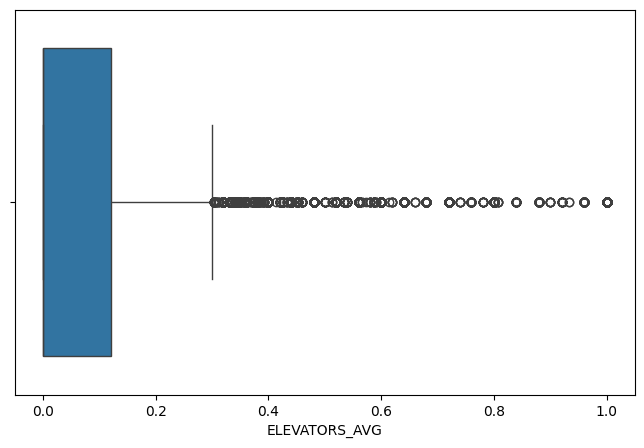

------------------------------------------------
count    152683.000000
mean          0.149725
std           0.100049
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_AVG, dtype: float64


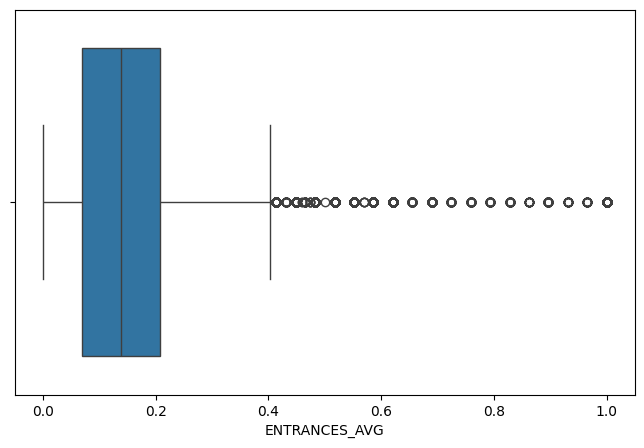

------------------------------------------------
count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64


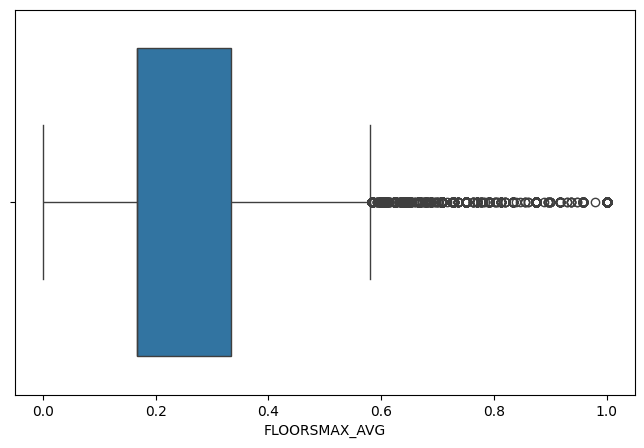

------------------------------------------------
count    98869.000000
mean         0.231894
std          0.161380
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_AVG, dtype: float64


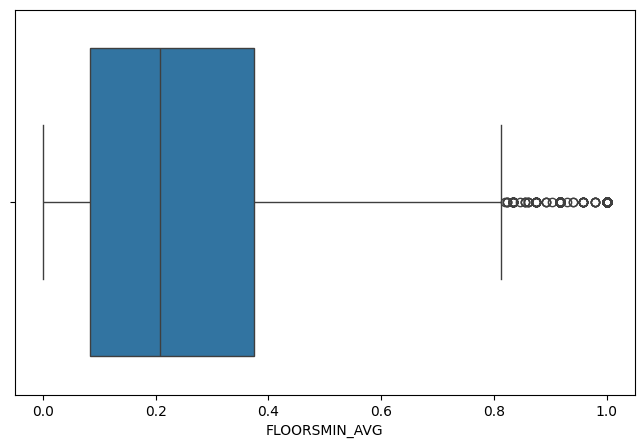

------------------------------------------------
count    124921.000000
mean          0.066333
std           0.081184
min           0.000000
25%           0.018700
50%           0.048100
75%           0.085600
max           1.000000
Name: LANDAREA_AVG, dtype: float64


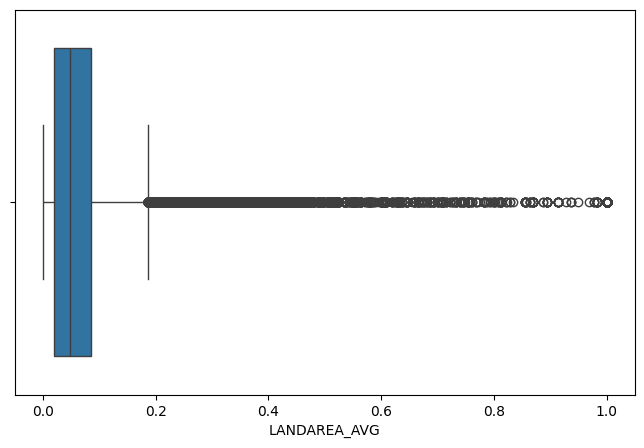

------------------------------------------------
count    97312.000000
mean         0.100775
std          0.092576
min          0.000000
25%          0.050400
50%          0.075600
75%          0.121000
max          1.000000
Name: LIVINGAPARTMENTS_AVG, dtype: float64


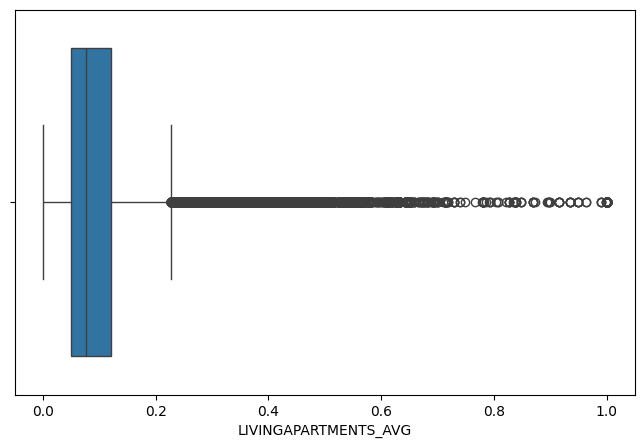

------------------------------------------------
count    153161.000000
mean          0.107399
std           0.110565
min           0.000000
25%           0.045300
50%           0.074500
75%           0.129900
max           1.000000
Name: LIVINGAREA_AVG, dtype: float64


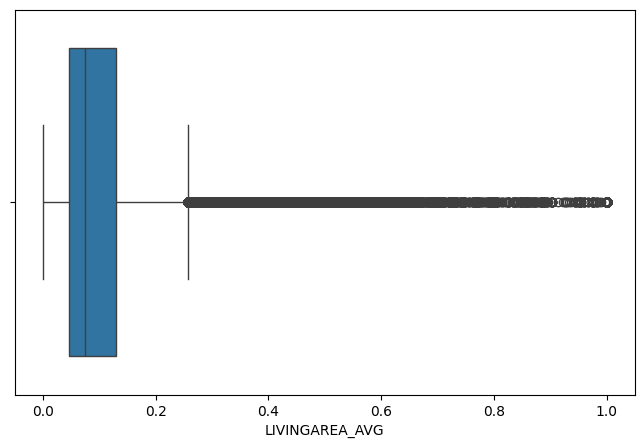

------------------------------------------------
count    93997.000000
mean         0.008809
std          0.047732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64


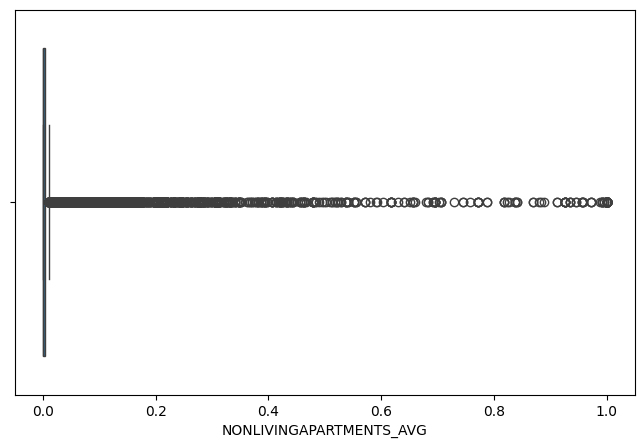

------------------------------------------------
count    137829.000000
mean          0.028358
std           0.069523
min           0.000000
25%           0.000000
50%           0.003600
75%           0.027700
max           1.000000
Name: NONLIVINGAREA_AVG, dtype: float64


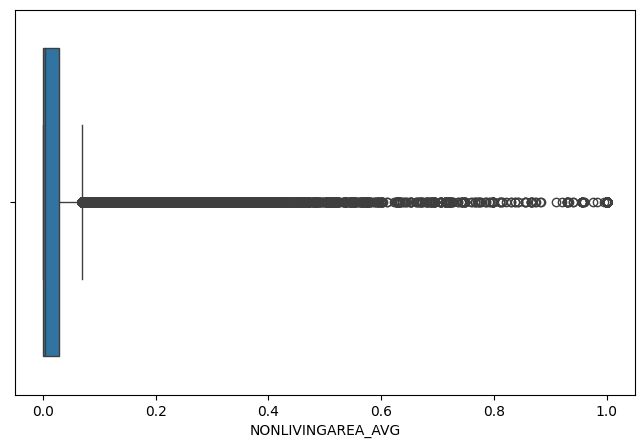

------------------------------------------------
count    151450.000000
mean          0.114231
std           0.107936
min           0.000000
25%           0.052500
50%           0.084000
75%           0.143900
max           1.000000
Name: APARTMENTS_MODE, dtype: float64


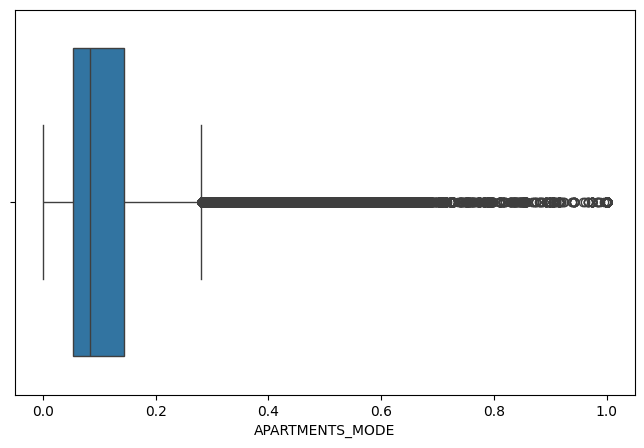

------------------------------------------------
count    127568.000000
mean          0.087543
std           0.084307
min           0.000000
25%           0.040700
50%           0.074600
75%           0.112400
max           1.000000
Name: BASEMENTAREA_MODE, dtype: float64


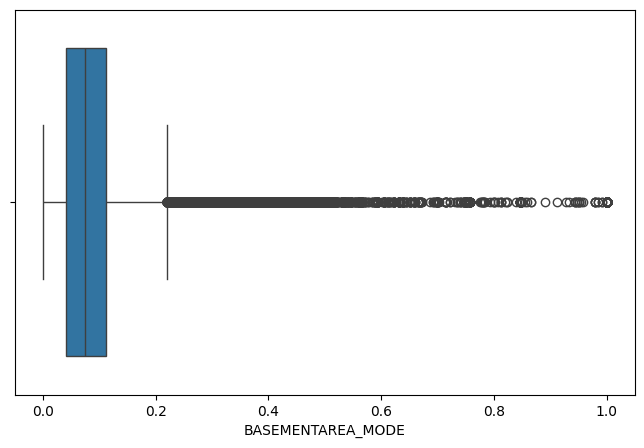

------------------------------------------------
count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64


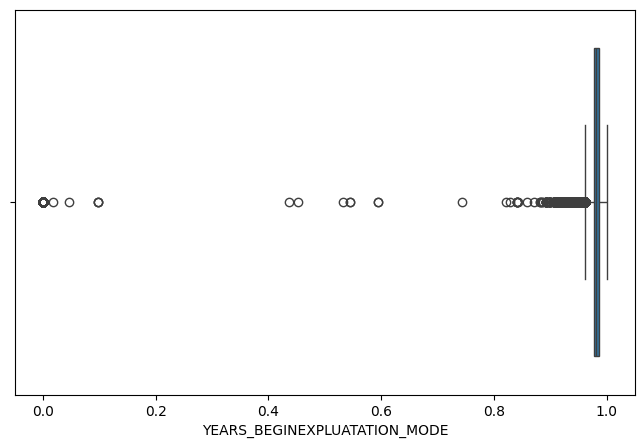

------------------------------------------------
count    103023.000000
mean          0.759637
std           0.110111
min           0.000000
25%           0.699400
50%           0.764800
75%           0.823600
max           1.000000
Name: YEARS_BUILD_MODE, dtype: float64


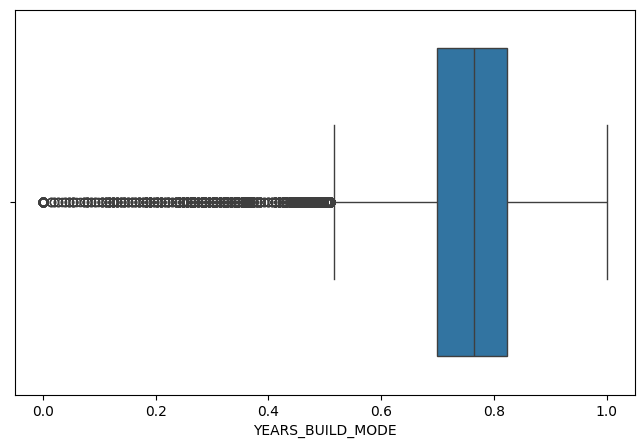

------------------------------------------------
count    92646.000000
mean         0.042553
std          0.074445
min          0.000000
25%          0.007200
50%          0.019000
75%          0.049000
max          1.000000
Name: COMMONAREA_MODE, dtype: float64


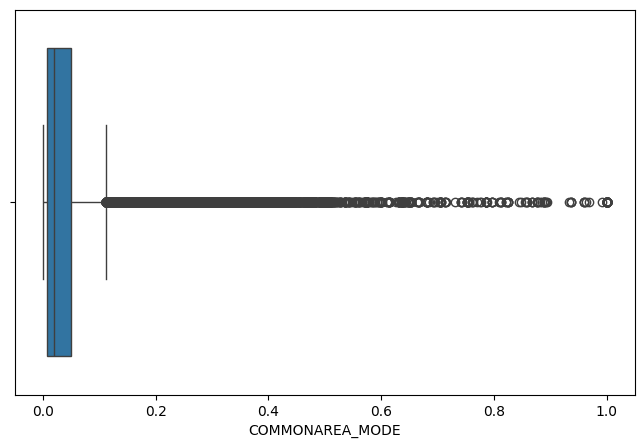

------------------------------------------------
count    143620.000000
mean          0.074490
std           0.132256
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120800
max           1.000000
Name: ELEVATORS_MODE, dtype: float64


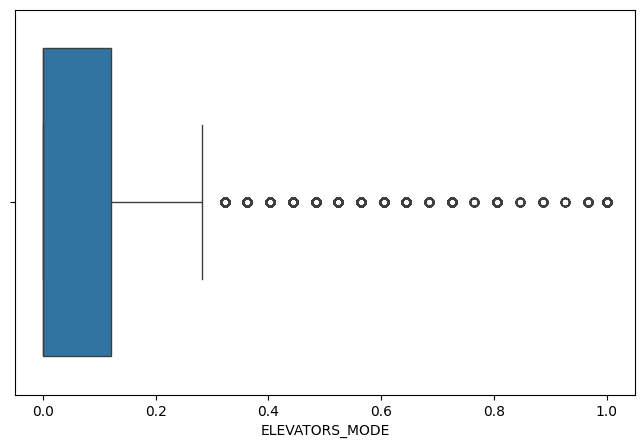

------------------------------------------------
count    152683.000000
mean          0.145193
std           0.100977
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MODE, dtype: float64


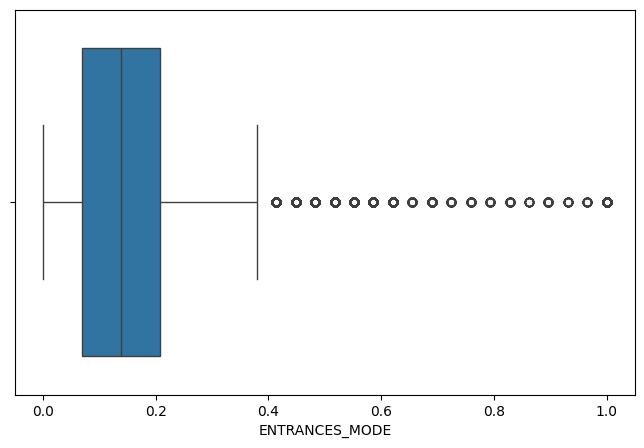

------------------------------------------------
count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64


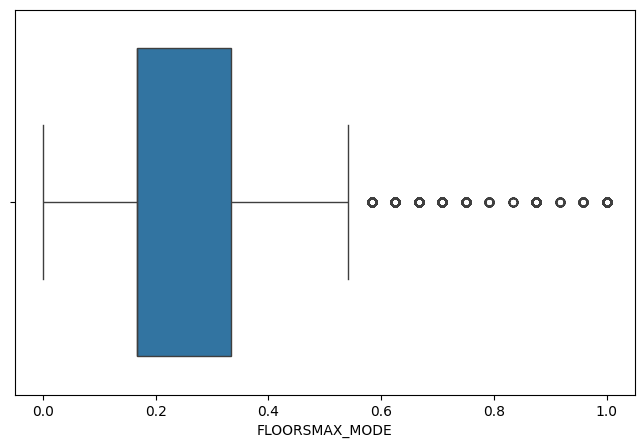

------------------------------------------------
count    98869.000000
mean         0.228058
std          0.161160
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MODE, dtype: float64


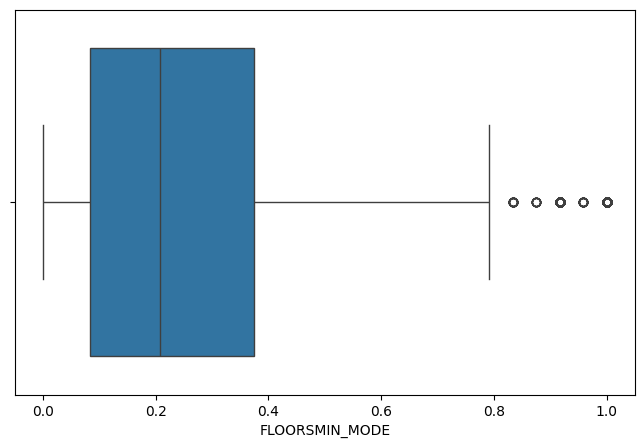

------------------------------------------------
count    124921.000000
mean          0.064958
std           0.081750
min           0.000000
25%           0.016600
50%           0.045800
75%           0.084100
max           1.000000
Name: LANDAREA_MODE, dtype: float64


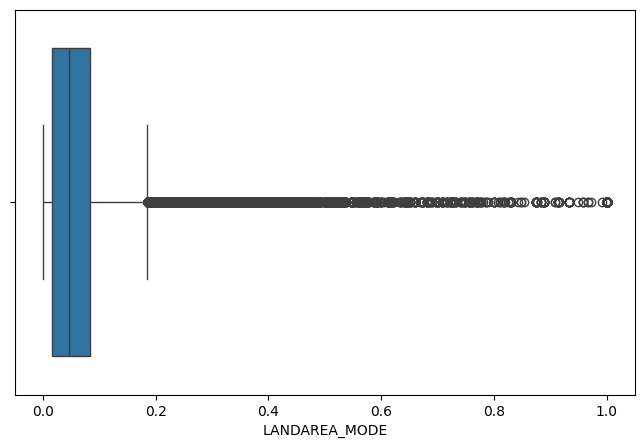

------------------------------------------------
count    97312.000000
mean         0.105645
std          0.097880
min          0.000000
25%          0.054200
50%          0.077100
75%          0.131300
max          1.000000
Name: LIVINGAPARTMENTS_MODE, dtype: float64


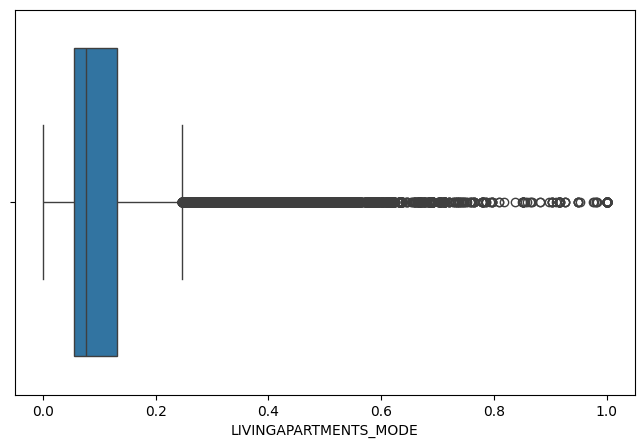

------------------------------------------------
count    153161.000000
mean          0.105975
std           0.111845
min           0.000000
25%           0.042700
50%           0.073100
75%           0.125200
max           1.000000
Name: LIVINGAREA_MODE, dtype: float64


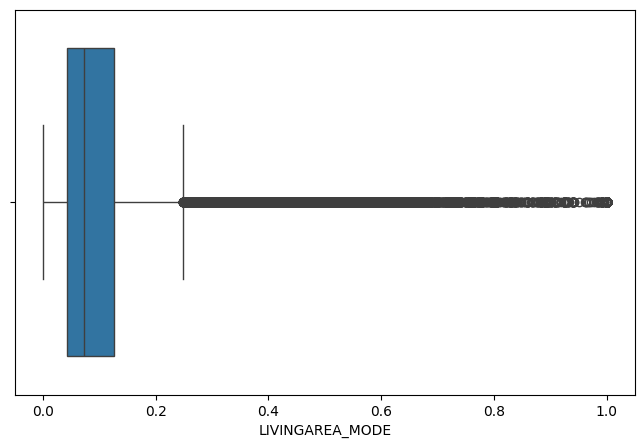

------------------------------------------------
count    93997.000000
mean         0.008076
std          0.046276
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MODE, dtype: float64


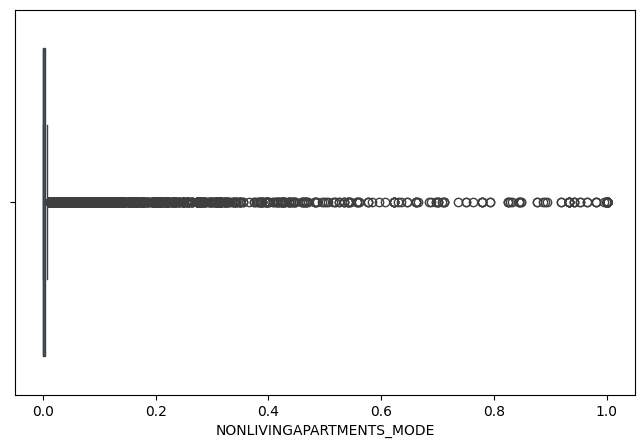

------------------------------------------------
count    137829.000000
mean          0.027022
std           0.070254
min           0.000000
25%           0.000000
50%           0.001100
75%           0.023100
max           1.000000
Name: NONLIVINGAREA_MODE, dtype: float64


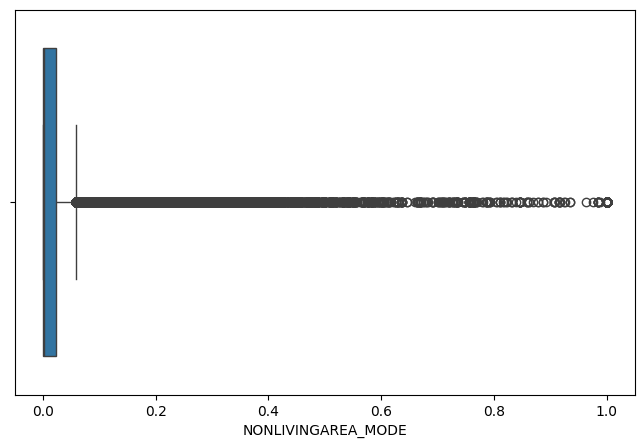

------------------------------------------------
count    151450.000000
mean          0.117850
std           0.109076
min           0.000000
25%           0.058300
50%           0.086400
75%           0.148900
max           1.000000
Name: APARTMENTS_MEDI, dtype: float64


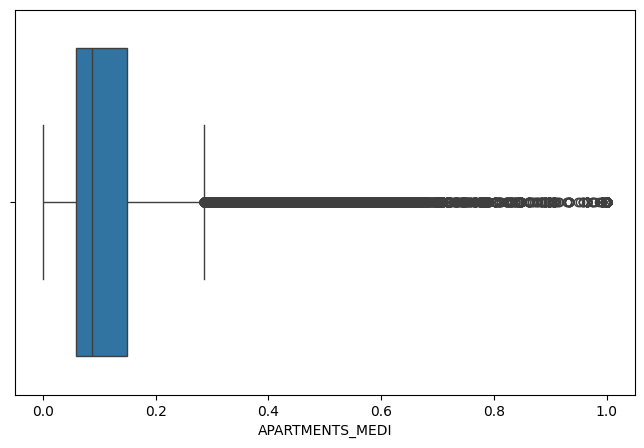

------------------------------------------------
count    127568.000000
mean          0.087955
std           0.082179
min           0.000000
25%           0.043700
50%           0.075800
75%           0.111600
max           1.000000
Name: BASEMENTAREA_MEDI, dtype: float64


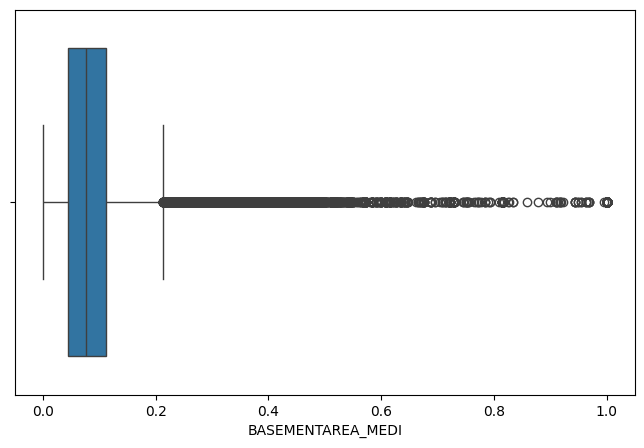

------------------------------------------------
count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64


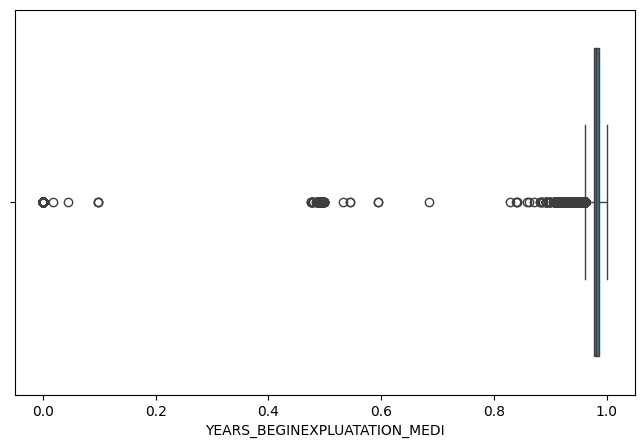

------------------------------------------------
count    103023.000000
mean          0.755746
std           0.112066
min           0.000000
25%           0.691400
50%           0.758500
75%           0.825600
max           1.000000
Name: YEARS_BUILD_MEDI, dtype: float64


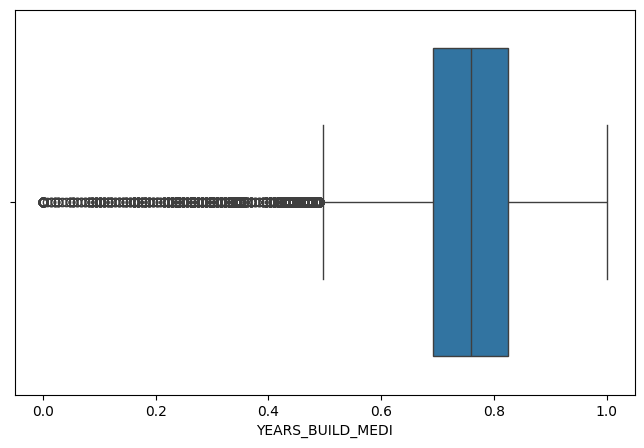

------------------------------------------------
count    92646.000000
mean         0.044595
std          0.076144
min          0.000000
25%          0.007900
50%          0.020800
75%          0.051300
max          1.000000
Name: COMMONAREA_MEDI, dtype: float64


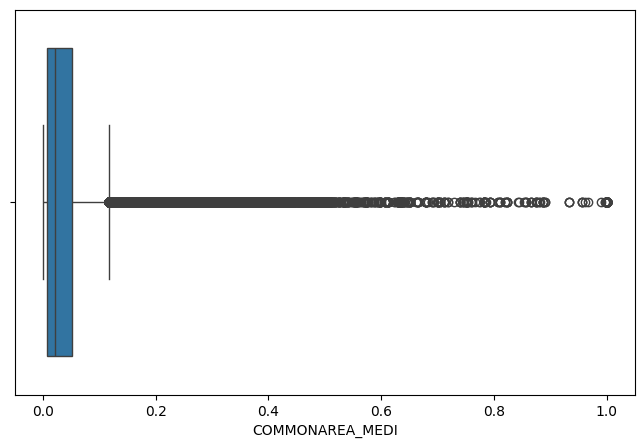

------------------------------------------------
count    143620.000000
mean          0.078078
std           0.134467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_MEDI, dtype: float64


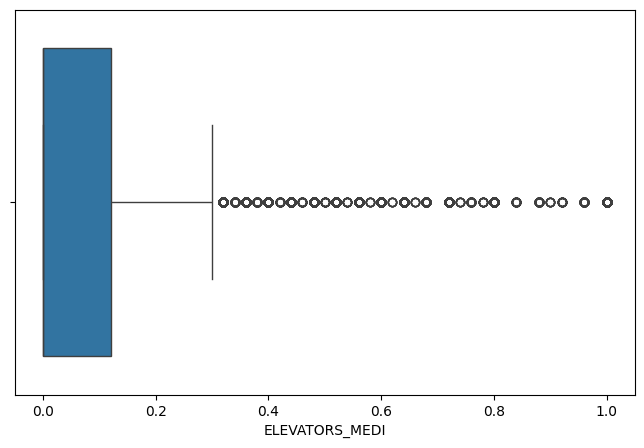

------------------------------------------------
count    152683.000000
mean          0.149213
std           0.100368
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MEDI, dtype: float64


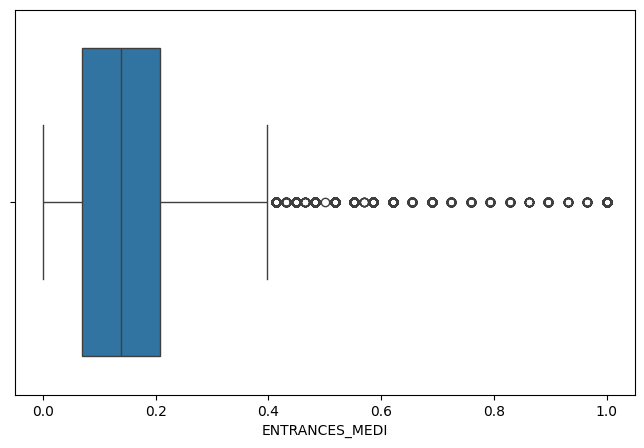

------------------------------------------------
count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64


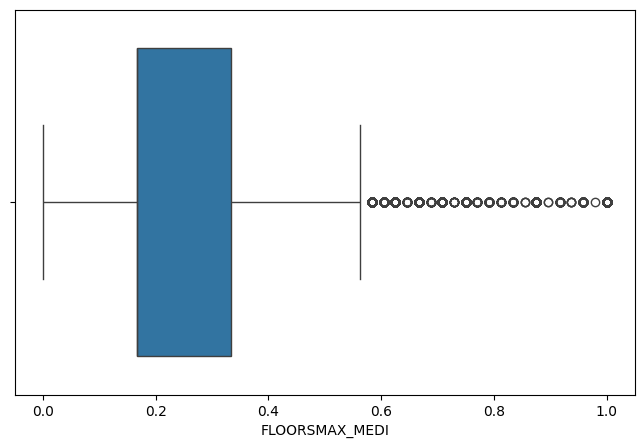

------------------------------------------------
count    98869.000000
mean         0.231625
std          0.161934
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MEDI, dtype: float64


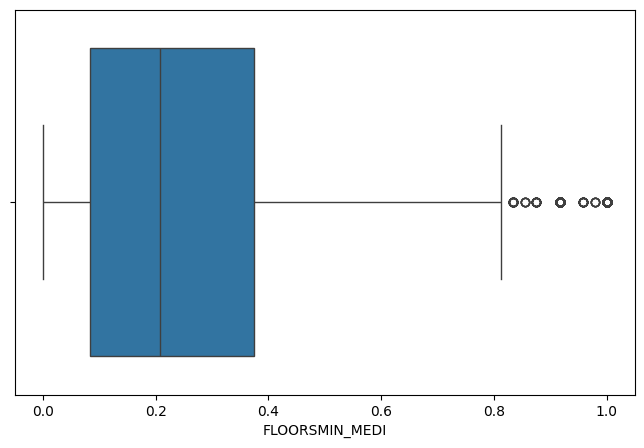

------------------------------------------------
count    124921.000000
mean          0.067169
std           0.082167
min           0.000000
25%           0.018700
50%           0.048700
75%           0.086800
max           1.000000
Name: LANDAREA_MEDI, dtype: float64


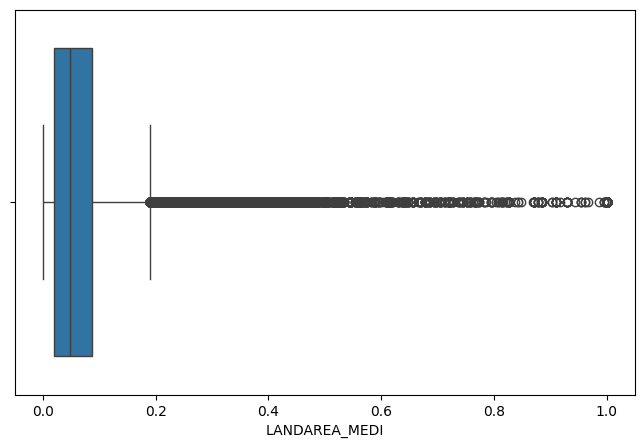

------------------------------------------------
count    97312.000000
mean         0.101954
std          0.093642
min          0.000000
25%          0.051300
50%          0.076100
75%          0.123100
max          1.000000
Name: LIVINGAPARTMENTS_MEDI, dtype: float64


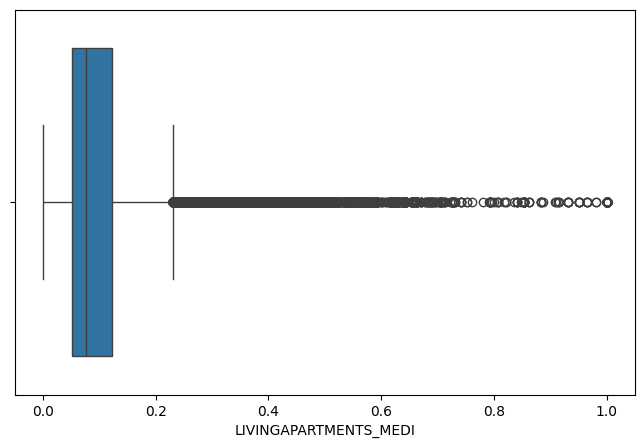

------------------------------------------------
count    153161.000000
mean          0.108607
std           0.112260
min           0.000000
25%           0.045700
50%           0.074900
75%           0.130300
max           1.000000
Name: LIVINGAREA_MEDI, dtype: float64


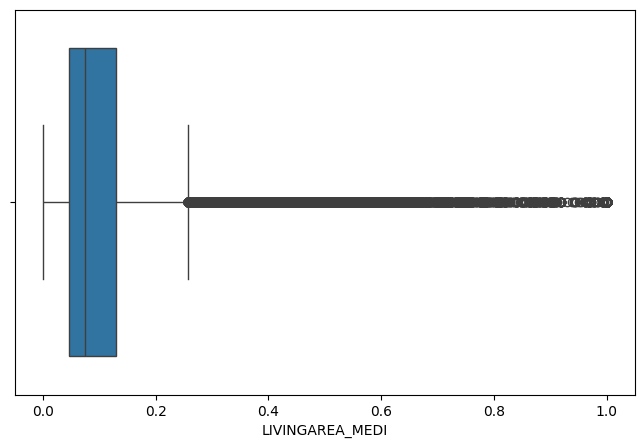

------------------------------------------------
count    93997.000000
mean         0.008651
std          0.047415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MEDI, dtype: float64


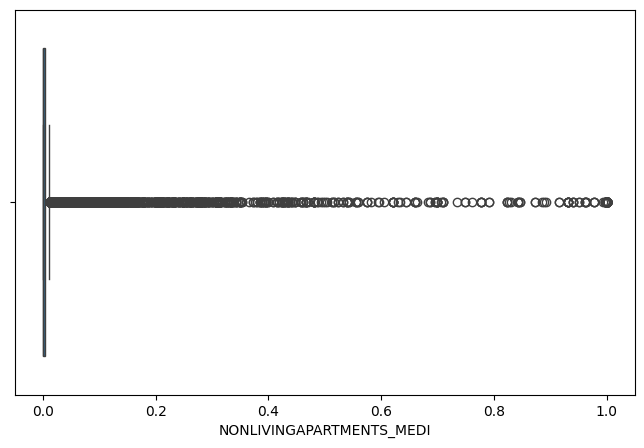

------------------------------------------------
count    137829.000000
mean          0.028236
std           0.070166
min           0.000000
25%           0.000000
50%           0.003100
75%           0.026600
max           1.000000
Name: NONLIVINGAREA_MEDI, dtype: float64


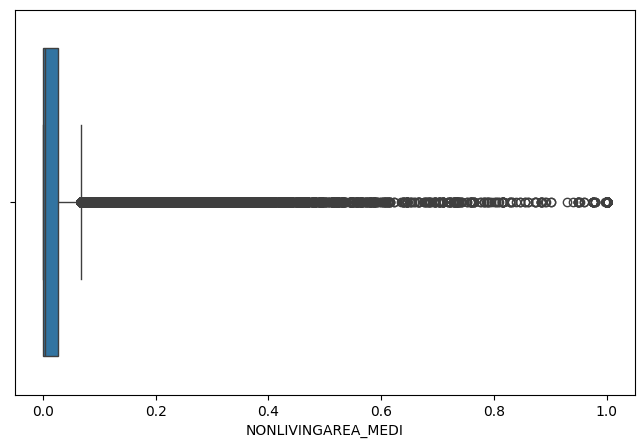

------------------------------------------------
count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64


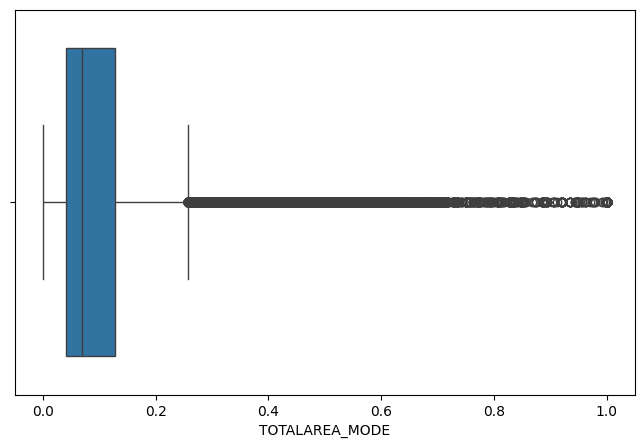

------------------------------------------------
count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


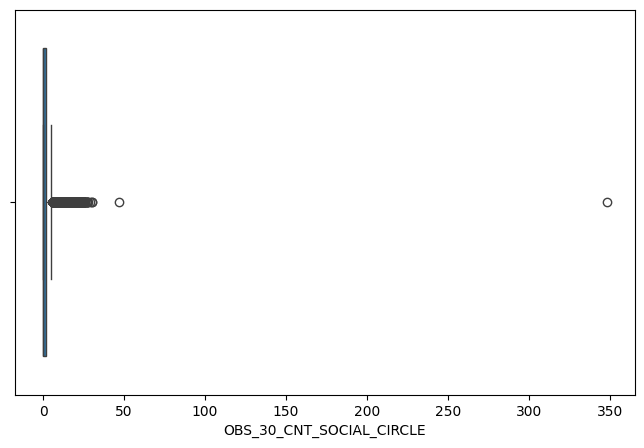

------------------------------------------------
count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


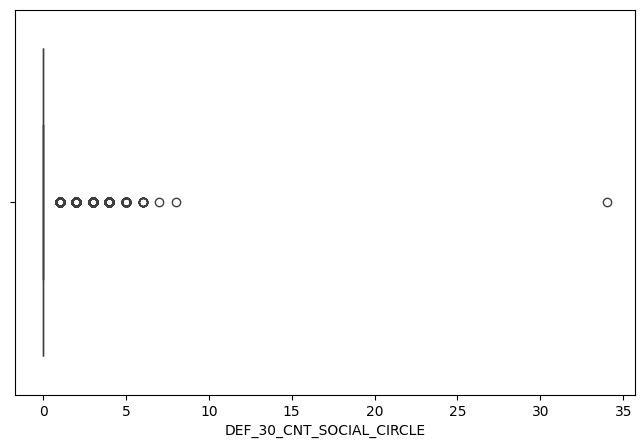

------------------------------------------------
count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


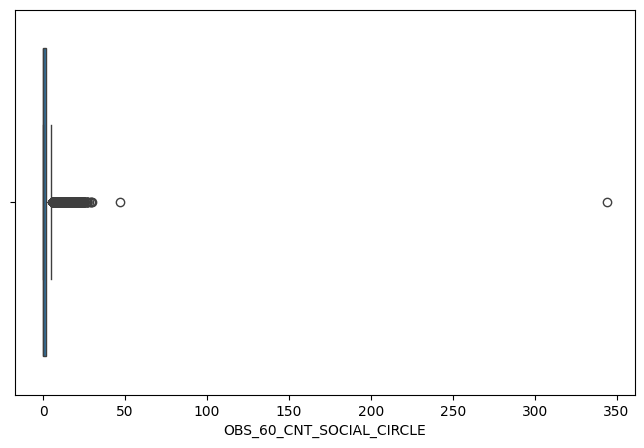

------------------------------------------------
count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


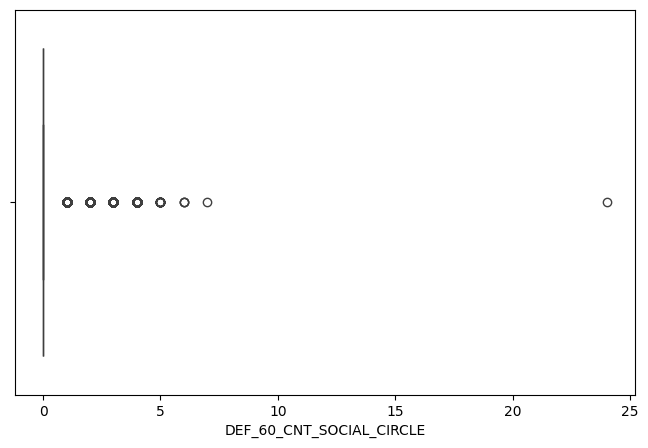

------------------------------------------------
count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


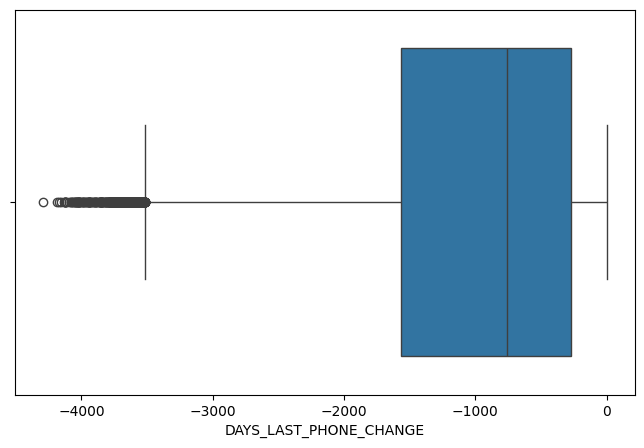

------------------------------------------------
count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


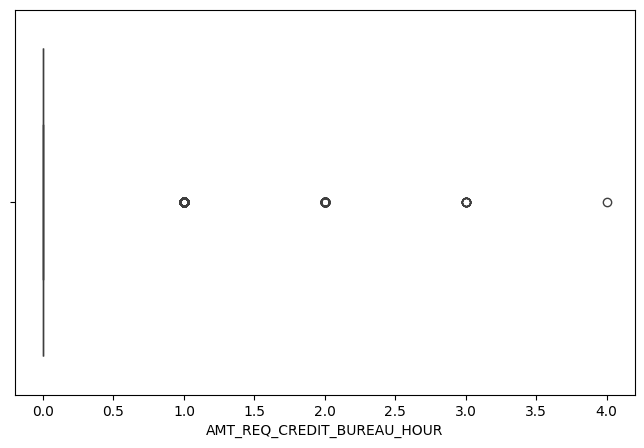

------------------------------------------------
count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


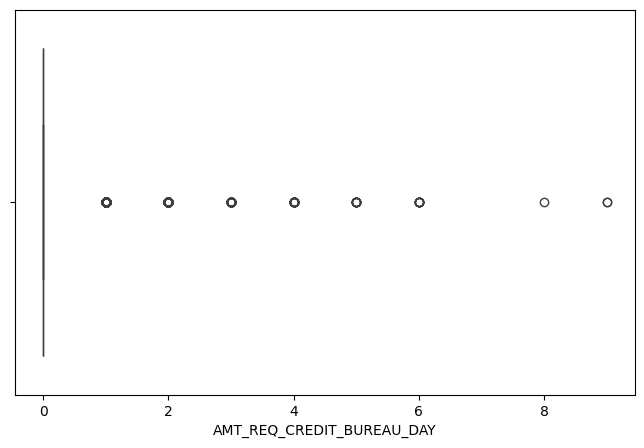

------------------------------------------------
count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


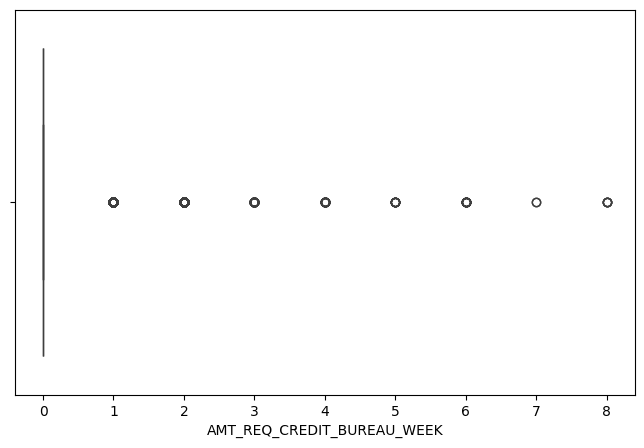

------------------------------------------------
count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


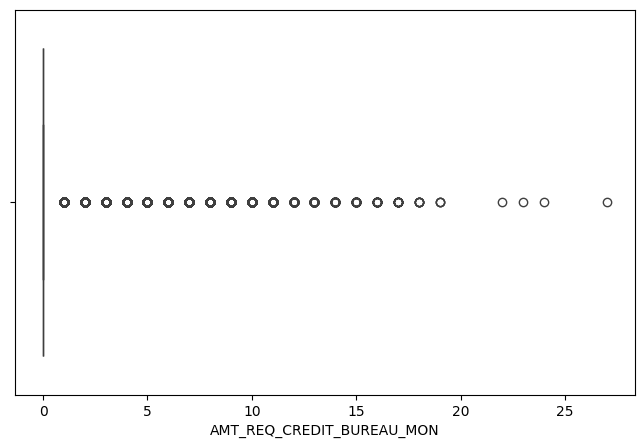

------------------------------------------------
count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


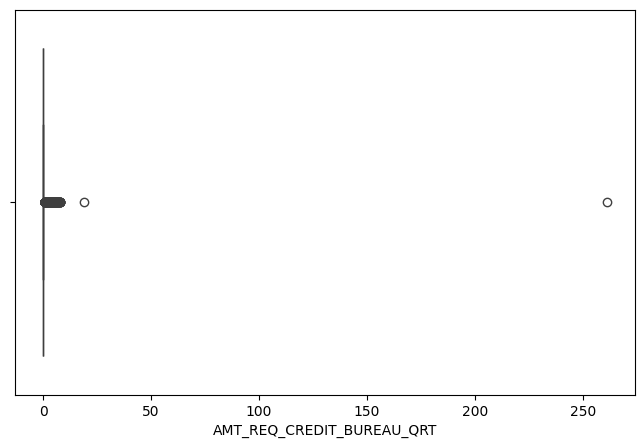

------------------------------------------------
count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


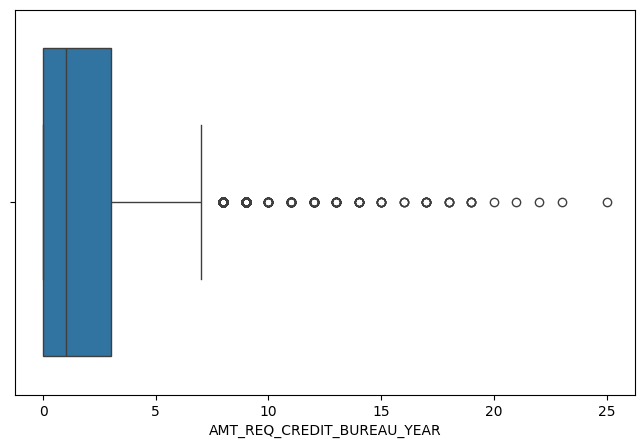

------------------------------------------------


In [123]:
for col in num_cols_withoutflag:
    print(app_data[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data=app_data,x=col)
    plt.show()
    print("------------------------------------------------")

Plot on NAME_CONTRACT_TYPE for Target 0 and 1


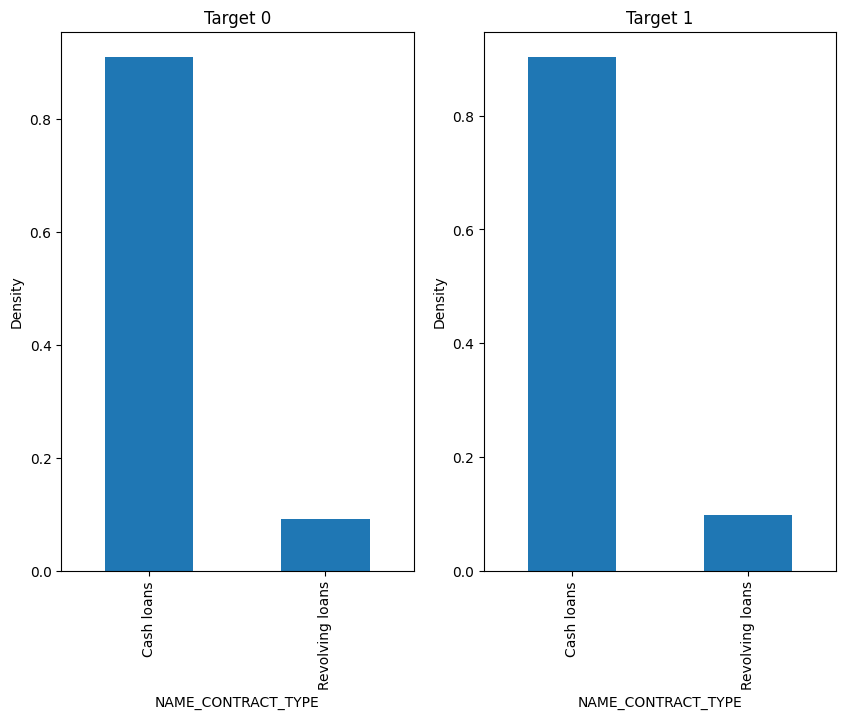

----------------------------------------------------------------
Plot on CODE_GENDER for Target 0 and 1


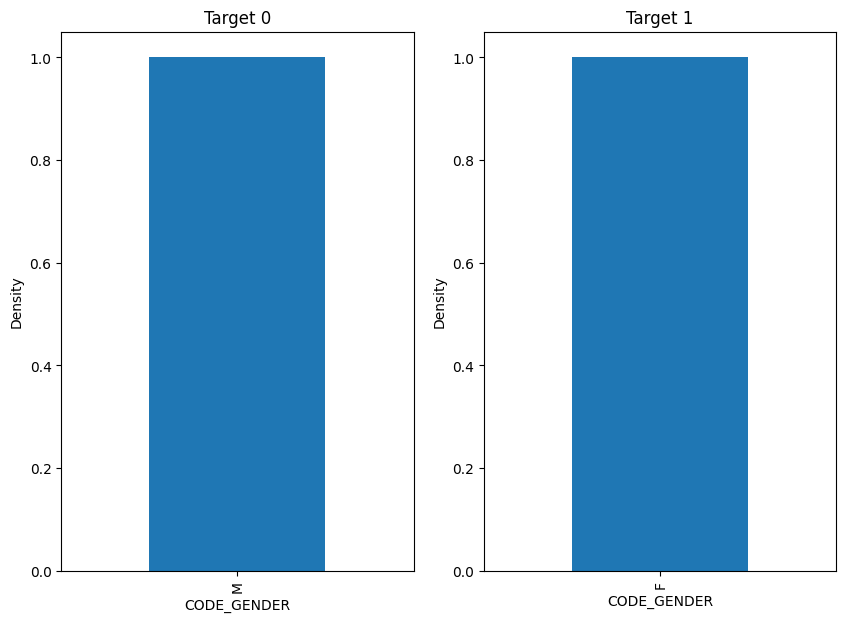

----------------------------------------------------------------
Plot on FLAG_OWN_CAR for Target 0 and 1


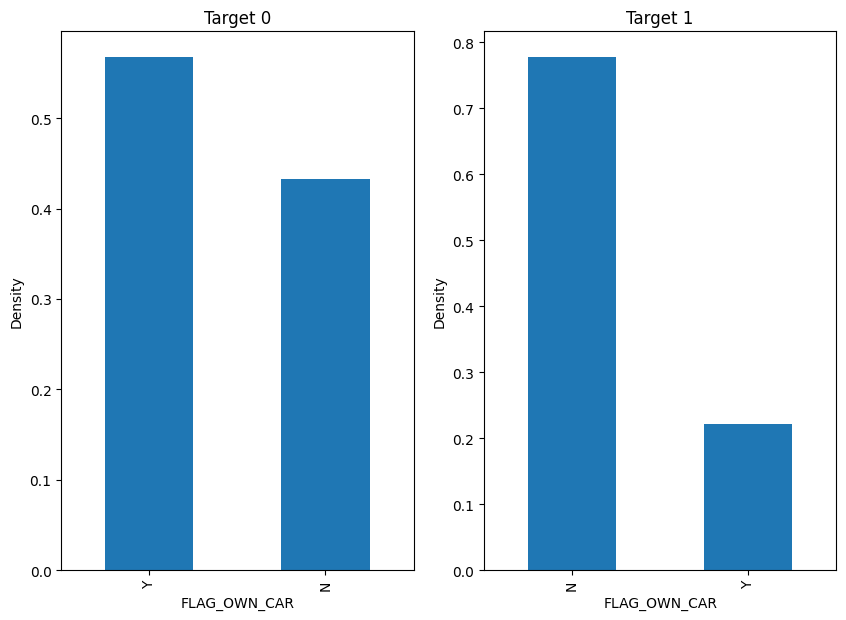

----------------------------------------------------------------
Plot on FLAG_OWN_REALTY for Target 0 and 1


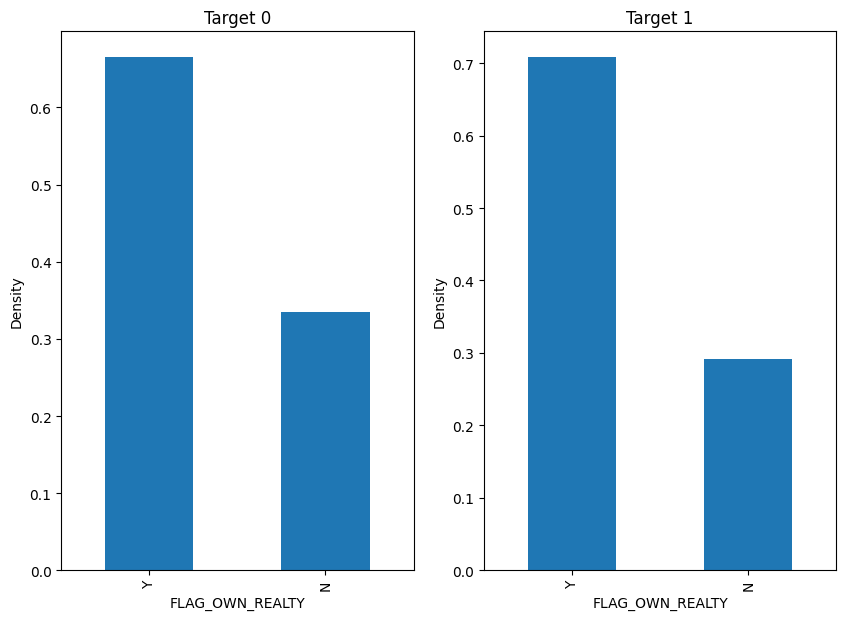

----------------------------------------------------------------
Plot on NAME_TYPE_SUITE for Target 0 and 1


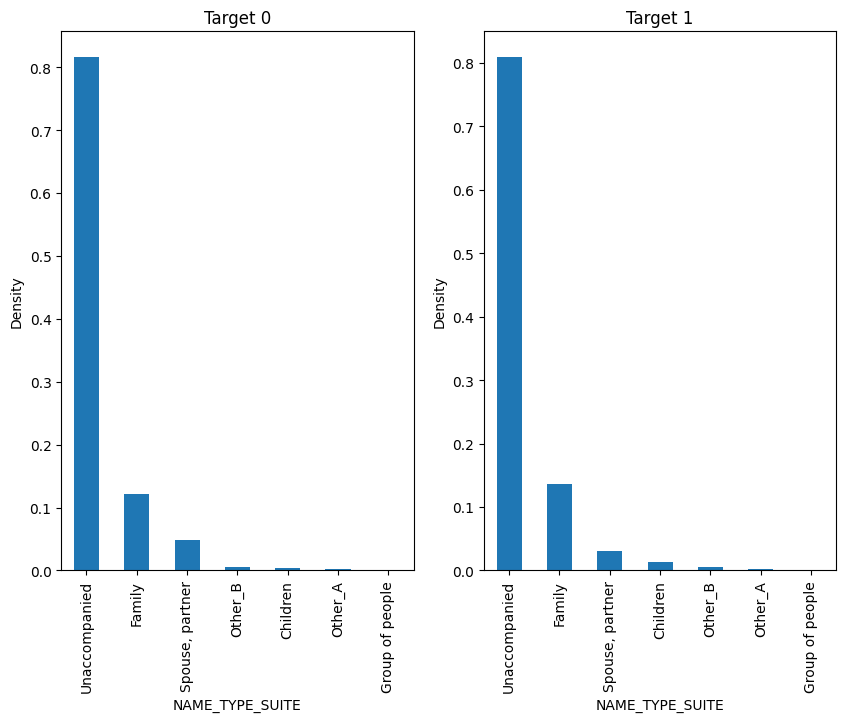

----------------------------------------------------------------
Plot on NAME_INCOME_TYPE for Target 0 and 1


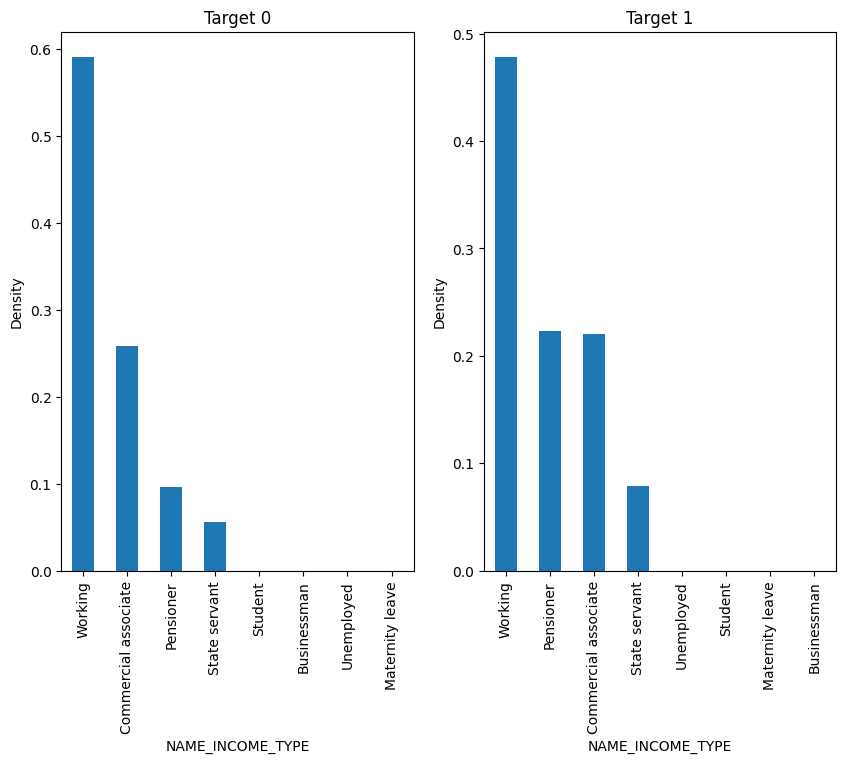

----------------------------------------------------------------
Plot on NAME_EDUCATION_TYPE for Target 0 and 1


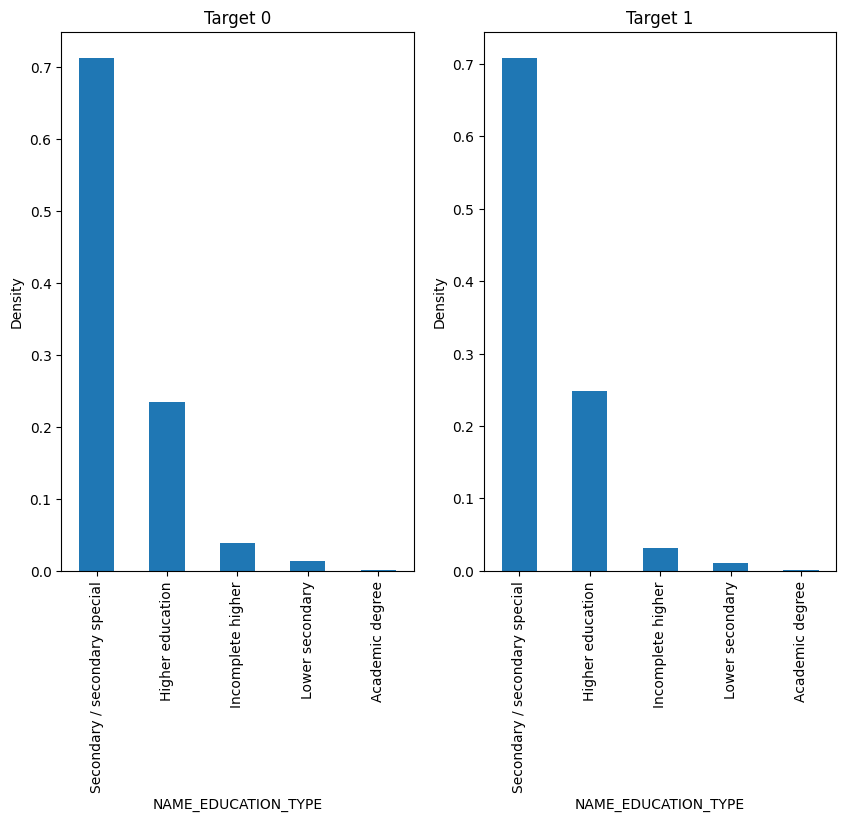

----------------------------------------------------------------
Plot on NAME_FAMILY_STATUS for Target 0 and 1


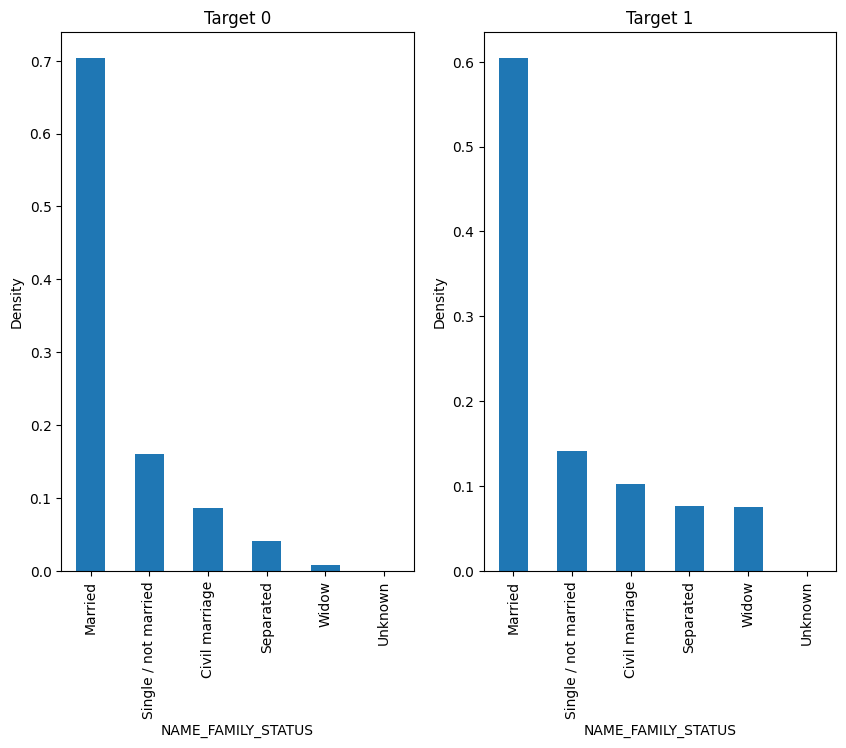

----------------------------------------------------------------
Plot on NAME_HOUSING_TYPE for Target 0 and 1


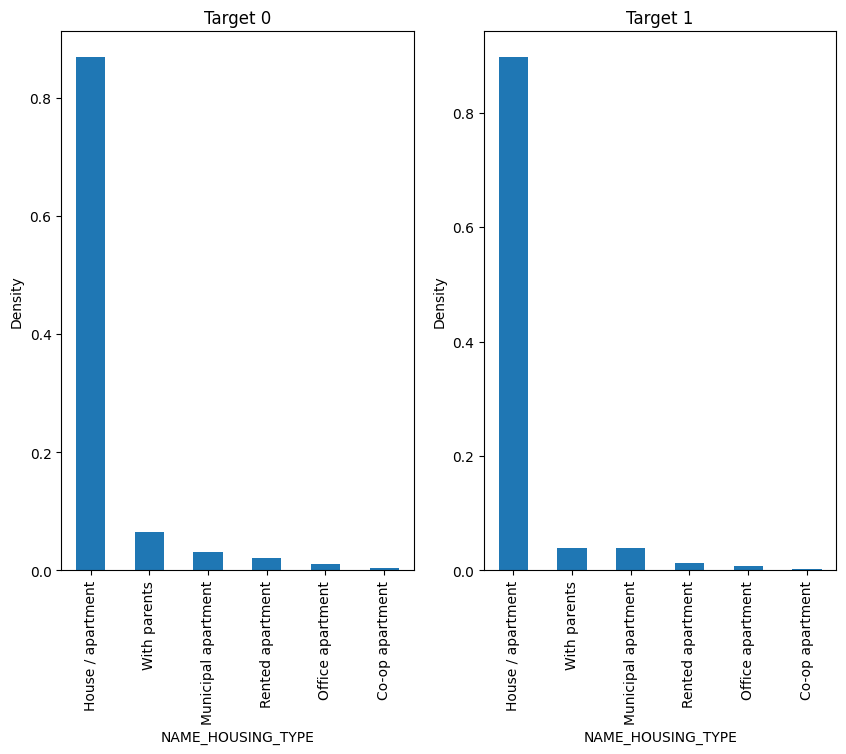

----------------------------------------------------------------
Plot on OCCUPATION_TYPE for Target 0 and 1


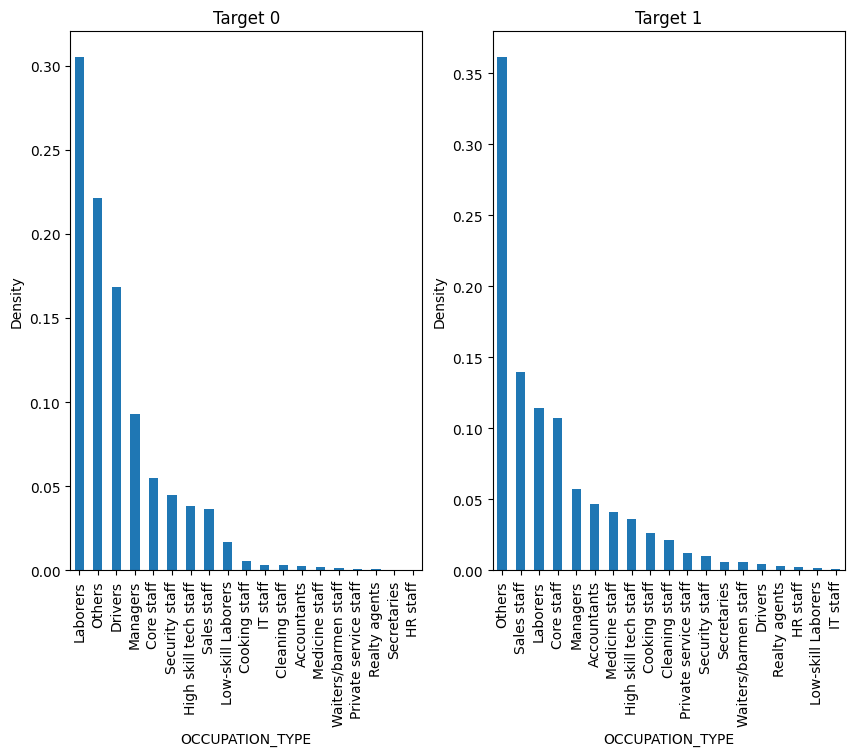

----------------------------------------------------------------
Plot on WEEKDAY_APPR_PROCESS_START for Target 0 and 1


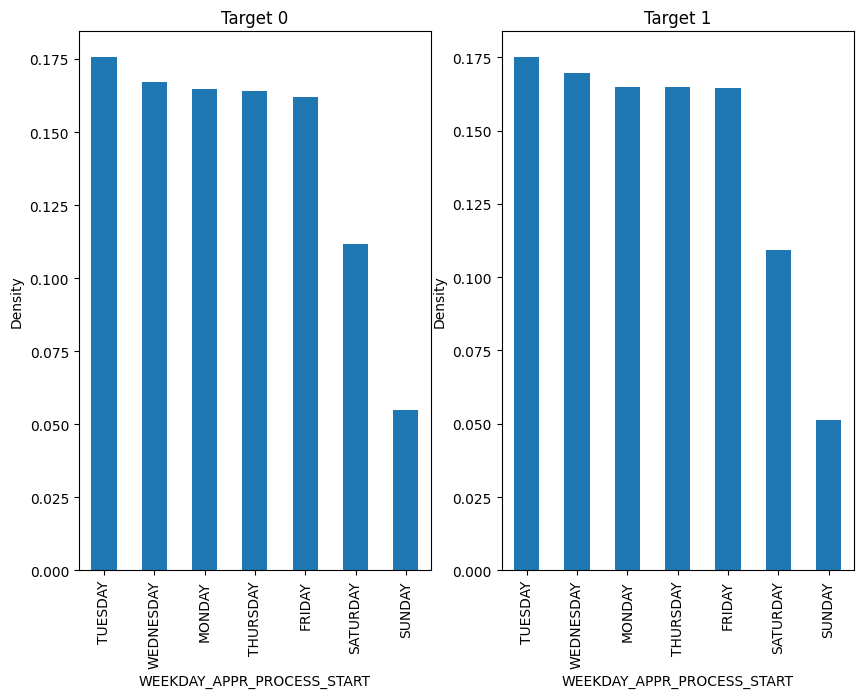

----------------------------------------------------------------
Plot on ORGANIZATION_TYPE for Target 0 and 1


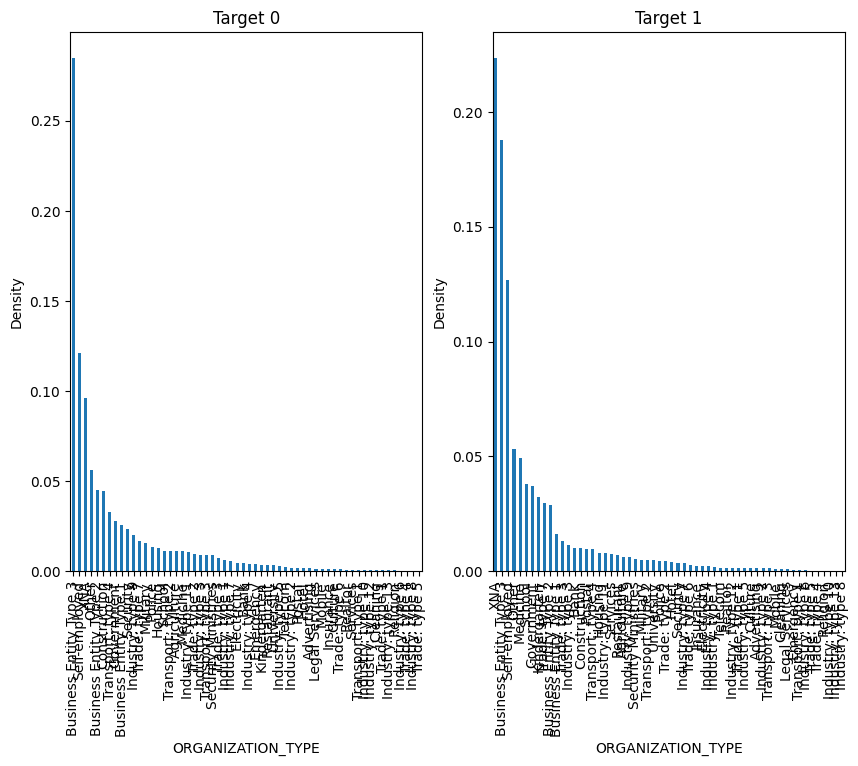

----------------------------------------------------------------
Plot on FONDKAPREMONT_MODE for Target 0 and 1


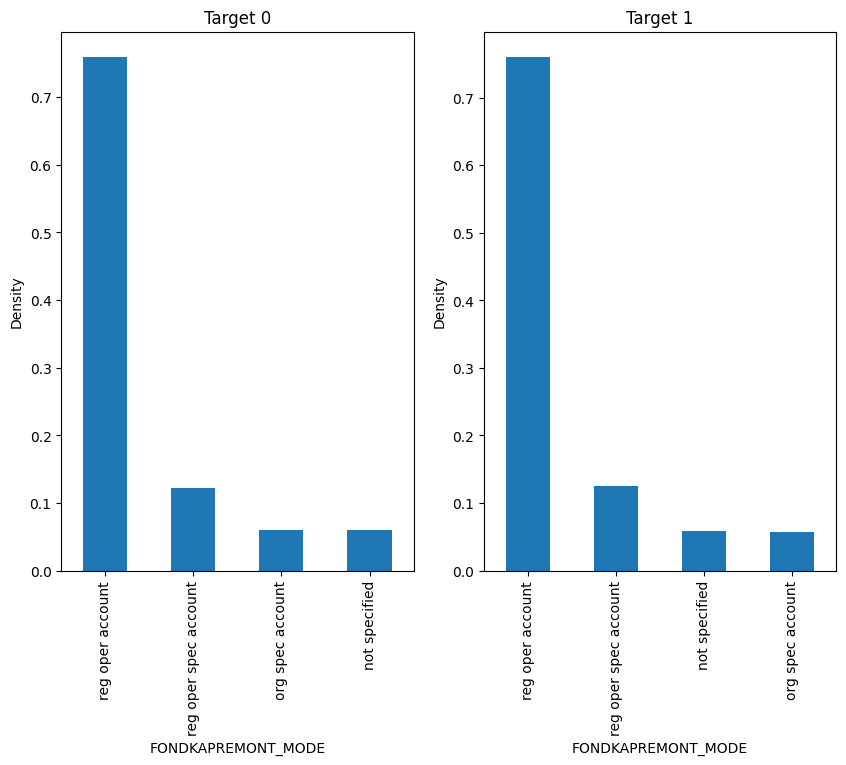

----------------------------------------------------------------
Plot on HOUSETYPE_MODE for Target 0 and 1


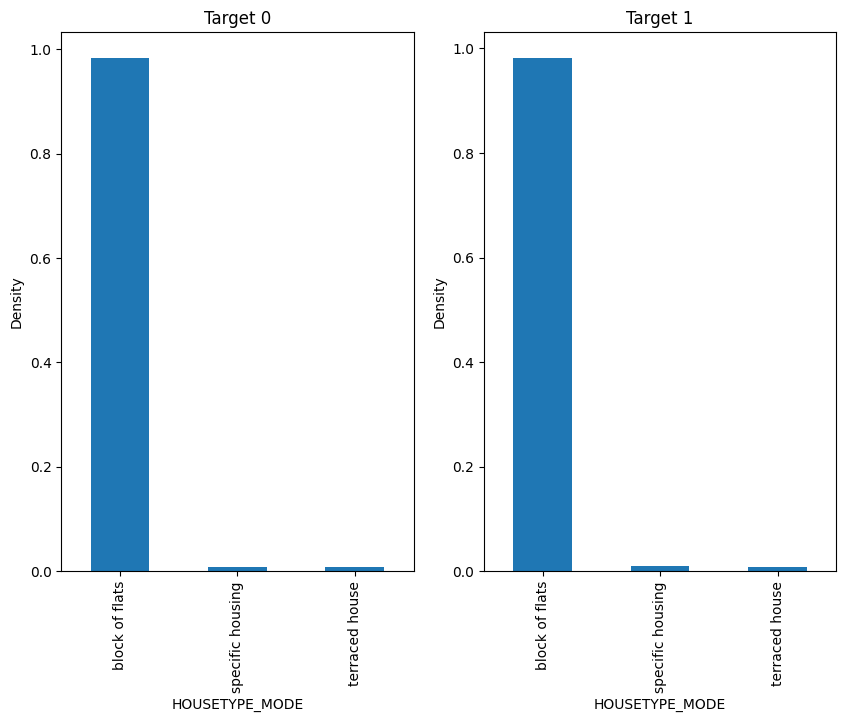

----------------------------------------------------------------
Plot on WALLSMATERIAL_MODE for Target 0 and 1


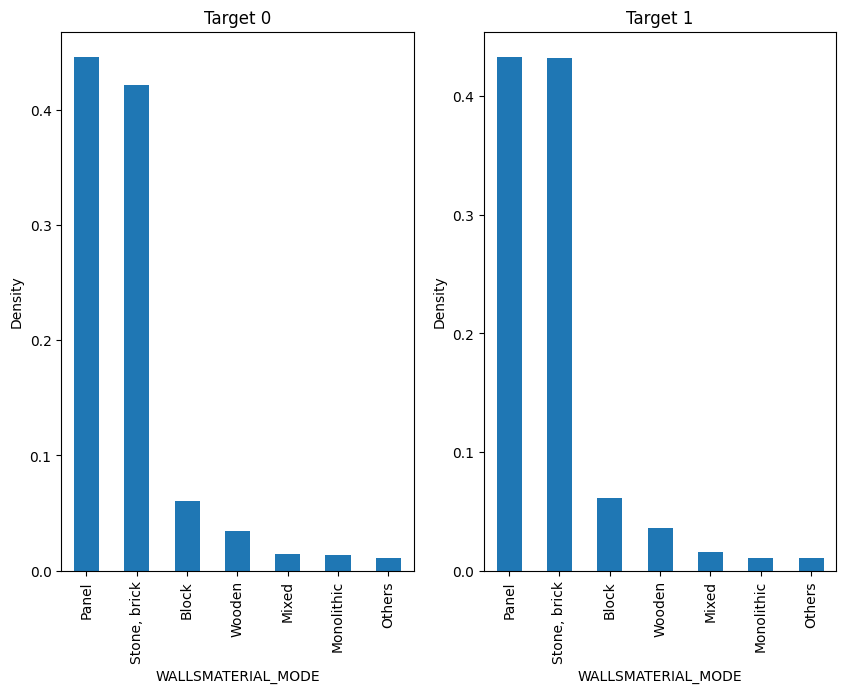

----------------------------------------------------------------
Plot on EMERGENCYSTATE_MODE for Target 0 and 1


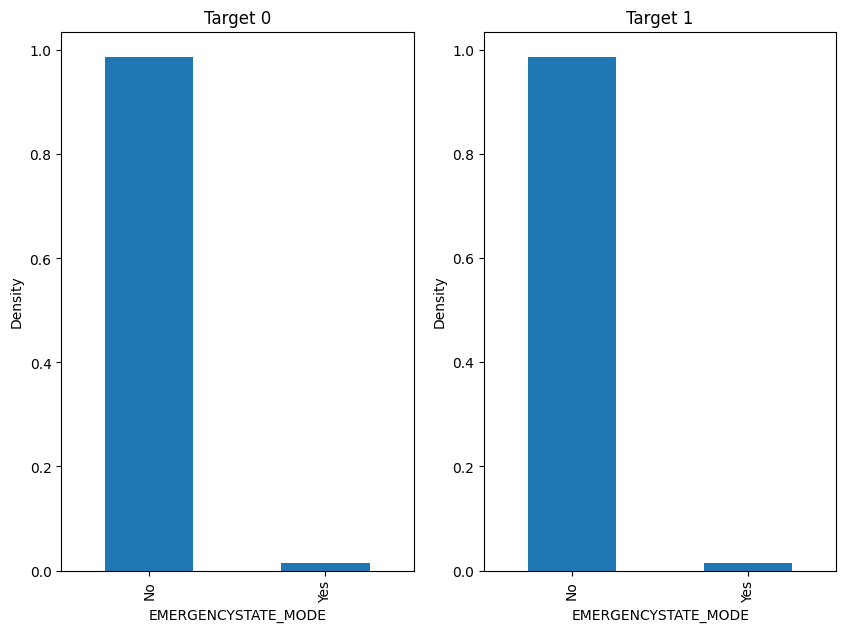

----------------------------------------------------------------


In [124]:
for col in cat_cols:
    print(f"Plot on {col} for Target 0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("----------------------------------------------------------------")

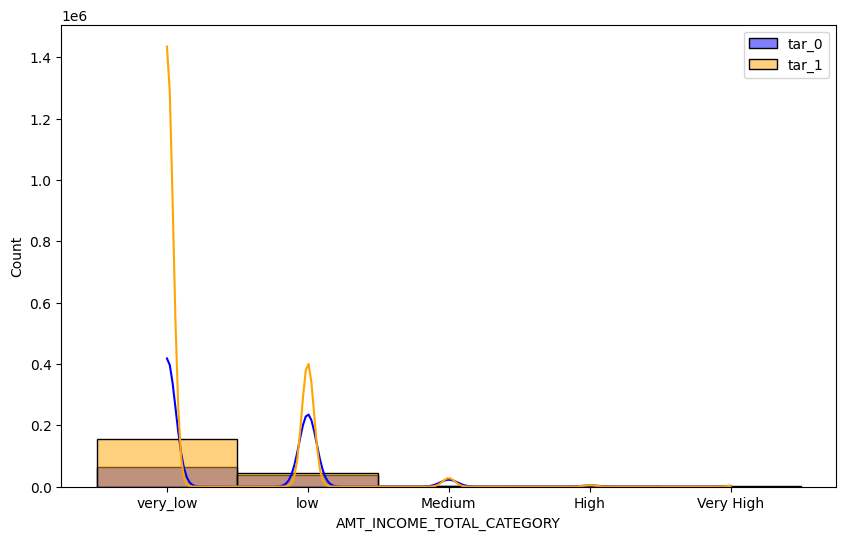

In [125]:
plt.figure(figsize=(10,6))
sns.histplot(tar_0['AMT_INCOME_TOTAL_CATEGORY'], label='tar_0', color='blue', kde=True)
sns.histplot(tar_1['AMT_INCOME_TOTAL_CATEGORY'], label='tar_1', color='orange', kde=True)
plt.legend()
plt.show()

Bivariate and multivariate analysis

<Axes: xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='HOUR_APPR_PROCESS_START'>

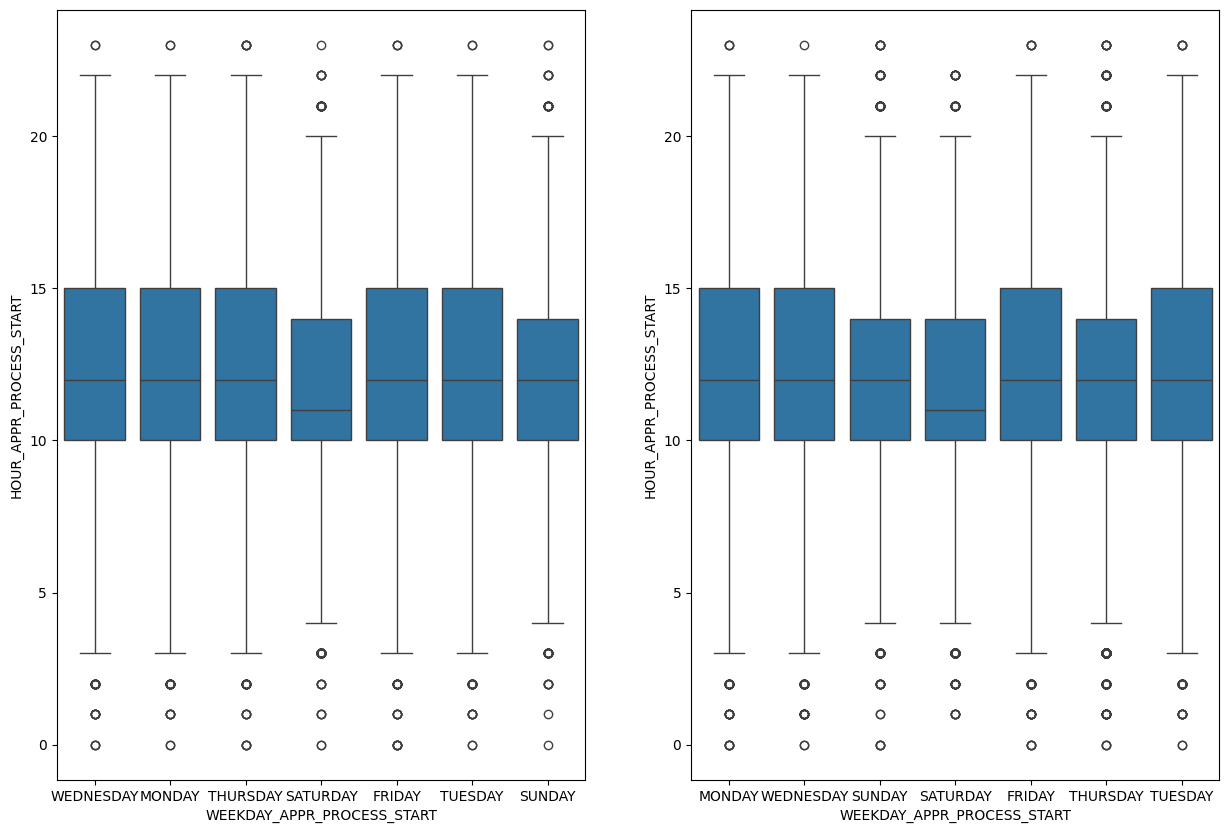

In [126]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START', y='HOUR_APPR_PROCESS_START', data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START', y='HOUR_APPR_PROCESS_START', data=tar_1)


Bivariate analysis between the AGE_CATEGORY Vs AMT_CREDIT

[]

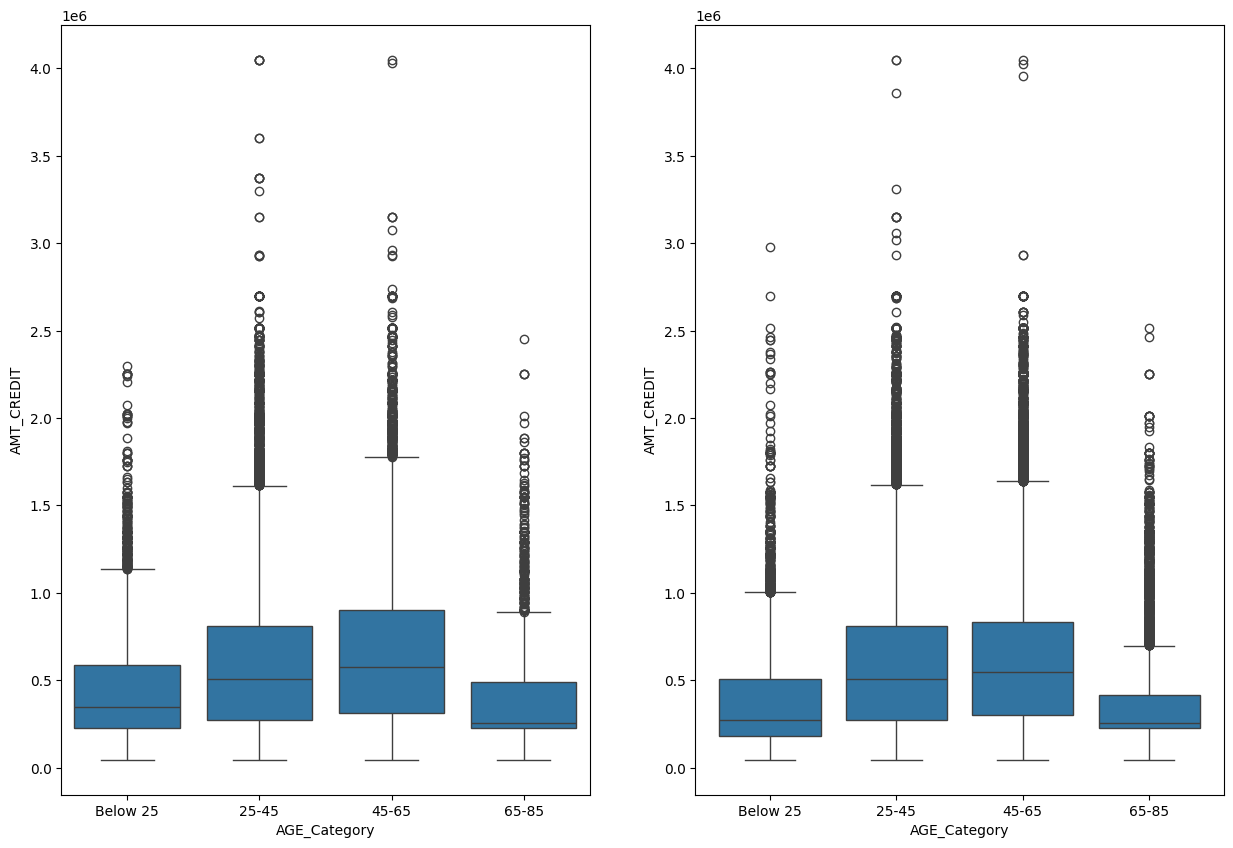

In [127]:
plt.figure(figsize =(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='AGE_Category', y='AMT_CREDIT', data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='AGE_Category', y='AMT_CREDIT', data=tar_1)
plt.plot()

PAIR PLOT AMOUNT Columns for Target 0

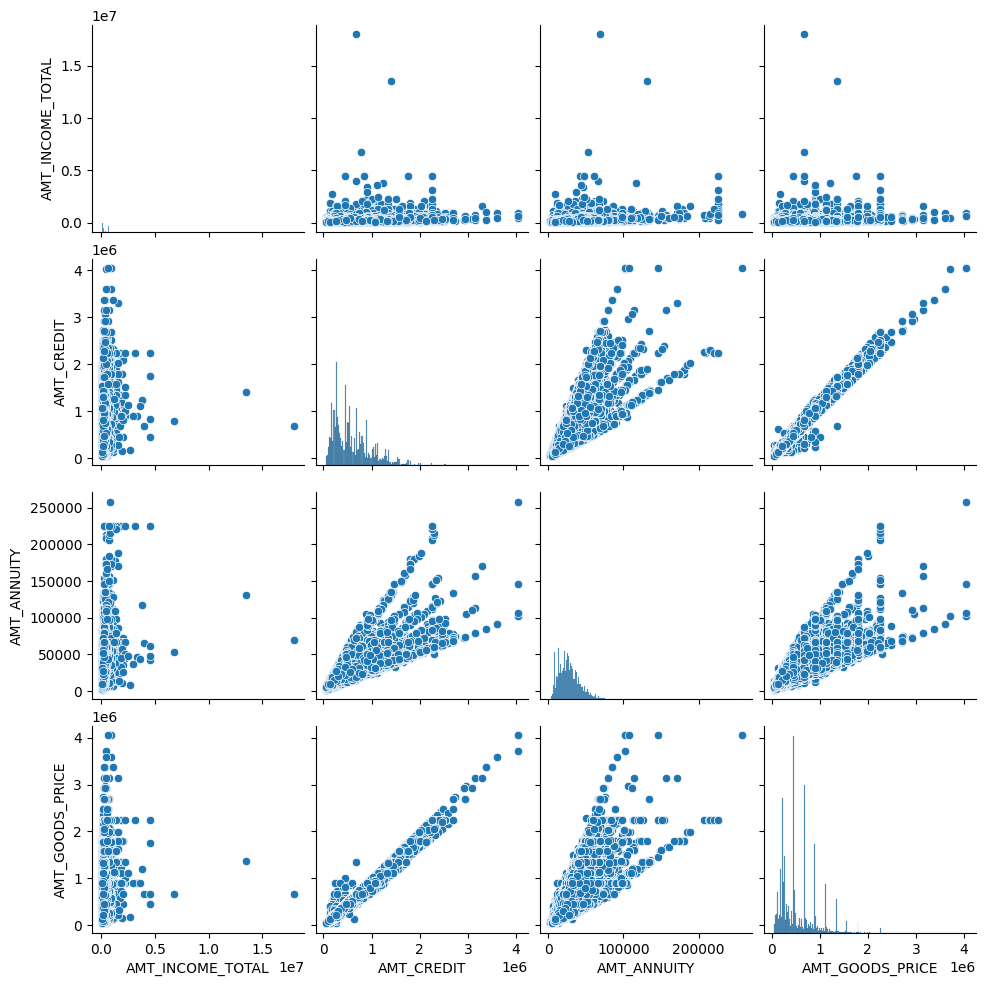

In [128]:
sns.pairplot(tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])
plt.show()

PAIR PLOT FOR AMOUNT Columns Target 1

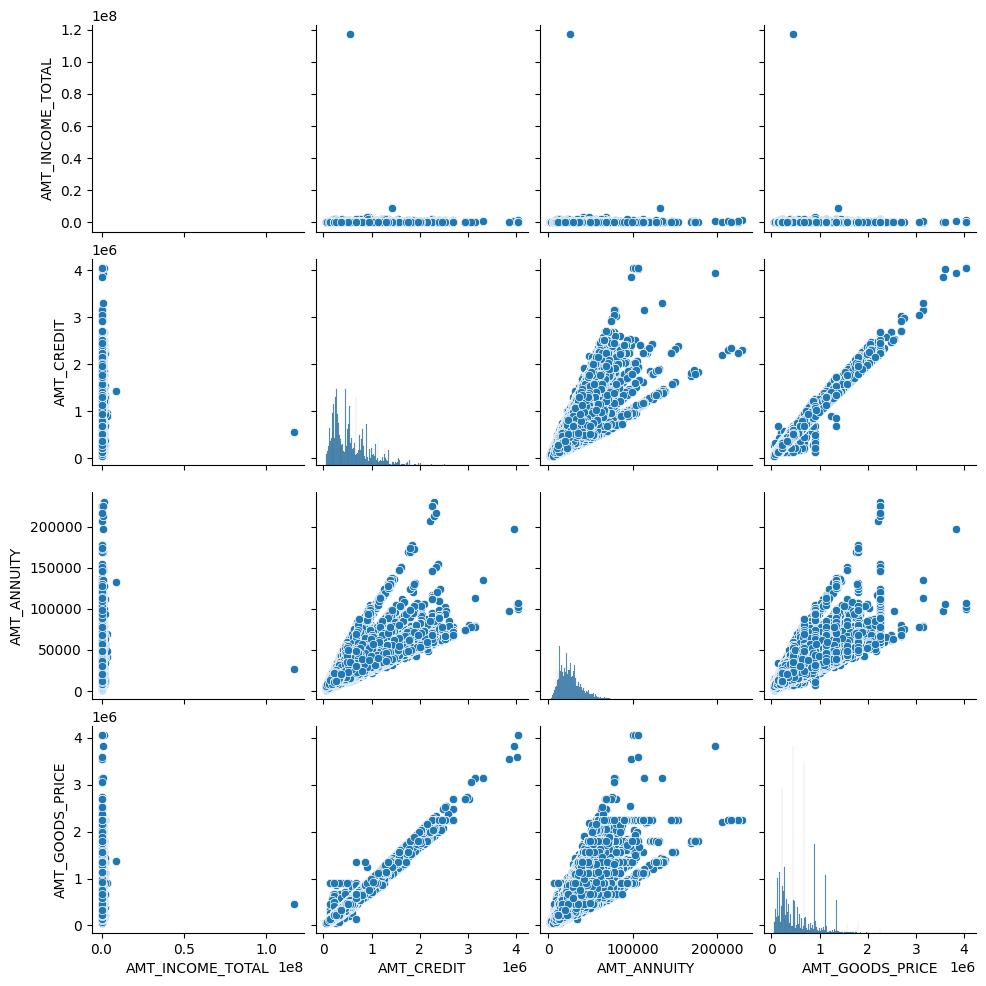

In [129]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])
plt.show()

Correlation between Numerical Columns

In [130]:
corr_data = app_data[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED"]]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           26   
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   

   YEARS_EMPLOYED  
0               1  
1               3  
2               0  
3               8  
4               8

In [131]:
corr_data.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.156870     0.191657         0.159610   
AMT_CREDIT                0.156870    1.000000     0.770138         0.986968   
AMT_ANNUITY               0.191657    0.770138     1.000000         0.775109   
AMT_GOODS_PRICE           0.159610    0.986968     0.775109         1.000000   
YEARS_BIRTH              -0.027239    0.055373    -0.009522         0.053382   
YEARS_EMPLOYED           -0.063837   -0.064321    -0.102852        -0.062268   

                  YEARS_BIRTH  YEARS_EMPLOYED  
AMT_INCOME_TOTAL    -0.027239       -0.063837  
AMT_CREDIT           0.055373       -0.064321  
AMT_ANNUITY         -0.009522       -0.102852  
AMT_GOODS_PRICE      0.053382       -0.062268  
YEARS_BIRTH          1.000000        0.623745  
YEARS_EMPLOYED       0.623745        1.000000

<Axes: >

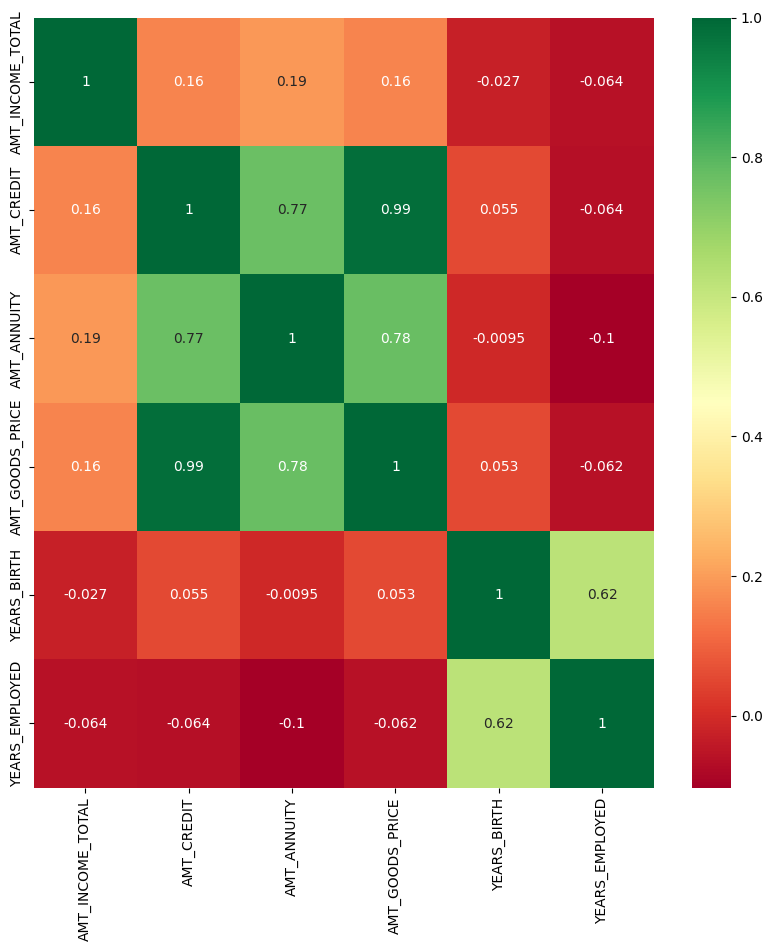

In [132]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True, cmap="RdYlGn")

Split the numerical variable bases on targer 0 and 1 to find correlations

In [133]:
corr_data_0 = tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED"]]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           26   
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   

   YEARS_EMPLOYED  
0               1  
1               3  
2               0  
3               8  
4               8

In [134]:
corr_data_0.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.301919     0.376768         0.310788   
AMT_CREDIT                0.301919    1.000000     0.741063         0.986976   
AMT_ANNUITY               0.376768    0.741063     1.000000         0.746877   
AMT_GOODS_PRICE           0.310788    0.986976     0.746877         1.000000   
YEARS_BIRTH              -0.032669    0.108032     0.030934         0.103507   
YEARS_EMPLOYED           -0.110796   -0.030316    -0.071187        -0.029846   

                  YEARS_BIRTH  YEARS_EMPLOYED  
AMT_INCOME_TOTAL    -0.032669       -0.110796  
AMT_CREDIT           0.108032       -0.030316  
AMT_ANNUITY          0.030934       -0.071187  
AMT_GOODS_PRICE      0.103507       -0.029846  
YEARS_BIRTH          1.000000        0.505158  
YEARS_EMPLOYED       0.505158        1.000000

In [135]:
corr_data_1 = tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED"]]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           26   
1          270000.0   1293502.5      35698.5        1129500.0           47   
2           67500.0    135000.0       6750.0         135000.0           53   
3          135000.0    312682.5      29686.5         297000.0           53   
4          121500.0    513000.0      21865.5         513000.0           55   

   YEARS_EMPLOYED  
0               1  
1               3  
2               0  
3               8  
4               8

<Axes: >

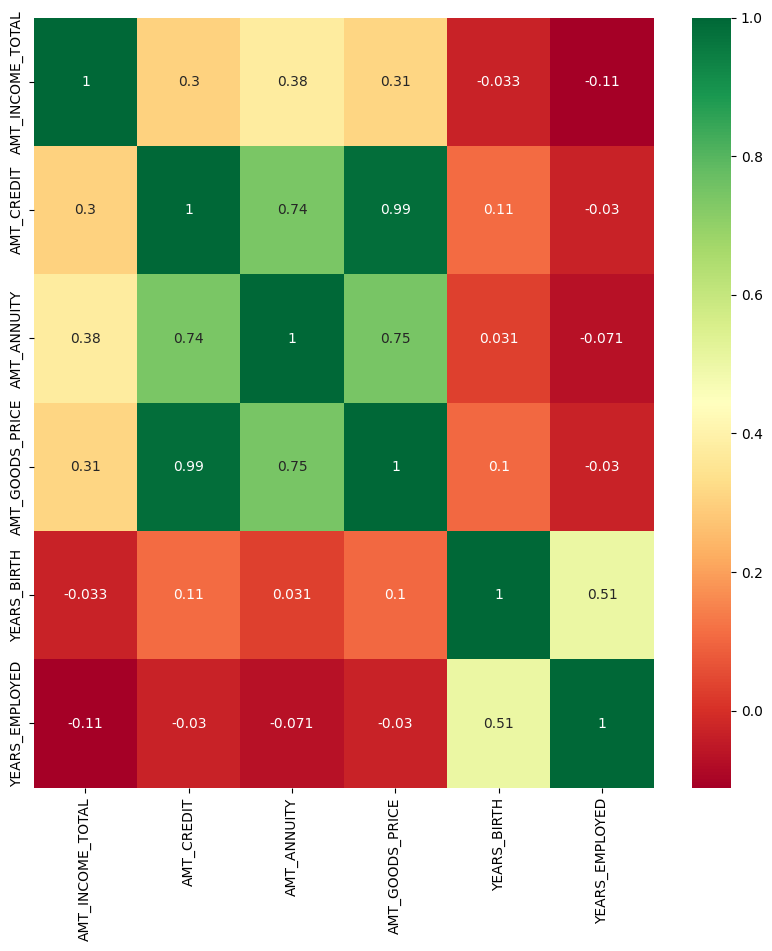

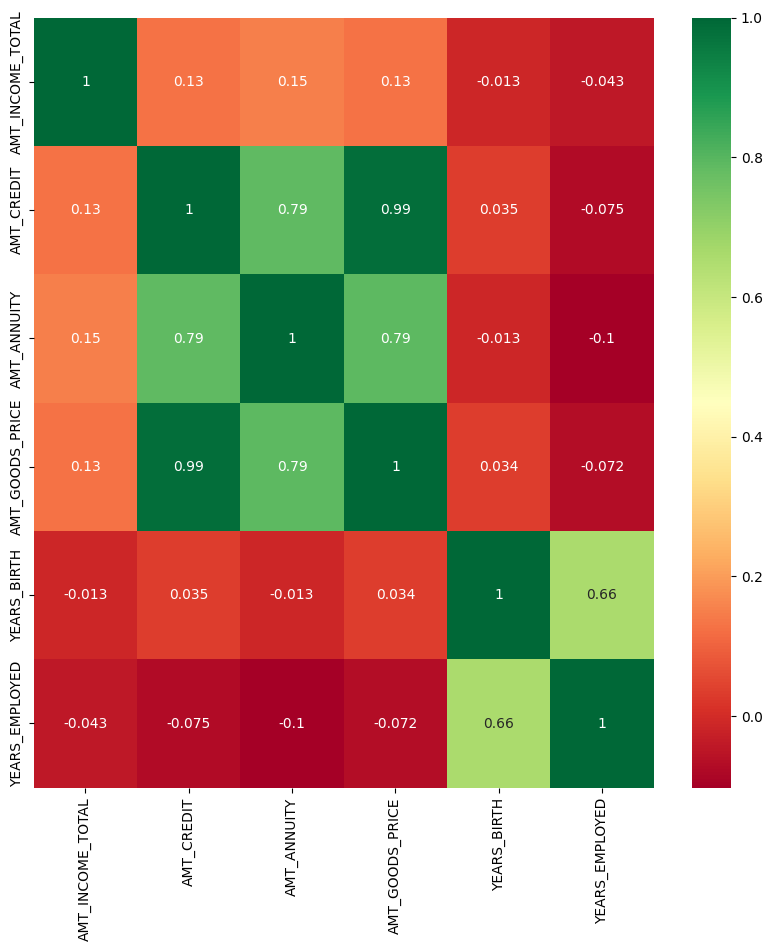

In [136]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(),annot=True, cmap="RdYlGn")
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1.corr(),annot=True, cmap="RdYlGn")

----------------------------------------------------------------

---->Now Working on Previous Application Dataset

In [137]:
papp_data= pd.read_csv("previous_application.csv")
papp_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [138]:
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [139]:
papp_data.shape

(1670214, 37)

In [140]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [141]:
percentage_p = 49
threshold_p = int(((100 - percentage_p) / 100) * papp_data.shape[0] + 1)
papp_df = papp_data.dropna(axis= 1, thresh=threshold_p)
papp_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4          

In [142]:
papp_df.shape

(1670214, 32)

Impute missing values

In [143]:
for col in papp_df.columns:
    if papp_df[col].dtype == np.int64 or papp_df[col].dtype == np.float64:
        papp_df[col] = papp_df[col].apply(lambda x: abs(x))

In [144]:
null_Cols = list(papp_df.columns[papp_df.isna().any()])
len(null_Cols)

11

In [145]:
papp_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [146]:
papp_df.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

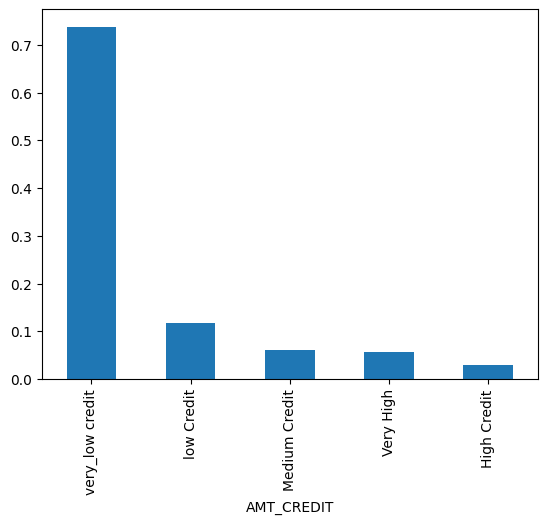

In [147]:
papp_df["AMT_CREDIT"] = pd.cut(papp_df.AMT_CREDIT, [0,200000,400000,600000,800000,10000000], labels= ["very_low credit", "low Credit","Medium Credit", "High Credit", "Very High"], include_lowest=True)
papp_df["AMT_CREDIT"].value_counts(normalize=True).plot.bar()
plt.show()

In [148]:
papp_df["AMT_GOODS_PRICE_Category"] = pd.cut(papp_df.AMT_GOODS_PRICE, [0, 40000, 90000, 125000, 175000, 200000], labels=["very_low", "low", "Medium", "High", "Very High"])


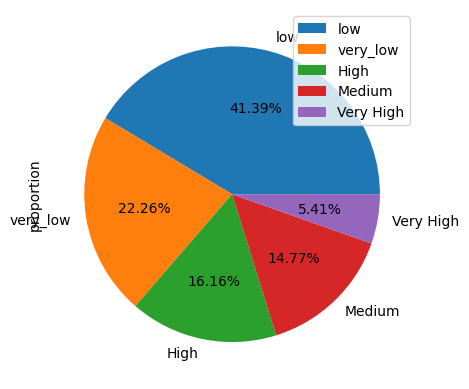

In [149]:
papp_df.AMT_GOODS_PRICE_Category.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

Dividing application dataset with NAME_CONTRACT_STATUS

In [150]:
approved = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Approved']
cancelled = papp_df[papp_df.NAME_CONTRACT_STATUS == 'cancelled']
refused = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Refused']
unused = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Unused offer']
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64

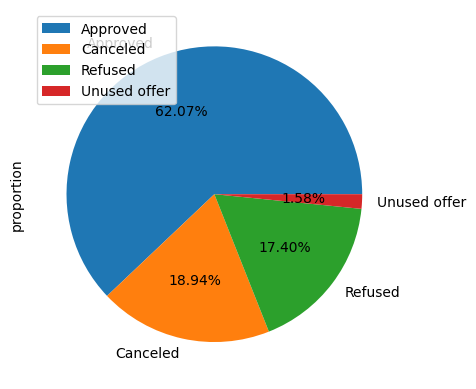

In [151]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

Conclusion above 62% are approved whereas 1.58% are unused and 17.4% are rejected remaining are cancelled

-> Univariate Analysis

In [152]:
cat_cols = list(papp_df.columns[papp_df.dtypes == np.object_])
num_cols = list(papp_df.columns[papp_df.dtypes == np.int64]) + list(papp_df.columns[papp_df.dtypes == np.float64])

In [153]:
cat_cols = ["NAME_CONTRACT_TYPE", "WEEKDAY_APPR_PROCESS_START", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE", "NAME_SELLER_INDUSTRY", "CHANNEL_TYPE", "NAME_YIELD_GROUP", "PRODUCT_COMBINATION"]

In [154]:
# num_cols= ["HOUR_APPR_PROCESS_START", "DAYS_DECISION", "AMT_ANNUITY", "AMT_CREDIT", "AMT_APPLICATION", "AMT_GOODS_PRICE", "CNT_PAYMENT"]
num_cols= ["HOUR_APPR_PROCESS_START", "DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_GOODS_PRICE", "CNT_PAYMENT"]

NAME_CONTRACT_TYPE
Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: proportion, dtype: float64


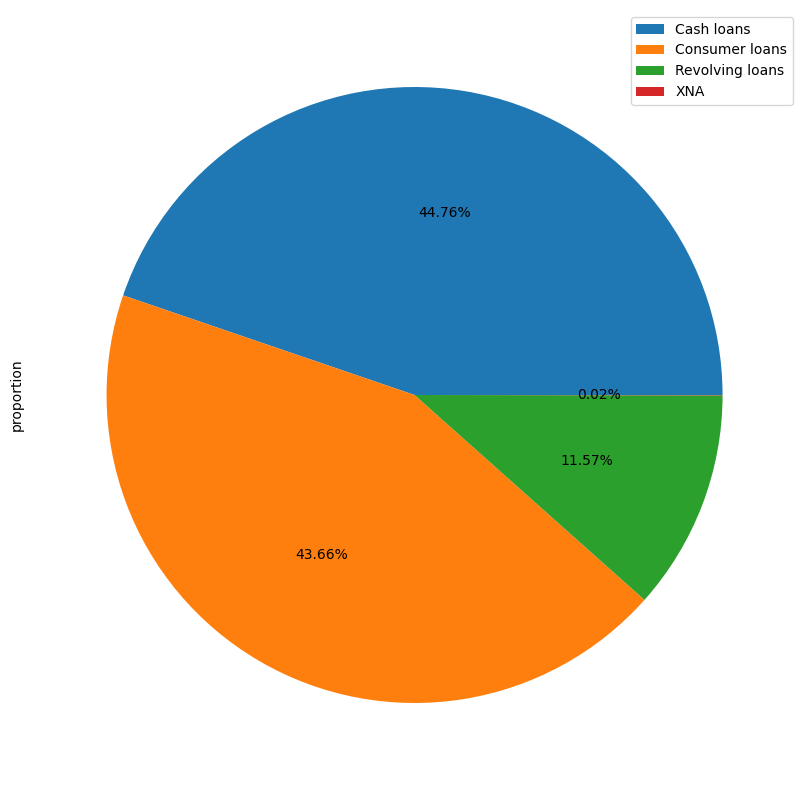

----------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START
TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150908
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: proportion, dtype: float64


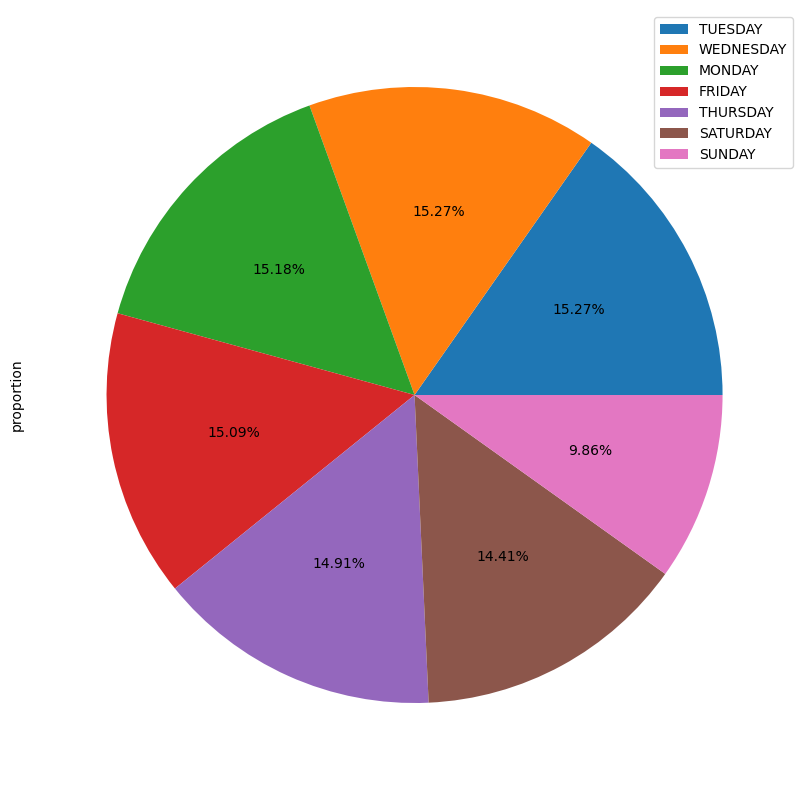

----------------------------------------------------------------
NAME_CONTRACT_STATUS
Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: proportion, dtype: float64


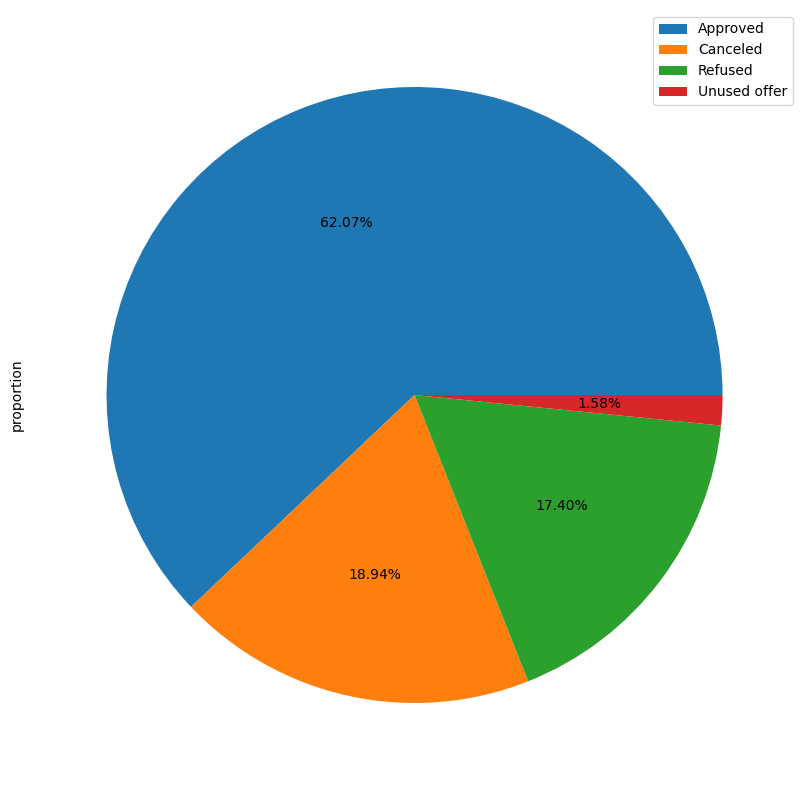

----------------------------------------------------------------
NAME_PAYMENT_TYPE
Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: proportion, dtype: float64


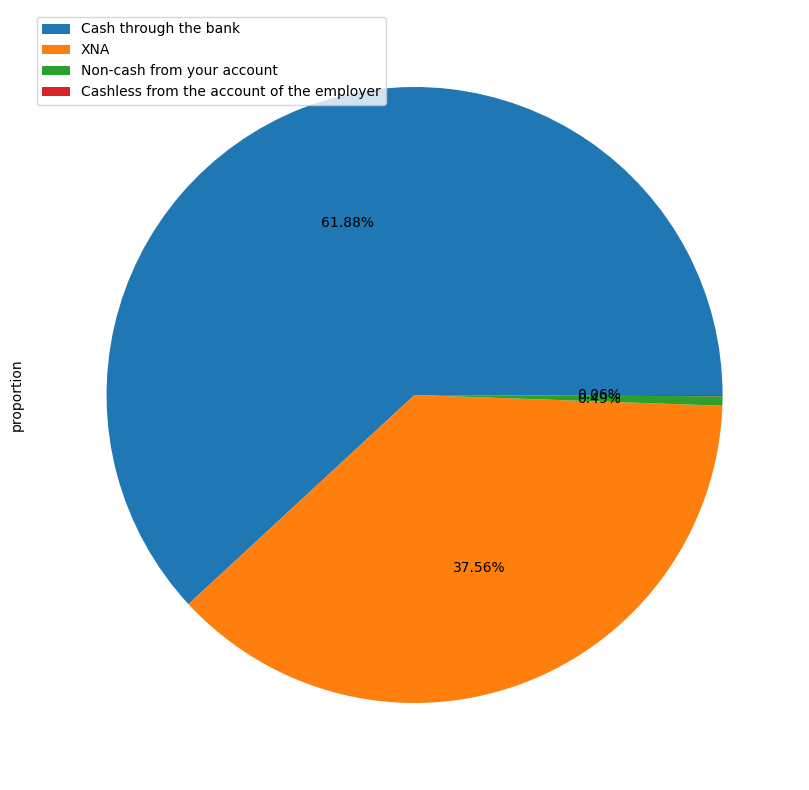

----------------------------------------------------------------
NAME_CLIENT_TYPE
Repeater     0.737188
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: proportion, dtype: float64


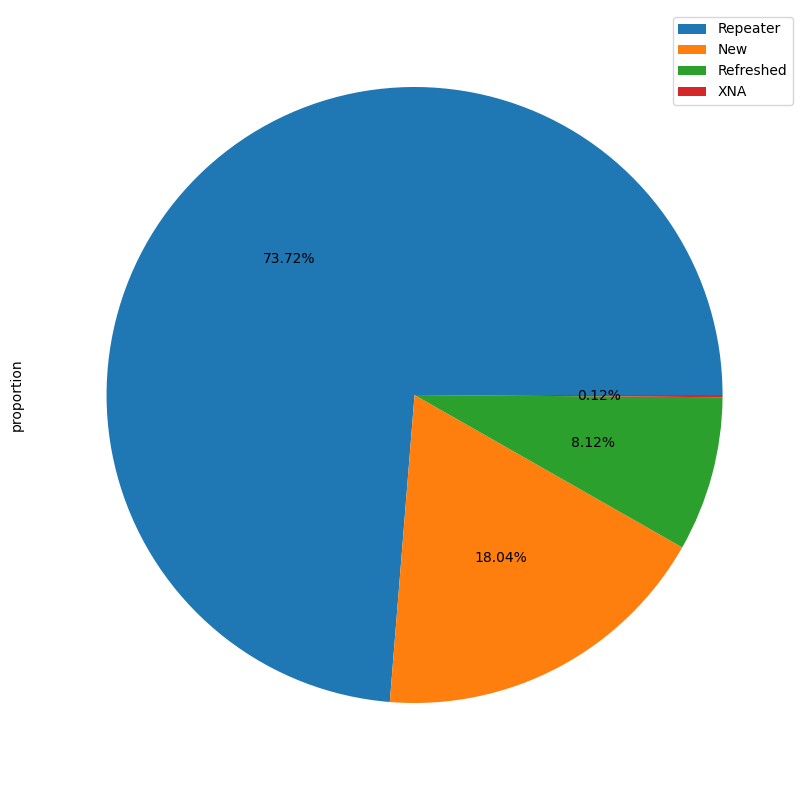

----------------------------------------------------------------
NAME_SELLER_INDUSTRY
XNA                     0.512342
Consumer electronics    0.238451
Connectivity            0.165266
Furniture               0.034636
Construction            0.017831
Clothing                0.014339
Industry                0.011492
Auto technology         0.002988
Jewelry                 0.001622
MLM partners            0.000727
Tourism                 0.000307
Name: proportion, dtype: float64


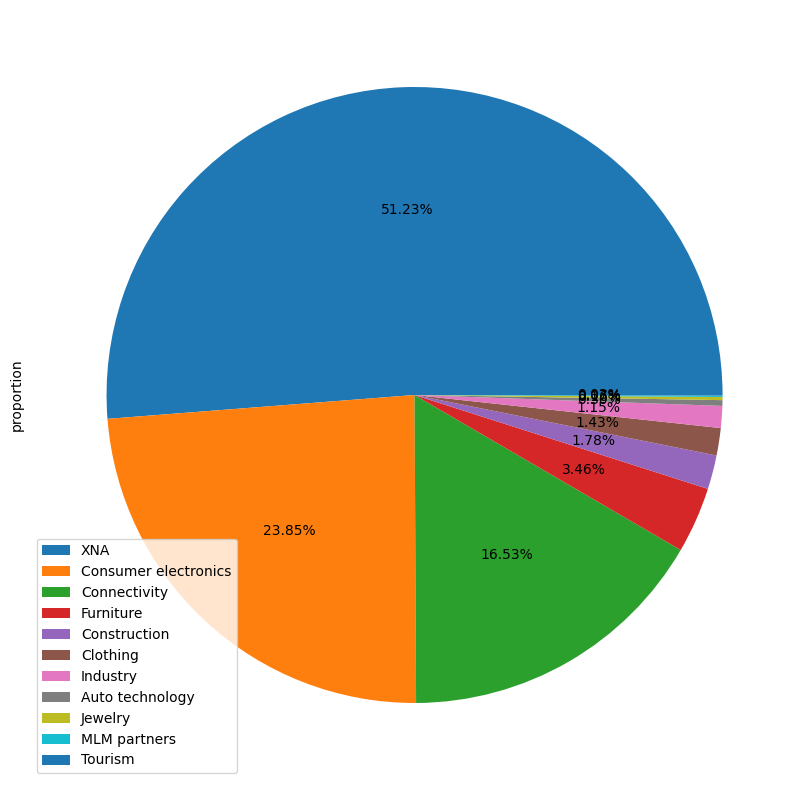

----------------------------------------------------------------
CHANNEL_TYPE
Credit and cash offices       0.431063
Country-wide                  0.296184
Stone                         0.126980
Regional / Local              0.064978
Contact center                0.042687
AP+ (Cash loan)               0.034155
Channel of corporate sales    0.003682
Car dealer                    0.000271
Name: proportion, dtype: float64


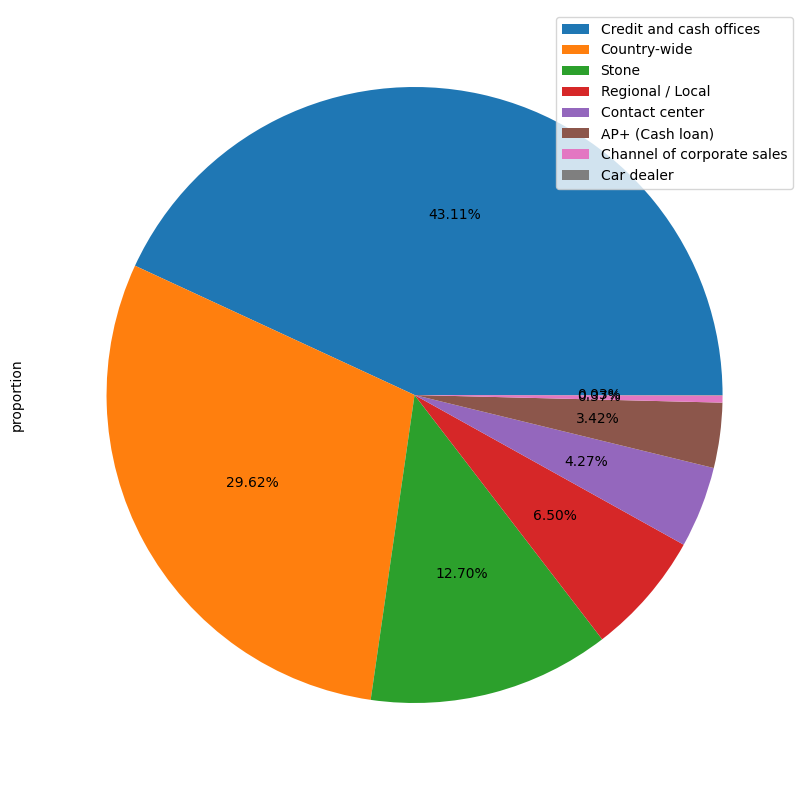

----------------------------------------------------------------
NAME_YIELD_GROUP
XNA           0.309670
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: proportion, dtype: float64


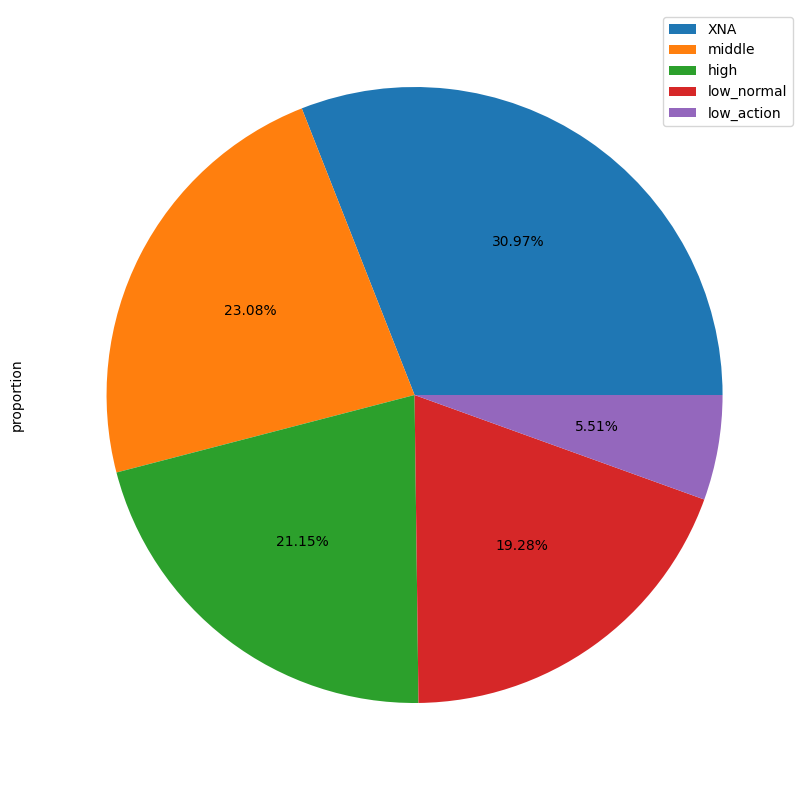

----------------------------------------------------------------
PRODUCT_COMBINATION
Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067420
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014421
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: proportion, dtype: float64


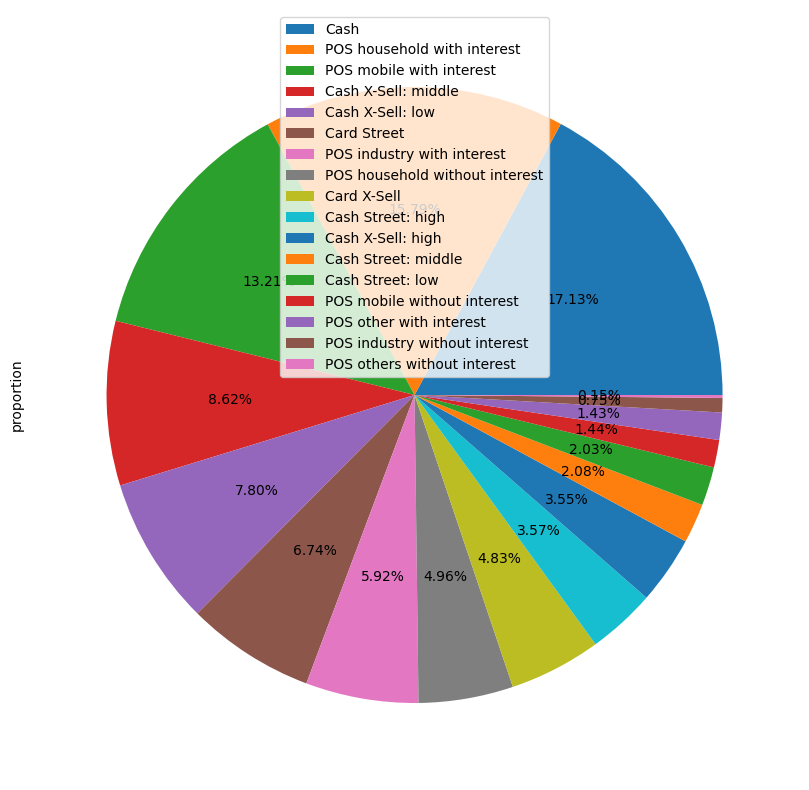

----------------------------------------------------------------


In [155]:
for col in cat_cols:
    print(papp_df[col].value_counts(normalize=True*100))
    plt.figure(figsize=[10,10])
    papp_df[col].value_counts(normalize=True*100).plot.pie(labeldistance= None,autopct = '%1.2f%%')
    plt.legend()
    plt.show()
    print("----------------------------------------------------------------")

In [156]:
num_cols

['HOUR_APPR_PROCESS_START',
 'DAYS_DECISION',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT']

99th Percentile 20.0
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


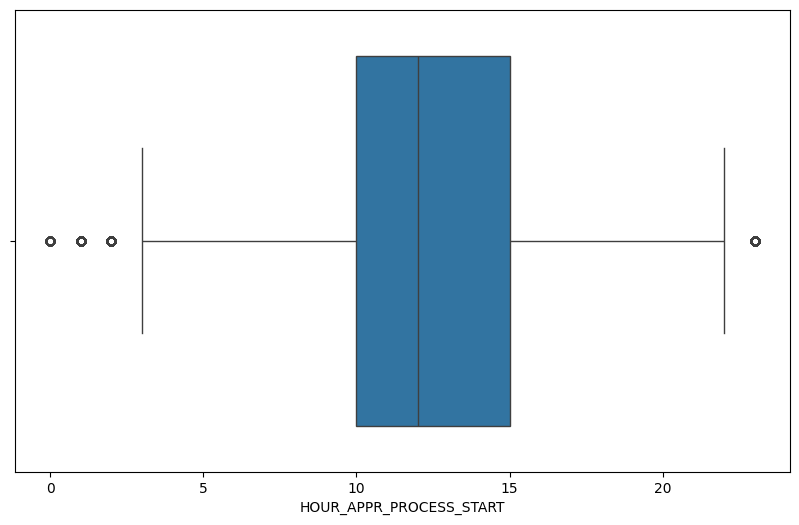

----------------------------------------------------------------
99th Percentile 2835.0
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


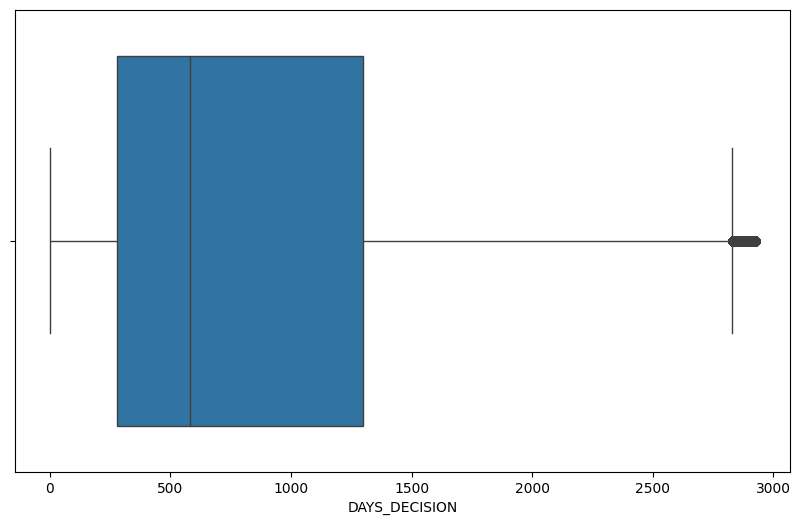

----------------------------------------------------------------
99th Percentile nan
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


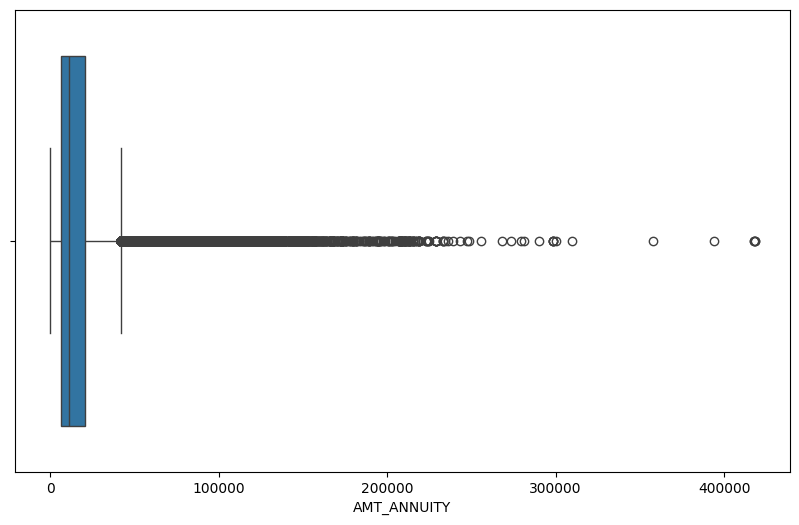

----------------------------------------------------------------
99th Percentile 1350000.0
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


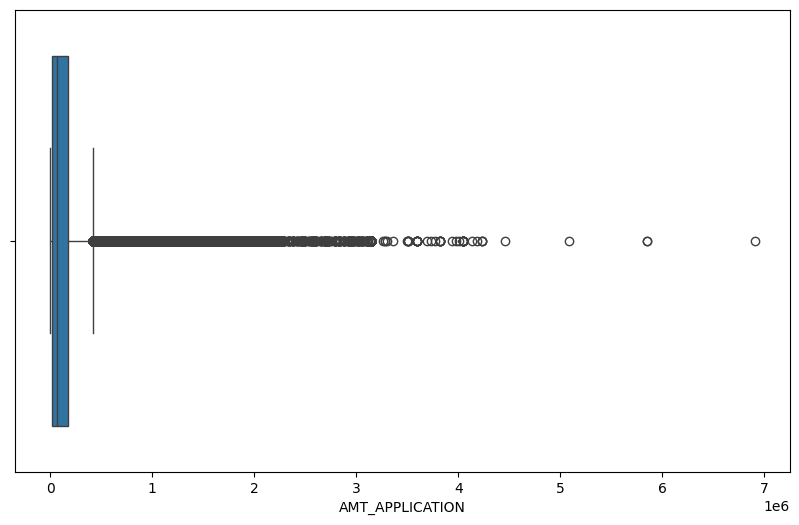

----------------------------------------------------------------
99th Percentile nan
count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


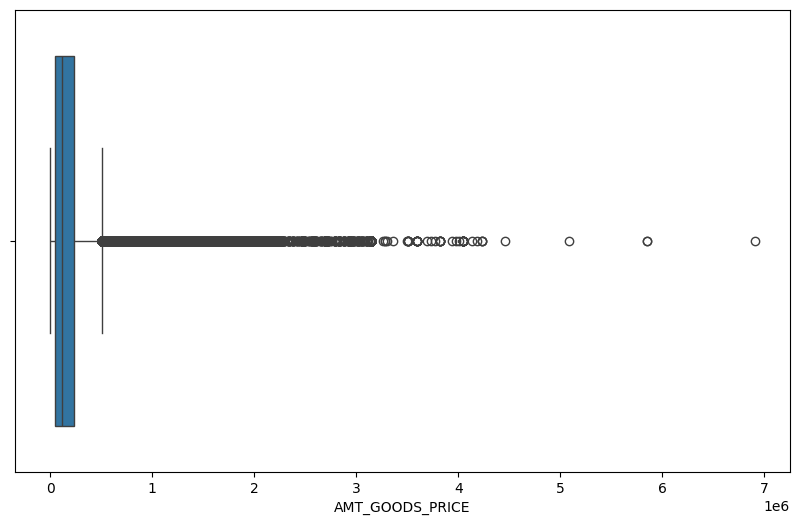

----------------------------------------------------------------
99th Percentile nan
count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


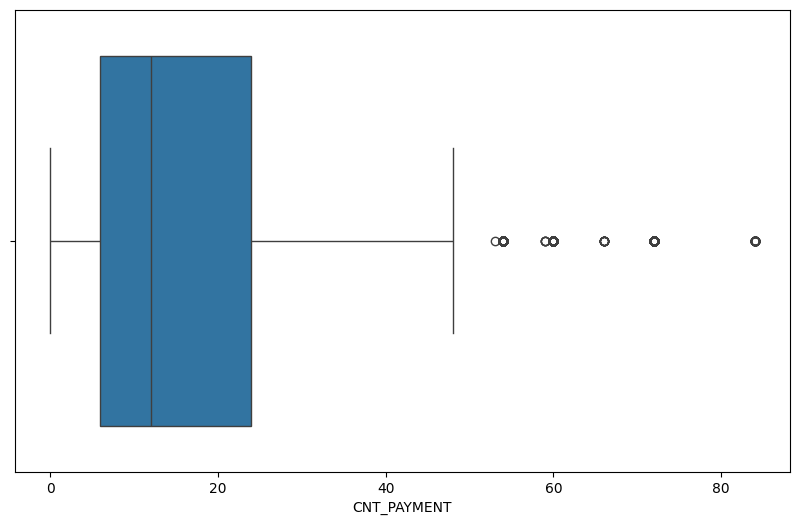

----------------------------------------------------------------


In [157]:
for col in num_cols:
    print("99th Percentile", np.percentile(papp_df[col],99))
    print(papp_df[col].describe())
    plt.figure(figsize=[10,6])
    sns.boxplot(data=papp_df, x=col)
    plt.show()
    print("----------------------------------------------------------------")


BIVARIATE AND MULTIVARIATE ANALYSIS

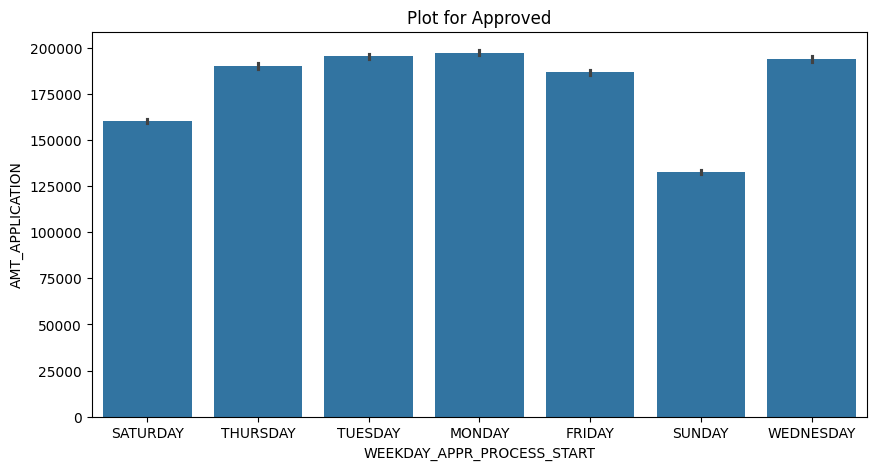

In [158]:
plt.figure(figsize=[10,5])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION", data=approved)
plt.title("Plot for Approved")
plt.show()

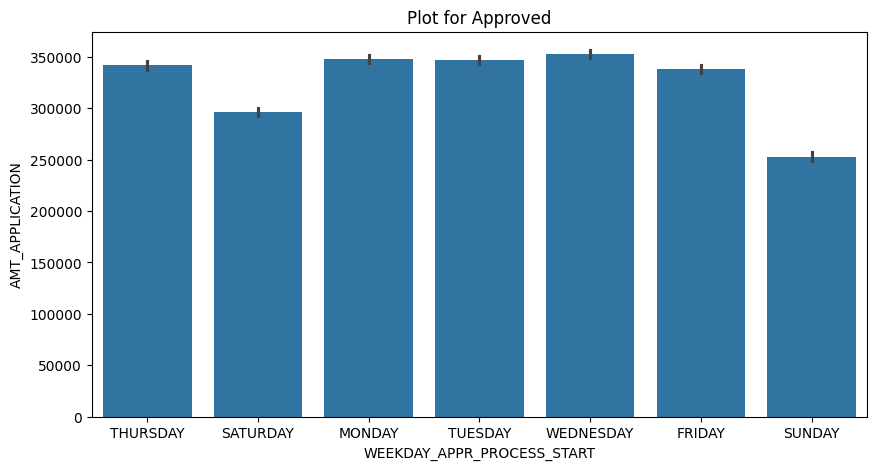

In [159]:
plt.figure(figsize=[10,5])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION", data=refused)
plt.title("Plot for Approved")
plt.show()

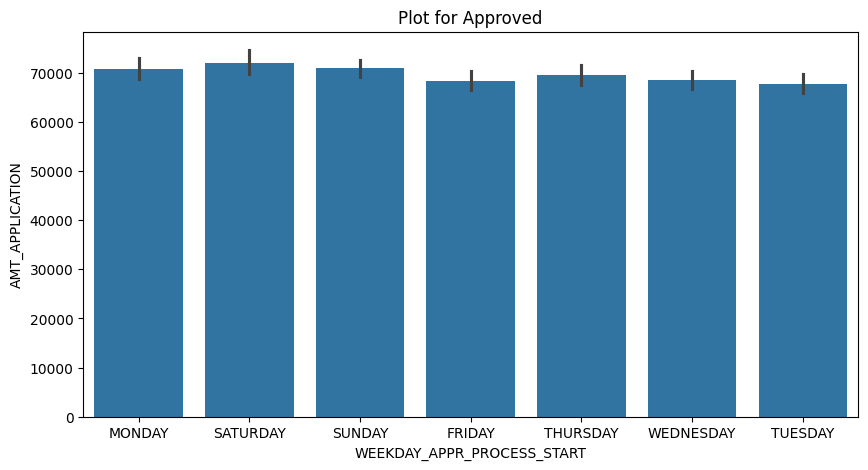

In [160]:
plt.figure(figsize=[10,5])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION", data=unused)
plt.title("Plot for Approved")
plt.show()

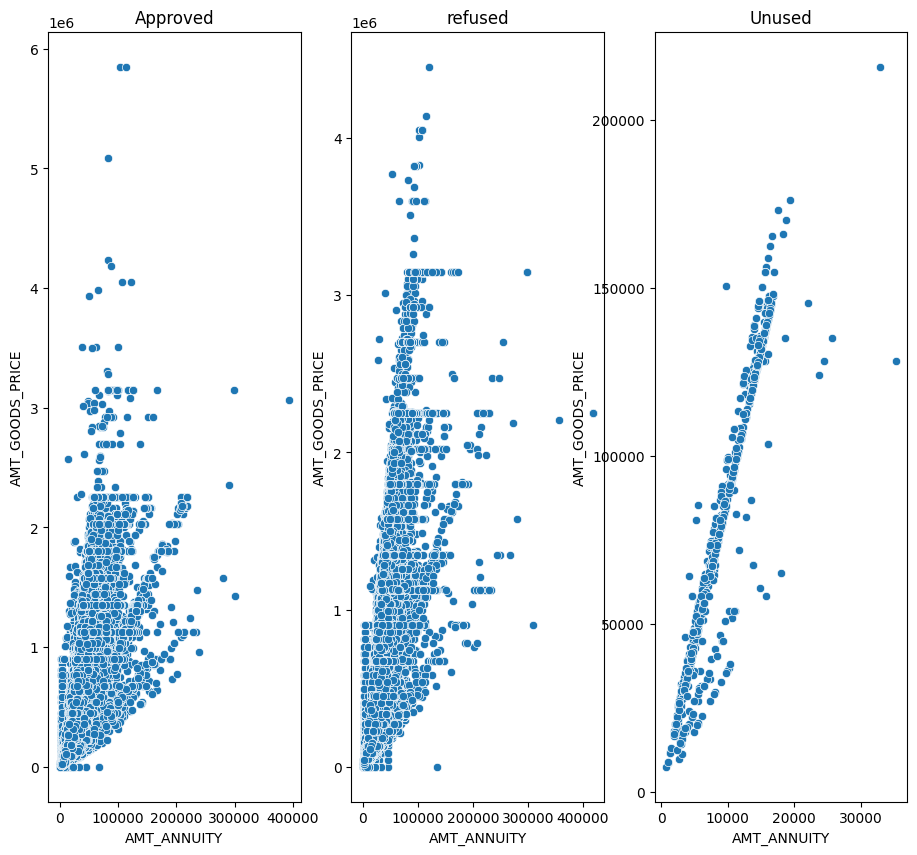

In [161]:
plt.figure(figsize=[15,10])
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x = "AMT_ANNUITY" , y = "AMT_GOODS_PRICE" , data = approved)
plt.subplot(1,4,2)
plt.title("refused")
sns.scatterplot(x = "AMT_ANNUITY" , y = "AMT_GOODS_PRICE" , data = refused)
plt.subplot(1,4,3)
plt.title("Unused")
sns.scatterplot(x = "AMT_ANNUITY" , y = "AMT_GOODS_PRICE" , data = unused)
plt.show()

In [162]:
corr_approved = approved[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE", "CNT_PAYMENT" ]]
corr_refused = refused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE", "CNT_PAYMENT" ]]
corr_cancelled = cancelled[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE", "CNT_PAYMENT" ]]
corr_unused = unused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE", "CNT_PAYMENT" ]]

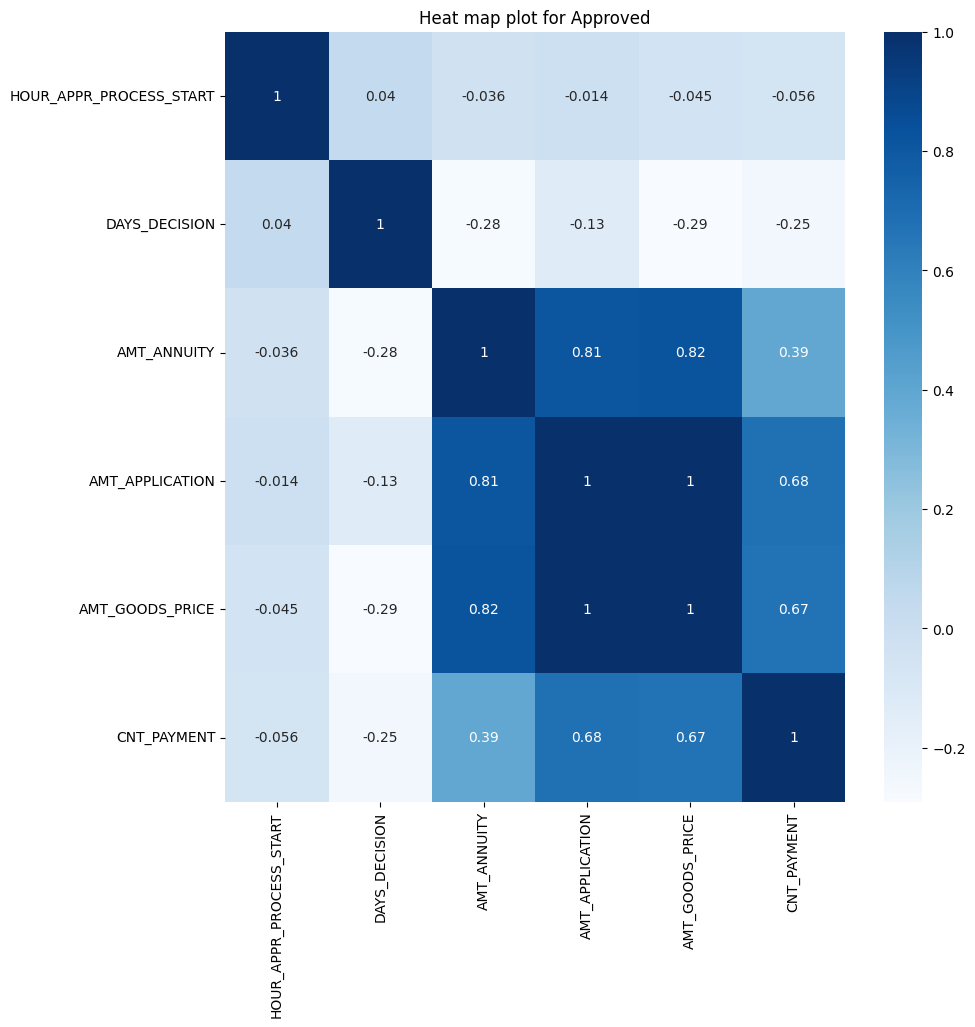

In [163]:
for col in num_cols:
    papp_df[col] = pd.to_numeric(papp_df[col], errors='coerce')

# Calculate correlation matrix
corr_approved = papp_df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=[10,10])
sns.heatmap(corr_approved, annot=True, cmap="Blues")
plt.title("Heat map plot for Approved")
plt.show()


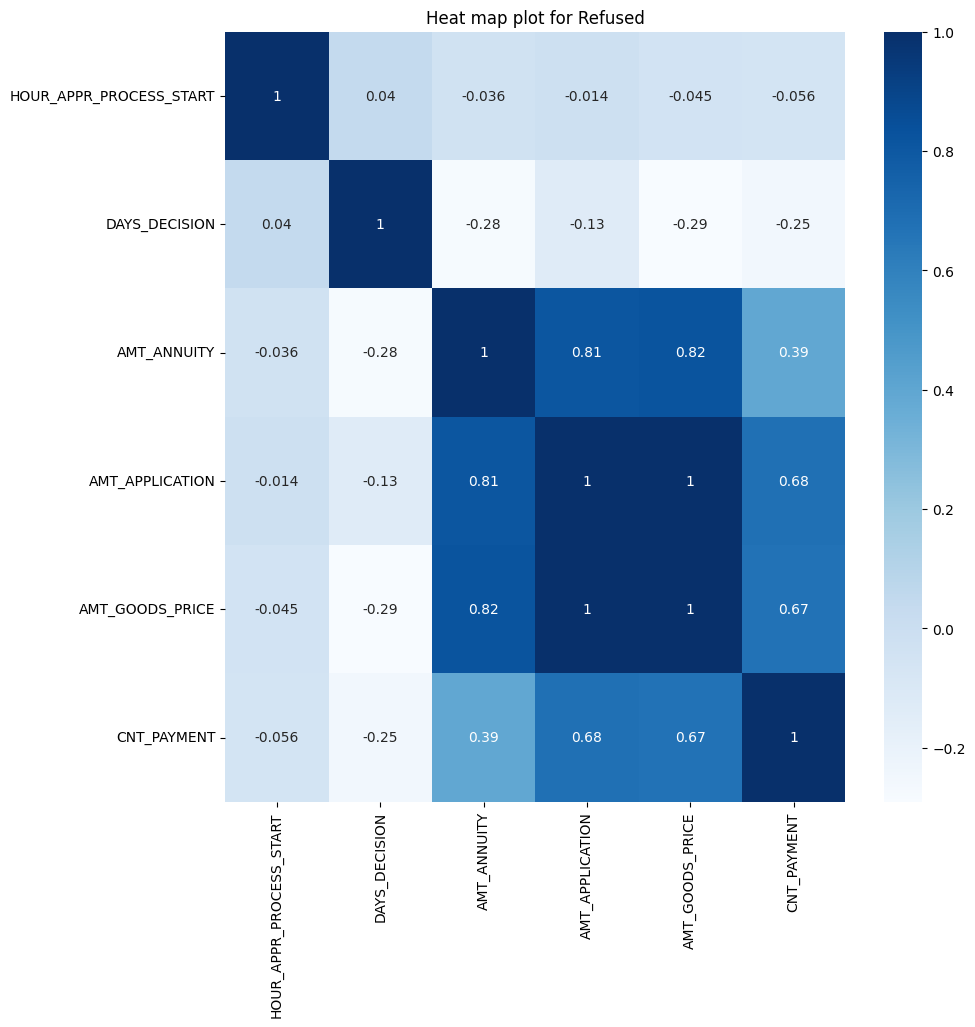

In [164]:
# #co-relation for numeric columns for Refused
# Convert numeric columns to numeric values, ignoring errors
for col in num_cols:
    papp_df[col] = pd.to_numeric(papp_df[col], errors='coerce')

# Calculate correlation matrix
corr_refused = papp_df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=[10,10])
sns.heatmap(corr_refused, annot=True, cmap="Blues")
plt.title("Heat map plot for Refused")
plt.show()


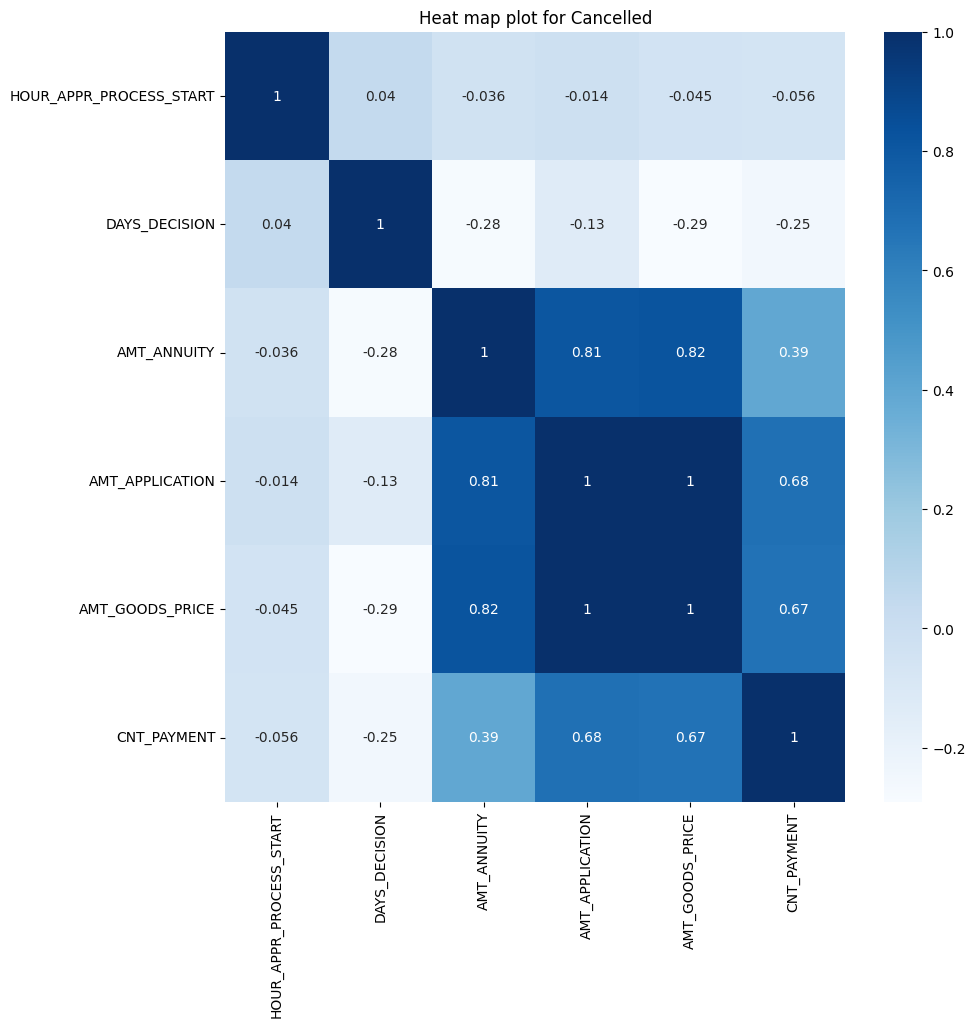

In [165]:
corr_cancelled = papp_df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=[10,10])
sns.heatmap(corr_cancelled, annot=True, cmap="Blues")
plt.title("Heat map plot for Cancelled")
plt.show()

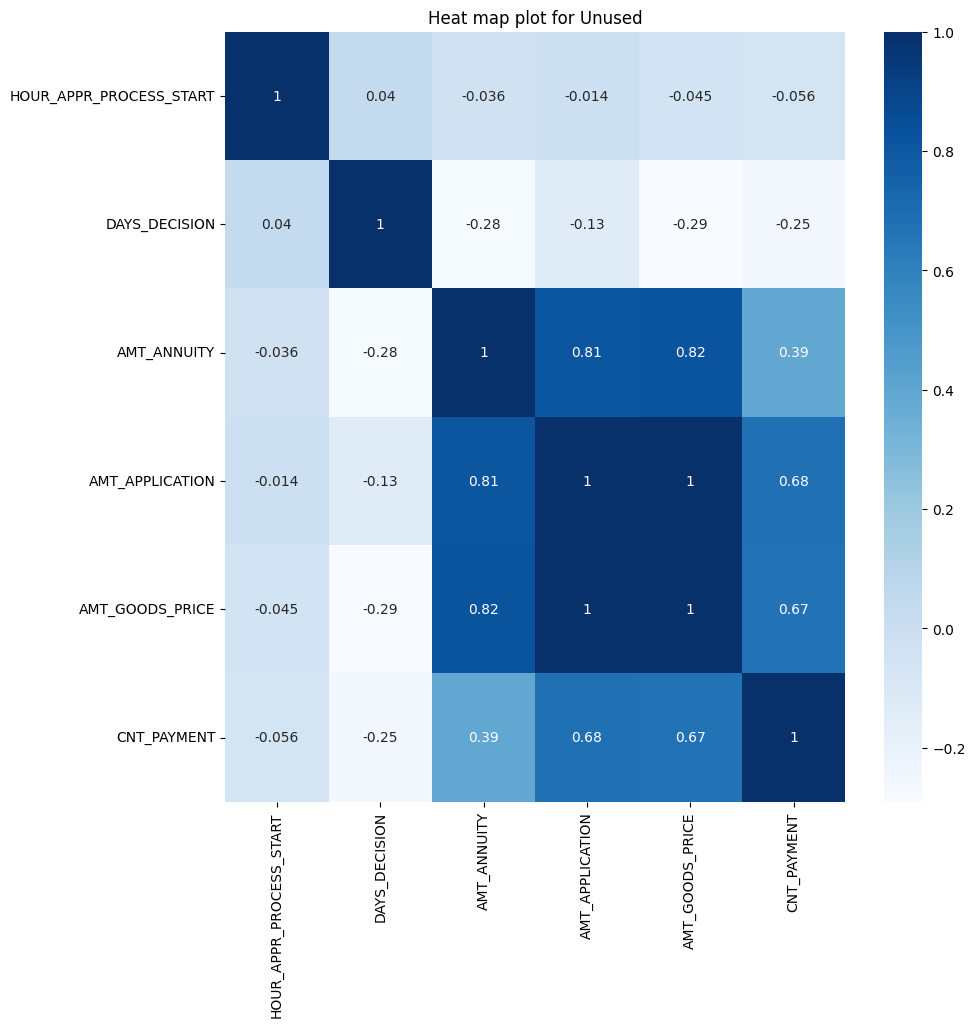

In [166]:
# #co-relation for numeric columns for unused
# Convert numeric columns to numeric values, ignoring errors
for col in num_cols:
    papp_df[col] = pd.to_numeric(papp_df[col], errors='coerce')

# Calculate correlation matrix
corr_unused = papp_df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=[10,10])
sns.heatmap(corr_unused, annot=True, cmap="Blues")
plt.title("Heat map plot for Unused")
plt.show()


merge the application and previous application dataframes

In [167]:

merge_df = app_df.merge(papp_df, on = ["SK_ID_CURR"] , how= 'left')
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.003541      -16765          -1188            -1186.0   
3                    0.003541      -16765          -1188            -1186.0   
4                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2             -291           1               1                0   
3             -291           1               1                0   
4            -2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              2.0   
3                 1           1           0              2.0   
4                 1           1           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4    

In [168]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 104 entries, SK_ID_CURR to AMT_GOODS_PRICE_Category
dtypes: category(2), float64(35), int64(41), object(26)
memory usage: 1.1+ GB


filtering required columns for our Analysis

In [169]:

for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col , axis= 1, inplace=True)

In [170]:
merge_df.shape

(1430155, 75)

In [171]:
res1 = pd.pivot_table(data=merge_df , index= ["NAME_INCOME_TYPE" , "NAME_CLIENT_TYPE"] , columns=["NAME_CONTRACT_STATUS"] , values= "TARGET" , aggfunc="mean")
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000       NaN       NaN   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000       NaN  0.500000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                        NaN  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

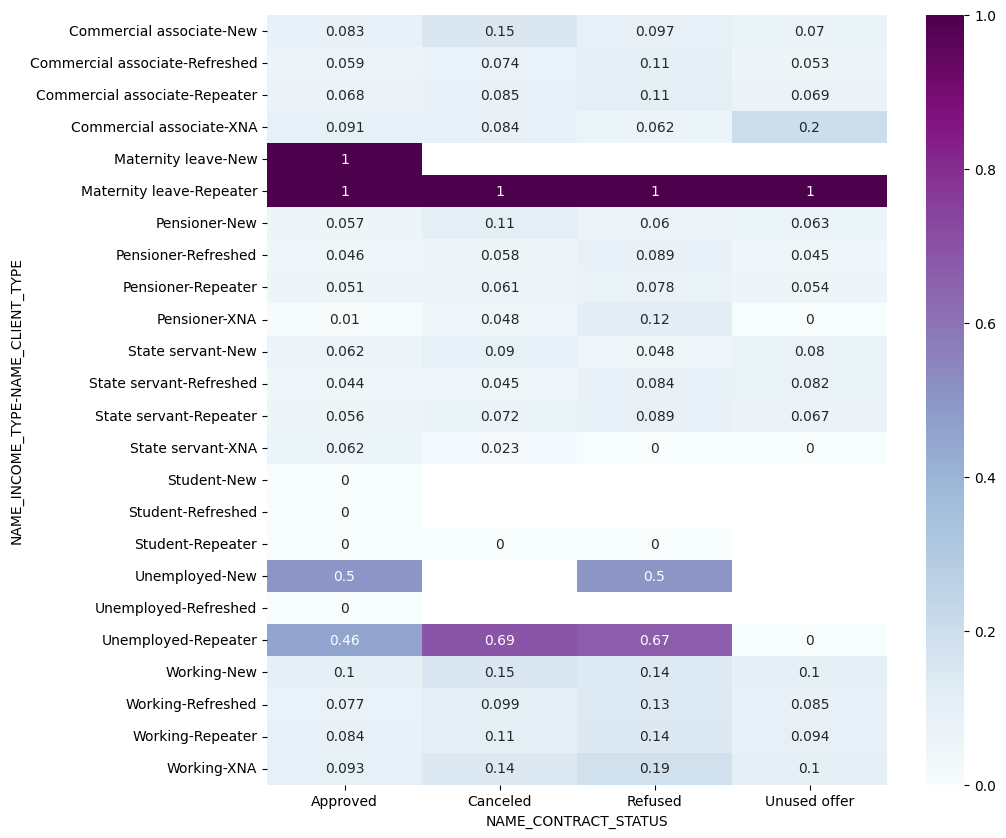

In [172]:
plt.figure(figsize=[10,10])
sns.heatmap(res1 , annot=True , cmap='BuPu')
plt.show()

In [173]:
res2 = pd.pivot_table(data=merge_df , index = ["CODE_GENDER" , "NAME_SELLER_INDUSTRY"] , columns= ["TARGET"] , values= "AMT_GOODS_PRICE_x" , aggfunc="mean")
res2

TARGET                                        0              1
CODE_GENDER NAME_SELLER_INDUSTRY                              
F           Auto technology       479315.551765  443287.500000
            Clothing              572696.728162  545433.920417
            Connectivity          507293.982775  477930.227144
            Construction          528593.412726  509510.934394
            Consumer electronics  537365.784245  509622.048755
            Furniture             554167.834310  507330.221130
            Industry              554796.973848  502305.109489
            Jewelry               431582.342984  388868.218487
            MLM partners          480280.530864  509600.000000
            Tourism               626638.433579  945750.000000
            XNA                   526242.926311  498860.589249
M           Auto technology       479664.500630  426144.039735
            Clothing              608262.233591  508993.421053
            Connectivity          520938.348310  477463.268725
            Construction          546370.146388  481552.316742
            Consumer electronics  554628.351182  490459.954371
            Furniture             582765.710104  514922.889706
            Industry              557226.130397  495606.908824
            Jewelry               450209.986637  398460.772059
            MLM partners          472633.333333  532500.000000
            Tourism               578410.714286  364050.000000
            XNA                   532779.914775  472870.051285
XNA         Connectivity          300000.000000            NaN
            Consumer electronics  652500.000000            NaN
            Furniture             450000.000000            NaN
            XNA                   550657.894737            NaN

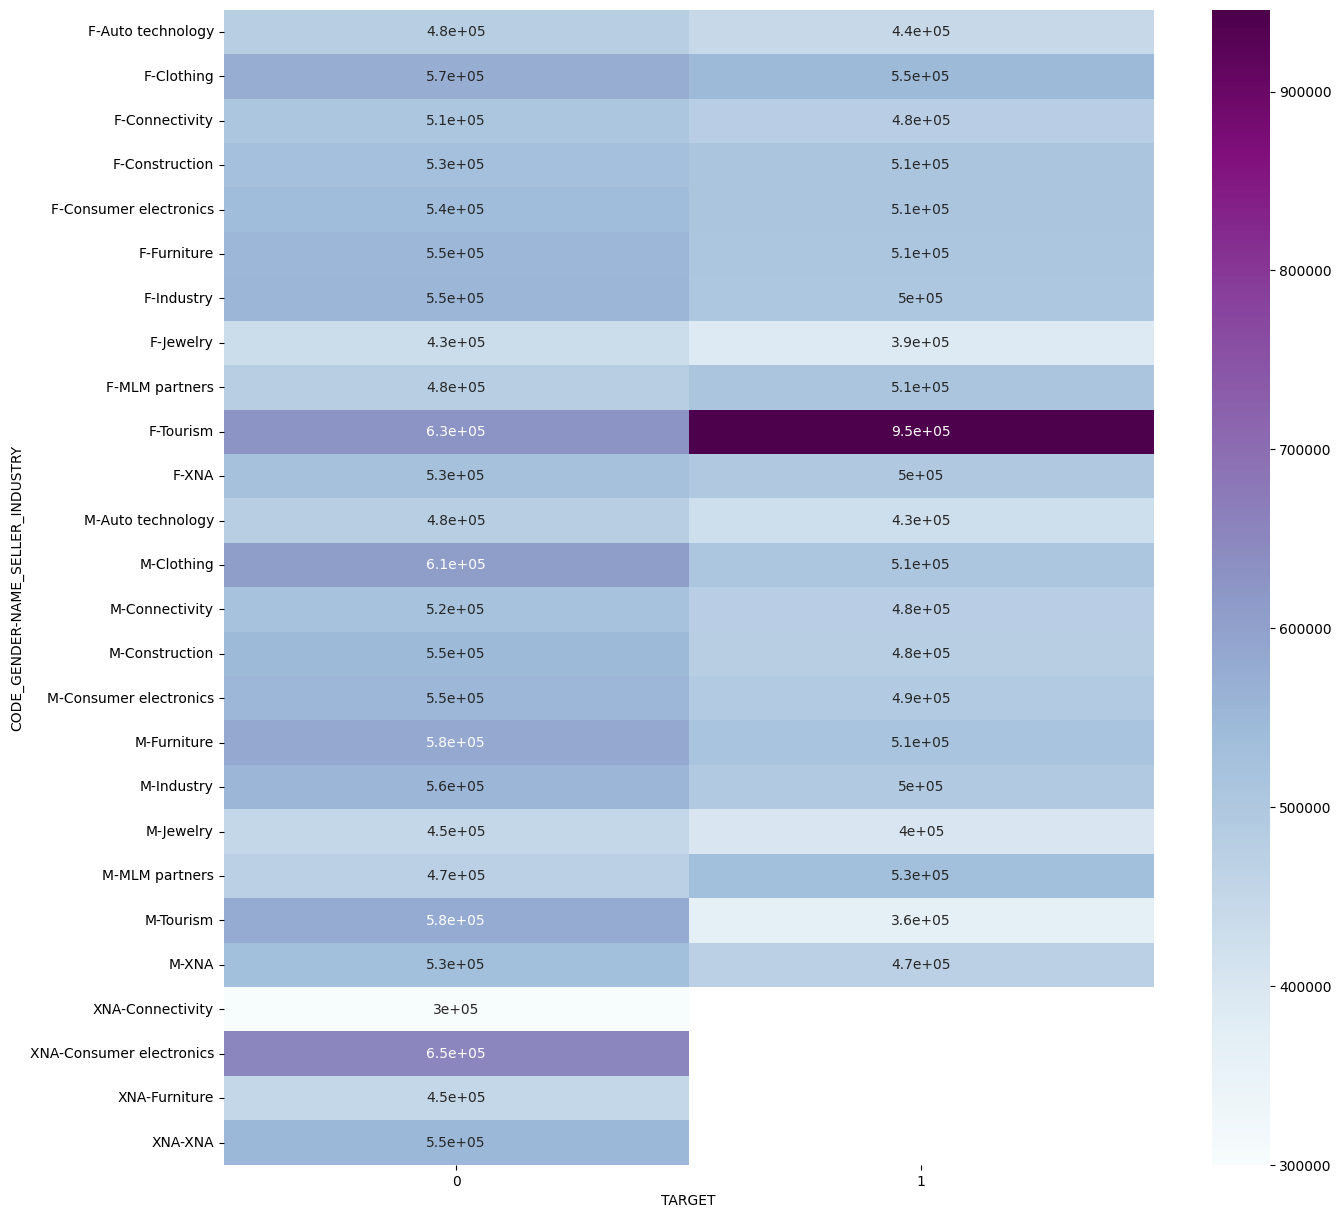

In [174]:
plt.figure(figsize=[15,15])
sns.heatmap(res2 , annot=True , cmap='BuPu')
plt.show()

------------------------------------------------------------------------
-------------------------------------------------------------------------